In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn import preprocessing
from sklearn import metrics
from __future__ import print_function
# import mpld3
# mpld3.enable_notebook()

%matplotlib inline

In [2]:
%run ./importWalkingData.ipynb

Dimension of walking test_x  =  (134, 27)
Dimension of walking train_x =  (536, 27)


In [3]:
# reference: https://www.tensorflow.org/versions/r0.12/tutorials/wide_and_deep/
# def input_fn_train(LABEL):
#     continuous_cols = {'xcont' : X_train_contFeatsScaled}
#     categorical_cols = {'xdisc': X_train_categorical}
#     # Merges the two dictionaries into one.
#     feature_cols = dict(continuous_cols.items() + categorical_cols.item())
#     # Converts the label column into a constant Tensor.
#     feature_y = y_train[LABEL]
#     # Returns the feature columns and the label.
#     return feature_cols, feature_y

In [4]:
def get_input_fn(data_x,data_y, LABEL, num_epochs=None, shuffle=True):
  return tf.estimator.inputs.pandas_input_fn(
      x=pd.DataFrame({k: data_x[k].values for k in FEATURESALL}),
      y = pd.DataFrame(data_y[LABEL].values),
      num_epochs=num_epochs,
      shuffle=shuffle)

In [5]:
embedded_ffp_column = tf.contrib.layers.embedding_column(
    tf.contrib.layers.sparse_column_with_integerized_feature("FFPType", 7, combiner=None, dtype=tf.int64), dimension = 7)
# Continuous columns- frontKneesAngle	rearKneesAngle	frontAnkle	rearAnkle	frontHipsAngle
bodyZ = tf.feature_column.numeric_column("bodyAngleZ")
frontK = tf.feature_column.numeric_column("frontKneesAngle")
rearK = tf.feature_column.numeric_column("rearKneesAngle")
frontA = tf.feature_column.numeric_column("frontAnkle")
rearA = tf.feature_column.numeric_column("rearAnkle")
frontH = tf.feature_column.numeric_column("frontHipsAngle")
rearH = tf.feature_column.numeric_column("rearHipsAngle")
swingFtHt = tf.feature_column.numeric_column("swingFtHeight")
speed = tf.feature_column.numeric_column("speed")
gaitTime = tf.feature_column.numeric_column("gaitDuration")

feature_cols = [bodyZ, frontK, rearK, frontA, rearA, frontH, rearH, swingFtHt, speed, gaitTime, embedded_ffp_column]

In [6]:
# Build 2 layer fully connected DNN with 10, 10 units respectively.
# best so far.. MSE:66.0.. and R2:0.2..
# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotion", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)

# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[1000, 1000],  model_dir="/DNN/quadMotion10xUnits", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)

# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100, 100],  model_dir="/DNN/quadMotion", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.01)

# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionSigmoid", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1, activation_fn = tf.sigmoid)
#tf.contrib.layers.xavier_initializer(uniform=True)

regressor = tf.estimator.DNNRegressor(
  feature_columns=feature_cols, hidden_units=[100, 100],  model_dir="/DNN/quadMotionRELU", optimizer = tf.train.AdamOptimizer(learning_rate=0.001), dropout = 0.1)

# regressor = tf.estimator.DNNRegressor(
#   feature_columns=feature_cols, model_dir="/DNN/quadMotion3", hidden_units=[100, 100],
#     optimizer=tf.train.ProximalAdagradOptimizer(
#       learning_rate=0.01,
#       l1_regularization_strength=0.001
#     ),dropout = 0.01)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_tf_random_seed': 1, '_model_dir': '/DNN/quadMotionRELU'}


In [15]:
# Train.
LABEL = EMOSCORES[0]
regressor.train(input_fn=get_input_fn(X_train_all, y_train, EMOSCORES[0], num_epochs=None, shuffle=True),steps=2000000) #2000000

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /DNN/quadMotionRELU\model.ckpt-200000
INFO:tensorflow:Saving checkpoints for 200001 into /DNN/quadMotionRELU\model.ckpt.
INFO:tensorflow:step = 200001, loss = 279.006
INFO:tensorflow:global_step/sec: 279.845
INFO:tensorflow:step = 200101, loss = 225.616 (0.359 sec)
INFO:tensorflow:global_step/sec: 304.995
INFO:tensorflow:step = 200201, loss = 301.46 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.528
INFO:tensorflow:step = 200301, loss = 357.721 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.742
INFO:tensorflow:step = 200401, loss = 280.146 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.386
INFO:tensorflow:step = 200501, loss = 234.157 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.2
INFO:tensorflow:step = 200601, loss = 221.658 (0.329 sec)
INFO:tensorflow:global_step/sec: 301.708
INFO:tensorflow:step = 200701, loss = 258.937 (0.331 sec)
INFO:tensorflow:global_step/sec: 300.934
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 308.909
INFO:tensorflow:step = 208201, loss = 268.709 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.781
INFO:tensorflow:step = 208301, loss = 268.16 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.941
INFO:tensorflow:step = 208401, loss = 235.795 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.004
INFO:tensorflow:step = 208501, loss = 290.437 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.827
INFO:tensorflow:step = 208601, loss = 230.762 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.789
INFO:tensorflow:step = 208701, loss = 393.261 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.947
INFO:tensorflow:step = 208801, loss = 317.933 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.74
INFO:tensorflow:step = 208901, loss = 255.102 (0.318 sec)
INFO:tensorflow:global_step/sec: 309.379
INFO:tensorflow:step = 209001, loss = 288.371 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.641
INFO:tensorflow:step = 209101, loss = 302.177 (0.329 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 305.028
INFO:tensorflow:step = 216501, loss = 228.973 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.893
INFO:tensorflow:step = 216601, loss = 244.818 (0.324 sec)
INFO:tensorflow:global_step/sec: 307.471
INFO:tensorflow:step = 216701, loss = 202.749 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.544
INFO:tensorflow:step = 216801, loss = 214.944 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.684
INFO:tensorflow:step = 216901, loss = 309.755 (0.330 sec)
INFO:tensorflow:global_step/sec: 310.832
INFO:tensorflow:step = 217001, loss = 279.208 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.656
INFO:tensorflow:step = 217101, loss = 331.211 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.441
INFO:tensorflow:step = 217201, loss = 237.97 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.293
INFO:tensorflow:step = 217301, loss = 384.877 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.749
INFO:tensorflow:step = 217401, loss = 161.864 (0.320 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 311.789
INFO:tensorflow:step = 224801, loss = 276.161 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.304
INFO:tensorflow:step = 224901, loss = 262.201 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.288
INFO:tensorflow:step = 225001, loss = 320.044 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.664
INFO:tensorflow:step = 225101, loss = 276.009 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.124
INFO:tensorflow:step = 225201, loss = 310.388 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.908
INFO:tensorflow:step = 225301, loss = 298.677 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 225401, loss = 279.266 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 225501, loss = 260.636 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 225601, loss = 236.859 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.349
INFO:tensorflow:step = 225701, loss = 225.323 (0.322 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 311.745
INFO:tensorflow:step = 233101, loss = 197.135 (0.322 sec)
INFO:tensorflow:global_step/sec: 302.825
INFO:tensorflow:step = 233201, loss = 182.739 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.414
INFO:tensorflow:step = 233301, loss = 305.351 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.766
INFO:tensorflow:step = 233401, loss = 301.484 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.29
INFO:tensorflow:step = 233501, loss = 180.445 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.301
INFO:tensorflow:step = 233601, loss = 321.072 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.768
INFO:tensorflow:step = 233701, loss = 211.201 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.702
INFO:tensorflow:step = 233801, loss = 224.805 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.25
INFO:tensorflow:step = 233901, loss = 310.018 (0.330 sec)
INFO:tensorflow:global_step/sec: 312.778
INFO:tensorflow:step = 234001, loss = 211.402 (0.320 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 313.259
INFO:tensorflow:step = 241401, loss = 303.508 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.761
INFO:tensorflow:step = 241501, loss = 344.871 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.788
INFO:tensorflow:step = 241601, loss = 261.209 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.789
INFO:tensorflow:step = 241701, loss = 212.239 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.996
INFO:tensorflow:step = 241801, loss = 264.913 (0.326 sec)
INFO:tensorflow:global_step/sec: 301.791
INFO:tensorflow:step = 241901, loss = 224.088 (0.331 sec)
INFO:tensorflow:global_step/sec: 310.772
INFO:tensorflow:step = 242001, loss = 198.765 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.474
INFO:tensorflow:step = 242101, loss = 210.742 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.315
INFO:tensorflow:step = 242201, loss = 264.039 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.761
INFO:tensorflow:step = 242301, loss = 251.261 (0.319 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 311.796
INFO:tensorflow:step = 249701, loss = 248.039 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.409
INFO:tensorflow:step = 249801, loss = 212.522 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.511
INFO:tensorflow:step = 249901, loss = 293.546 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.66
INFO:tensorflow:step = 250001, loss = 279.329 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.783
INFO:tensorflow:step = 250101, loss = 264.189 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.785
INFO:tensorflow:step = 250201, loss = 239.258 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 250301, loss = 234.516 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.758
INFO:tensorflow:step = 250401, loss = 298.321 (0.318 sec)
INFO:tensorflow:global_step/sec: 305.153
INFO:tensorflow:step = 250501, loss = 228.754 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.205
INFO:tensorflow:step = 250601, loss = 288.333 (0.330 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 306.468
INFO:tensorflow:step = 258001, loss = 192.457 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.298
INFO:tensorflow:step = 258101, loss = 162.553 (0.331 sec)
INFO:tensorflow:global_step/sec: 310.827
INFO:tensorflow:step = 258201, loss = 249.408 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.289
INFO:tensorflow:step = 258301, loss = 212.886 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.346
INFO:tensorflow:step = 258401, loss = 241.25 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.372
INFO:tensorflow:step = 258501, loss = 301.107 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.737
INFO:tensorflow:step = 258601, loss = 161.873 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.318
INFO:tensorflow:step = 258701, loss = 263.301 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.255
INFO:tensorflow:step = 258801, loss = 211.507 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.814
INFO:tensorflow:step = 258901, loss = 233.723 (0.321 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 312.76
INFO:tensorflow:step = 266301, loss = 227.122 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.801
INFO:tensorflow:step = 266401, loss = 361.399 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 266501, loss = 389.812 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.775
INFO:tensorflow:step = 266601, loss = 304.238 (0.320 sec)
INFO:tensorflow:global_step/sec: 303.218
INFO:tensorflow:step = 266701, loss = 307.767 (0.330 sec)
INFO:tensorflow:global_step/sec: 306.921
INFO:tensorflow:step = 266801, loss = 217.162 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.773
INFO:tensorflow:step = 266901, loss = 236.222 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.734
INFO:tensorflow:step = 267001, loss = 195.767 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.81
INFO:tensorflow:step = 267101, loss = 216.903 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.855
INFO:tensorflow:step = 267201, loss = 299.048 (0.321 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 310.327
INFO:tensorflow:step = 274601, loss = 273.861 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.755
INFO:tensorflow:step = 274701, loss = 232.253 (0.330 sec)
INFO:tensorflow:global_step/sec: 304.207
INFO:tensorflow:step = 274801, loss = 266.293 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.295
INFO:tensorflow:step = 274901, loss = 326.206 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.849
INFO:tensorflow:step = 275001, loss = 266.374 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.26
INFO:tensorflow:step = 275101, loss = 295.583 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.178
INFO:tensorflow:step = 275201, loss = 275.245 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.953
INFO:tensorflow:step = 275301, loss = 344.787 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.047
INFO:tensorflow:step = 275401, loss = 307.205 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.431
INFO:tensorflow:step = 275501, loss = 204.75 (0.325 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 311.343
INFO:tensorflow:step = 282901, loss = 308.169 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.262
INFO:tensorflow:step = 283001, loss = 245.328 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.269
INFO:tensorflow:step = 283101, loss = 290.358 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.766
INFO:tensorflow:step = 283201, loss = 222.262 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.974
INFO:tensorflow:step = 283301, loss = 290.602 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.222
INFO:tensorflow:step = 283401, loss = 288.071 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.379
INFO:tensorflow:step = 283501, loss = 300.391 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.315
INFO:tensorflow:step = 283601, loss = 224.944 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.746
INFO:tensorflow:step = 283701, loss = 313.703 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.961
INFO:tensorflow:step = 283801, loss = 261.48 (0.319 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 308.093
INFO:tensorflow:step = 291201, loss = 245.066 (0.325 sec)
INFO:tensorflow:global_step/sec: 314.779
INFO:tensorflow:step = 291301, loss = 216.459 (0.317 sec)
INFO:tensorflow:global_step/sec: 310.797
INFO:tensorflow:step = 291401, loss = 314.071 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.735
INFO:tensorflow:step = 291501, loss = 222.588 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.922
INFO:tensorflow:step = 291601, loss = 230.013 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.946
INFO:tensorflow:step = 291701, loss = 246.523 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 291801, loss = 249.052 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.251
INFO:tensorflow:step = 291901, loss = 323.48 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.35
INFO:tensorflow:step = 292001, loss = 258.11 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.206
INFO:tensorflow:step = 292101, loss = 279.017 (0.329 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 305.135
INFO:tensorflow:step = 299501, loss = 256.825 (0.328 sec)
INFO:tensorflow:global_step/sec: 301.907
INFO:tensorflow:step = 299601, loss = 301.387 (0.331 sec)
INFO:tensorflow:global_step/sec: 310.85
INFO:tensorflow:step = 299701, loss = 273.517 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.62
INFO:tensorflow:step = 299801, loss = 280.482 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 299901, loss = 315.253 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.265
INFO:tensorflow:step = 300001, loss = 217.499 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.568
INFO:tensorflow:step = 300101, loss = 224.079 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.719
INFO:tensorflow:step = 300201, loss = 293.12 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.837
INFO:tensorflow:step = 300301, loss = 265.046 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.301
INFO:tensorflow:step = 300401, loss = 285.962 (0.321 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 308.908
INFO:tensorflow:step = 307801, loss = 231.633 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.29
INFO:tensorflow:step = 307901, loss = 206.048 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.788
INFO:tensorflow:step = 308001, loss = 270.883 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.345
INFO:tensorflow:step = 308101, loss = 203.321 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.869
INFO:tensorflow:step = 308201, loss = 197.84 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.565
INFO:tensorflow:step = 308301, loss = 250.226 (0.330 sec)
INFO:tensorflow:global_step/sec: 305.03
INFO:tensorflow:step = 308401, loss = 210.699 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.767
INFO:tensorflow:step = 308501, loss = 238.112 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.909
INFO:tensorflow:step = 308601, loss = 246.24 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.26
INFO:tensorflow:step = 308701, loss = 222.277 (0.319 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 316101, loss = 255.416 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.293
INFO:tensorflow:step = 316201, loss = 254.121 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.335
INFO:tensorflow:step = 316301, loss = 476.409 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.171
INFO:tensorflow:step = 316401, loss = 212.153 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.35
INFO:tensorflow:step = 316501, loss = 267.219 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.315
INFO:tensorflow:step = 316601, loss = 273.518 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.774
INFO:tensorflow:step = 316701, loss = 265.418 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.338
INFO:tensorflow:step = 316801, loss = 223.494 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.705
INFO:tensorflow:step = 316901, loss = 181.772 (0.318 sec)
INFO:tensorflow:global_step/sec: 305.137
INFO:tensorflow:step = 317001, loss = 368.311 (0.328 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 312.253
INFO:tensorflow:step = 324401, loss = 172.191 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.811
INFO:tensorflow:step = 324501, loss = 167.096 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.383
INFO:tensorflow:step = 324601, loss = 195.87 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.937
INFO:tensorflow:step = 324701, loss = 221.898 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.659
INFO:tensorflow:step = 324801, loss = 349.808 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.707
INFO:tensorflow:step = 324901, loss = 180.095 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.274
INFO:tensorflow:step = 325001, loss = 196.727 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 325101, loss = 213.4 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 325201, loss = 260.324 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.584
INFO:tensorflow:step = 325301, loss = 248.382 (0.328 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 308.434
INFO:tensorflow:step = 332701, loss = 274.472 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.191
INFO:tensorflow:step = 332801, loss = 188.354 (0.329 sec)
INFO:tensorflow:global_step/sec: 305.058
INFO:tensorflow:step = 332901, loss = 222.836 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.849
INFO:tensorflow:step = 333001, loss = 203.553 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.065
INFO:tensorflow:step = 333101, loss = 238.959 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.295
INFO:tensorflow:step = 333201, loss = 267.21 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.997
INFO:tensorflow:step = 333301, loss = 249.355 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.666
INFO:tensorflow:step = 333401, loss = 220.433 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.316
INFO:tensorflow:step = 333501, loss = 182.37 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 333601, loss = 259.919 (0.320 sec)
INFO:tensorfl

INFO:tensorflow:step = 341001, loss = 246.159 (0.330 sec)
INFO:tensorflow:global_step/sec: 309.852
INFO:tensorflow:step = 341101, loss = 241.832 (0.322 sec)
INFO:tensorflow:global_step/sec: 315.248
INFO:tensorflow:step = 341201, loss = 253.512 (0.317 sec)
INFO:tensorflow:global_step/sec: 310.346
INFO:tensorflow:step = 341301, loss = 224.807 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.06
INFO:tensorflow:step = 341401, loss = 253.822 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.4
INFO:tensorflow:step = 341501, loss = 228.612 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.293
INFO:tensorflow:step = 341601, loss = 256.902 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.258
INFO:tensorflow:step = 341701, loss = 248.185 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.251
INFO:tensorflow:step = 341801, loss = 238.464 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.259
INFO:tensorflow:step = 341901, loss = 201.189 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.716
INFO:tensorfl

INFO:tensorflow:step = 349301, loss = 219.279 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.777
INFO:tensorflow:step = 349401, loss = 201.593 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.294
INFO:tensorflow:step = 349501, loss = 220.901 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.478
INFO:tensorflow:step = 349601, loss = 241.708 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.86
INFO:tensorflow:step = 349701, loss = 181.351 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.382
INFO:tensorflow:step = 349801, loss = 229.32 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.771
INFO:tensorflow:step = 349901, loss = 171.387 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.822
INFO:tensorflow:step = 350001, loss = 172.755 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.349
INFO:tensorflow:step = 350101, loss = 223.213 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.76
INFO:tensorflow:step = 350201, loss = 216.975 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.131
INFO:tensorfl

INFO:tensorflow:global_step/sec: 302.828
INFO:tensorflow:step = 357701, loss = 208.096 (0.330 sec)
INFO:tensorflow:global_step/sec: 309.831
INFO:tensorflow:step = 357801, loss = 261.438 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.299
INFO:tensorflow:step = 357901, loss = 170.175 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.811
INFO:tensorflow:step = 358001, loss = 322.505 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 358101, loss = 254.238 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.993
INFO:tensorflow:step = 358201, loss = 288.205 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.541
INFO:tensorflow:step = 358301, loss = 254.833 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.407
INFO:tensorflow:step = 358401, loss = 216.978 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 358501, loss = 260.567 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.292
INFO:tensorflow:step = 358601, loss = 238.361 (0.321 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 366001, loss = 254.582 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 366101, loss = 294.222 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.062
INFO:tensorflow:step = 366201, loss = 201.526 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.514
INFO:tensorflow:step = 366301, loss = 247.536 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.777
INFO:tensorflow:step = 366401, loss = 198.43 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.336
INFO:tensorflow:step = 366501, loss = 208.315 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.859
INFO:tensorflow:step = 366601, loss = 245.087 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.725
INFO:tensorflow:step = 366701, loss = 228.306 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.542
INFO:tensorflow:step = 366801, loss = 339.997 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.997
INFO:tensorflow:step = 366901, loss = 214.22 (0.328 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 304.655
INFO:tensorflow:step = 374301, loss = 236.845 (0.329 sec)
INFO:tensorflow:global_step/sec: 313.767
INFO:tensorflow:step = 374401, loss = 215.104 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.768
INFO:tensorflow:step = 374501, loss = 187.543 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.782
INFO:tensorflow:step = 374601, loss = 310.817 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.171
INFO:tensorflow:step = 374701, loss = 242.059 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.773
INFO:tensorflow:step = 374801, loss = 293.112 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.331
INFO:tensorflow:step = 374901, loss = 203.573 (0.328 sec)
INFO:tensorflow:global_step/sec: 313.176
INFO:tensorflow:step = 375001, loss = 187.224 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.76
INFO:tensorflow:step = 375101, loss = 194.237 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.3
INFO:tensorflow:step = 375201, loss = 227.508 (0.321 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 310.847
INFO:tensorflow:step = 382601, loss = 195.135 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.253
INFO:tensorflow:step = 382701, loss = 210.582 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 382801, loss = 244.653 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.63
INFO:tensorflow:step = 382901, loss = 229.47 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.873
INFO:tensorflow:step = 383001, loss = 213.519 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 383101, loss = 253.532 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.267
INFO:tensorflow:step = 383201, loss = 242.791 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.244
INFO:tensorflow:step = 383301, loss = 215.555 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 383401, loss = 194.942 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.947
INFO:tensorflow:step = 383501, loss = 193.85 (0.325 sec)
INFO:tensorfl

INFO:tensorflow:step = 390801, loss = 225.681 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.819
INFO:tensorflow:step = 390901, loss = 248.203 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 391001, loss = 170.263 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.273
INFO:tensorflow:step = 391101, loss = 216.566 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 391201, loss = 201.133 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.131
INFO:tensorflow:step = 391301, loss = 260.03 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.003
INFO:tensorflow:step = 391401, loss = 265.94 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.314
INFO:tensorflow:step = 391501, loss = 199.021 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.253
INFO:tensorflow:step = 391601, loss = 170.889 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.338
INFO:tensorflow:step = 391701, loss = 247.149 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.555
INFO:tensorf

INFO:tensorflow:step = 399101, loss = 231.336 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.76
INFO:tensorflow:step = 399201, loss = 221.886 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.865
INFO:tensorflow:step = 399301, loss = 190.247 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.287
INFO:tensorflow:step = 399401, loss = 196.44 (0.330 sec)
INFO:tensorflow:global_step/sec: 305.594
INFO:tensorflow:step = 399501, loss = 209.796 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 399601, loss = 252.746 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 399701, loss = 217.818 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 399801, loss = 169.123 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.28
INFO:tensorflow:step = 399901, loss = 307.027 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.666
INFO:tensorflow:step = 400001, loss = 237.886 (0.329 sec)
INFO:tensorflow:global_step/sec: 305.128
INFO:tensorfl

INFO:tensorflow:step = 407401, loss = 301.519 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.595
INFO:tensorflow:step = 407501, loss = 235.462 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.012
INFO:tensorflow:step = 407601, loss = 194.538 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.329
INFO:tensorflow:step = 407701, loss = 204.246 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 407801, loss = 202.902 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.295
INFO:tensorflow:step = 407901, loss = 306.129 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.832
INFO:tensorflow:step = 408001, loss = 258.996 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.911
INFO:tensorflow:step = 408101, loss = 252.053 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.657
INFO:tensorflow:step = 408201, loss = 171.709 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.438
INFO:tensorflow:step = 408301, loss = 212.588 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.827
INFO:tenso

INFO:tensorflow:step = 415701, loss = 295.718 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.281
INFO:tensorflow:step = 415801, loss = 231.915 (0.330 sec)
INFO:tensorflow:global_step/sec: 309.39
INFO:tensorflow:step = 415901, loss = 180.088 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.294
INFO:tensorflow:step = 416001, loss = 241.628 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.273
INFO:tensorflow:step = 416101, loss = 213.671 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.787
INFO:tensorflow:step = 416201, loss = 174.063 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.346
INFO:tensorflow:step = 416301, loss = 296.32 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.095
INFO:tensorflow:step = 416401, loss = 245.158 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.687
INFO:tensorflow:step = 416501, loss = 192.427 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.278
INFO:tensorflow:step = 416601, loss = 238.055 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.788
INFO:tensorf

INFO:tensorflow:step = 424001, loss = 215.25 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.065
INFO:tensorflow:step = 424101, loss = 161.611 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.862
INFO:tensorflow:step = 424201, loss = 219.295 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.279
INFO:tensorflow:step = 424301, loss = 182.367 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.968
INFO:tensorflow:step = 424401, loss = 278.591 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.38
INFO:tensorflow:step = 424501, loss = 249.999 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.197
INFO:tensorflow:step = 424601, loss = 177.827 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.198
INFO:tensorflow:step = 424701, loss = 196.536 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.906
INFO:tensorflow:step = 424801, loss = 216.604 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 424901, loss = 187.476 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorf

INFO:tensorflow:step = 432301, loss = 244.446 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.396
INFO:tensorflow:step = 432401, loss = 197.363 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.331
INFO:tensorflow:step = 432501, loss = 265.015 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.539
INFO:tensorflow:step = 432601, loss = 233.676 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.111
INFO:tensorflow:step = 432701, loss = 270.506 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.528
INFO:tensorflow:step = 432801, loss = 201.567 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.197
INFO:tensorflow:step = 432901, loss = 143.68 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.332
INFO:tensorflow:step = 433001, loss = 256.063 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.804
INFO:tensorflow:step = 433101, loss = 189.684 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 433201, loss = 178.705 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.827
INFO:tensor

INFO:tensorflow:step = 440601, loss = 308.185 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.758
INFO:tensorflow:step = 440701, loss = 193.696 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.837
INFO:tensorflow:step = 440801, loss = 255.279 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.473
INFO:tensorflow:step = 440901, loss = 151.999 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.13
INFO:tensorflow:step = 441001, loss = 275.461 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.33
INFO:tensorflow:step = 441101, loss = 272.635 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.753
INFO:tensorflow:step = 441201, loss = 193.171 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.734
INFO:tensorflow:step = 441301, loss = 214.865 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 441401, loss = 240.817 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.531
INFO:tensorflow:step = 441501, loss = 218.581 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.829
INFO:tensorf

INFO:tensorflow:step = 448901, loss = 174.815 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.627
INFO:tensorflow:step = 449001, loss = 260.275 (0.329 sec)
INFO:tensorflow:global_step/sec: 302.813
INFO:tensorflow:step = 449101, loss = 262.628 (0.330 sec)
INFO:tensorflow:global_step/sec: 312.291
INFO:tensorflow:step = 449201, loss = 244.299 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.854
INFO:tensorflow:step = 449301, loss = 220.314 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.316
INFO:tensorflow:step = 449401, loss = 149.896 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 449501, loss = 234.436 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.53
INFO:tensorflow:step = 449601, loss = 189.81 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.532
INFO:tensorflow:step = 449701, loss = 171.4 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.943
INFO:tensorflow:step = 449801, loss = 177.617 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.84
INFO:tensorflow

INFO:tensorflow:step = 457201, loss = 200.604 (0.328 sec)
INFO:tensorflow:global_step/sec: 302.812
INFO:tensorflow:step = 457301, loss = 234.72 (0.330 sec)
INFO:tensorflow:global_step/sec: 311.817
INFO:tensorflow:step = 457401, loss = 154.583 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.526
INFO:tensorflow:step = 457501, loss = 228.344 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.596
INFO:tensorflow:step = 457601, loss = 286.143 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.924
INFO:tensorflow:step = 457701, loss = 248.611 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.591
INFO:tensorflow:step = 457801, loss = 197.246 (0.327 sec)
INFO:tensorflow:global_step/sec: 299.646
INFO:tensorflow:step = 457901, loss = 175.761 (0.334 sec)
INFO:tensorflow:global_step/sec: 307.95
INFO:tensorflow:step = 458001, loss = 202.871 (0.325 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 458101, loss = 236.852 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.777
INFO:tensorf

INFO:tensorflow:step = 465501, loss = 209.453 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.869
INFO:tensorflow:step = 465601, loss = 207.352 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.775
INFO:tensorflow:step = 465701, loss = 202.627 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.762
INFO:tensorflow:step = 465801, loss = 232.415 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.776
INFO:tensorflow:step = 465901, loss = 282.908 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.59
INFO:tensorflow:step = 466001, loss = 180.798 (0.327 sec)
INFO:tensorflow:global_step/sec: 301.913
INFO:tensorflow:step = 466101, loss = 244.228 (0.332 sec)
INFO:tensorflow:global_step/sec: 307.47
INFO:tensorflow:step = 466201, loss = 226.119 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.748
INFO:tensorflow:step = 466301, loss = 210.363 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.888
INFO:tensorflow:step = 466401, loss = 182.235 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.263
INFO:tensorf

INFO:tensorflow:global_step/sec: 312.287
INFO:tensorflow:step = 473901, loss = 269.797 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.845
INFO:tensorflow:step = 474001, loss = 360.026 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.99
INFO:tensorflow:step = 474101, loss = 283.095 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.642
INFO:tensorflow:step = 474201, loss = 216.823 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.46
INFO:tensorflow:step = 474301, loss = 184.73 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.813
INFO:tensorflow:step = 474401, loss = 222.267 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.859
INFO:tensorflow:step = 474501, loss = 297.554 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.771
INFO:tensorflow:step = 474601, loss = 159.524 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.304
INFO:tensorflow:step = 474701, loss = 230.46 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.285
INFO:tensorflow:step = 474801, loss = 220.028 (0.330 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 301.368
INFO:tensorflow:step = 482201, loss = 216.107 (0.332 sec)
INFO:tensorflow:global_step/sec: 310.795
INFO:tensorflow:step = 482301, loss = 175.495 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.804
INFO:tensorflow:step = 482401, loss = 254.483 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 482501, loss = 189.373 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.384
INFO:tensorflow:step = 482601, loss = 202.952 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.089
INFO:tensorflow:step = 482701, loss = 217.16 (0.330 sec)
INFO:tensorflow:global_step/sec: 305.13
INFO:tensorflow:step = 482801, loss = 189.18 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.326
INFO:tensorflow:step = 482901, loss = 221.347 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.305
INFO:tensorflow:step = 483001, loss = 290.47 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.783
INFO:tensorflow:step = 483101, loss = 257.162 (0.320 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 307.014
INFO:tensorflow:step = 490501, loss = 182.255 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.338
INFO:tensorflow:step = 490601, loss = 183.777 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.483
INFO:tensorflow:step = 490701, loss = 233.056 (0.326 sec)
INFO:tensorflow:global_step/sec: 301.817
INFO:tensorflow:step = 490801, loss = 275.074 (0.331 sec)
INFO:tensorflow:global_step/sec: 309.379
INFO:tensorflow:step = 490901, loss = 211.706 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 491001, loss = 278.853 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 491101, loss = 239.589 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.32
INFO:tensorflow:step = 491201, loss = 219.153 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.903
INFO:tensorflow:step = 491301, loss = 166.564 (0.323 sec)
INFO:tensorflow:global_step/sec: 302.763
INFO:tensorflow:step = 491401, loss = 328.115 (0.331 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 303.739
INFO:tensorflow:step = 498801, loss = 177.051 (0.330 sec)
INFO:tensorflow:global_step/sec: 311.316
INFO:tensorflow:step = 498901, loss = 173.498 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.306
INFO:tensorflow:step = 499001, loss = 307.728 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.828
INFO:tensorflow:step = 499101, loss = 217.628 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.384
INFO:tensorflow:step = 499201, loss = 271.263 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.957
INFO:tensorflow:step = 499301, loss = 236.136 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.651
INFO:tensorflow:step = 499401, loss = 170.098 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 499501, loss = 254.849 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.43
INFO:tensorflow:step = 499601, loss = 198.102 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 499701, loss = 194.615 (0.322 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 313.292
INFO:tensorflow:step = 507101, loss = 275.739 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.762
INFO:tensorflow:step = 507201, loss = 236.701 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.13
INFO:tensorflow:step = 507301, loss = 232.873 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.77
INFO:tensorflow:step = 507401, loss = 238.581 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.879
INFO:tensorflow:step = 507501, loss = 290.484 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.292
INFO:tensorflow:step = 507601, loss = 227.81 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.866
INFO:tensorflow:step = 507701, loss = 196.114 (0.322 sec)
INFO:tensorflow:global_step/sec: 302.817
INFO:tensorflow:step = 507801, loss = 198.608 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.967
INFO:tensorflow:step = 507901, loss = 200.109 (0.325 sec)
INFO:tensorflow:global_step/sec: 302.734
INFO:tensorflow:step = 508001, loss = 194.716 (0.330 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 308.905
INFO:tensorflow:step = 515401, loss = 232.632 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 515501, loss = 234.002 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.811
INFO:tensorflow:step = 515601, loss = 151.188 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.811
INFO:tensorflow:step = 515701, loss = 243.303 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.833
INFO:tensorflow:step = 515801, loss = 177.968 (0.324 sec)
INFO:tensorflow:global_step/sec: 301.235
INFO:tensorflow:step = 515901, loss = 228.119 (0.332 sec)
INFO:tensorflow:global_step/sec: 306.443
INFO:tensorflow:step = 516001, loss = 313.305 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.271
INFO:tensorflow:step = 516101, loss = 275.586 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.795
INFO:tensorflow:step = 516201, loss = 266.406 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.74
INFO:tensorflow:step = 516301, loss = 181.352 (0.320 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 523701, loss = 195.6 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.118
INFO:tensorflow:step = 523801, loss = 185.593 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.687
INFO:tensorflow:step = 523901, loss = 210.117 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 524001, loss = 207.683 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.25
INFO:tensorflow:step = 524101, loss = 246.865 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.801
INFO:tensorflow:step = 524201, loss = 233.238 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 524301, loss = 221.421 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.473
INFO:tensorflow:step = 524401, loss = 242.344 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.664
INFO:tensorflow:step = 524501, loss = 216.41 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 524601, loss = 200.477 (0.323 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 304.147
INFO:tensorflow:step = 532001, loss = 233.839 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.421
INFO:tensorflow:step = 532101, loss = 192.512 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.86
INFO:tensorflow:step = 532201, loss = 215.592 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 532301, loss = 187.475 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.317
INFO:tensorflow:step = 532401, loss = 241.783 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.992
INFO:tensorflow:step = 532501, loss = 196.721 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.836
INFO:tensorflow:step = 532601, loss = 293.486 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.891
INFO:tensorflow:step = 532701, loss = 218.926 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.375
INFO:tensorflow:step = 532801, loss = 212.35 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.279
INFO:tensorflow:step = 532901, loss = 205.316 (0.319 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 309.391
INFO:tensorflow:step = 540301, loss = 228.569 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.802
INFO:tensorflow:step = 540401, loss = 306.575 (0.321 sec)
INFO:tensorflow:global_step/sec: 302.73
INFO:tensorflow:step = 540501, loss = 219.912 (0.331 sec)
INFO:tensorflow:global_step/sec: 302.361
INFO:tensorflow:step = 540601, loss = 205.958 (0.331 sec)
INFO:tensorflow:global_step/sec: 311.662
INFO:tensorflow:step = 540701, loss = 167.106 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 540801, loss = 220.486 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.779
INFO:tensorflow:step = 540901, loss = 191.92 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.785
INFO:tensorflow:step = 541001, loss = 204.997 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.957
INFO:tensorflow:step = 541101, loss = 173.951 (0.325 sec)
INFO:tensorflow:global_step/sec: 301.453
INFO:tensorflow:step = 541201, loss = 197.358 (0.332 sec)
INFO:tensorf

INFO:tensorflow:step = 548601, loss = 255.173 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.936
INFO:tensorflow:step = 548701, loss = 263.232 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.973
INFO:tensorflow:step = 548801, loss = 190.634 (0.332 sec)
INFO:tensorflow:global_step/sec: 307.004
INFO:tensorflow:step = 548901, loss = 191.636 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 549001, loss = 174.61 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 549101, loss = 273.835 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.787
INFO:tensorflow:step = 549201, loss = 244.113 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.864
INFO:tensorflow:step = 549301, loss = 213.764 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.12
INFO:tensorflow:step = 549401, loss = 247.811 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.552
INFO:tensorflow:step = 549501, loss = 214.549 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.815
INFO:tensorf

INFO:tensorflow:step = 556901, loss = 191.88 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.95
INFO:tensorflow:step = 557001, loss = 291.929 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.753
INFO:tensorflow:step = 557101, loss = 211.467 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.772
INFO:tensorflow:step = 557201, loss = 295.065 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 557301, loss = 160.63 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.765
INFO:tensorflow:step = 557401, loss = 207.962 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.186
INFO:tensorflow:step = 557501, loss = 165.967 (0.329 sec)
INFO:tensorflow:global_step/sec: 302.318
INFO:tensorflow:step = 557601, loss = 210.543 (0.331 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:step = 557701, loss = 237.496 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.744
INFO:tensorflow:step = 557801, loss = 295.312 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.834
INFO:tensorfl

INFO:tensorflow:step = 565201, loss = 215.087 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.759
INFO:tensorflow:step = 565301, loss = 146.812 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 565401, loss = 263.05 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.767
INFO:tensorflow:step = 565501, loss = 197.019 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.659
INFO:tensorflow:step = 565601, loss = 136.871 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.203
INFO:tensorflow:step = 565701, loss = 256.448 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.418
INFO:tensorflow:step = 565801, loss = 272.986 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 565901, loss = 238.655 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 566001, loss = 253.259 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.773
INFO:tensorflow:step = 566101, loss = 282.097 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.391
INFO:tensorf

INFO:tensorflow:global_step/sec: 305.596
INFO:tensorflow:step = 573501, loss = 230.496 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.284
INFO:tensorflow:step = 573601, loss = 200.191 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.831
INFO:tensorflow:step = 573701, loss = 258.605 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.462
INFO:tensorflow:step = 573801, loss = 174.42 (0.325 sec)
INFO:tensorflow:global_step/sec: 313.661
INFO:tensorflow:step = 573901, loss = 155.136 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.302
INFO:tensorflow:step = 574001, loss = 266.337 (0.321 sec)
INFO:tensorflow:global_step/sec: 302.817
INFO:tensorflow:step = 574101, loss = 240.066 (0.330 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 574201, loss = 178.361 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.39
INFO:tensorflow:step = 574301, loss = 253.934 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.274
INFO:tensorflow:step = 574401, loss = 209.539 (0.321 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 311.275
INFO:tensorflow:step = 581801, loss = 266.374 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.474
INFO:tensorflow:step = 581901, loss = 304.771 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.83
INFO:tensorflow:step = 582001, loss = 337.287 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.432
INFO:tensorflow:step = 582101, loss = 222.498 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.989
INFO:tensorflow:step = 582201, loss = 181.841 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.376
INFO:tensorflow:step = 582301, loss = 192.803 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.76
INFO:tensorflow:step = 582401, loss = 219.472 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 582501, loss = 291.8 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.783
INFO:tensorflow:step = 582601, loss = 236.511 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.862
INFO:tensorflow:step = 582701, loss = 189.638 (0.323 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 590101, loss = 166.994 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.003
INFO:tensorflow:step = 590201, loss = 172.706 (0.326 sec)
INFO:tensorflow:global_step/sec: 296.526
INFO:tensorflow:step = 590301, loss = 170.939 (0.338 sec)
INFO:tensorflow:global_step/sec: 309.381
INFO:tensorflow:step = 590401, loss = 203.403 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.312
INFO:tensorflow:step = 590501, loss = 190.035 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.763
INFO:tensorflow:step = 590601, loss = 234.802 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.289
INFO:tensorflow:step = 590701, loss = 264.183 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.952
INFO:tensorflow:step = 590801, loss = 144.747 (0.325 sec)
INFO:tensorflow:global_step/sec: 302.22
INFO:tensorflow:step = 590901, loss = 205.653 (0.331 sec)
INFO:tensorflow:global_step/sec: 309.858
INFO:tensorflow:step = 591001, loss = 262.684 (0.322 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 598401, loss = 192.224 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.388
INFO:tensorflow:step = 598501, loss = 186.599 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.5
INFO:tensorflow:step = 598601, loss = 244.253 (0.327 sec)
INFO:tensorflow:global_step/sec: 315.767
INFO:tensorflow:step = 598701, loss = 171.839 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.25
INFO:tensorflow:step = 598801, loss = 184.637 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.202
INFO:tensorflow:step = 598901, loss = 233.857 (0.329 sec)
INFO:tensorflow:global_step/sec: 277.2
INFO:tensorflow:step = 599001, loss = 189.358 (0.361 sec)
INFO:tensorflow:global_step/sec: 312.766
INFO:tensorflow:step = 599101, loss = 198.534 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.724
INFO:tensorflow:step = 599201, loss = 167.006 (0.322 sec)
INFO:tensorflow:global_step/sec: 316.194
INFO:tensorflow:step = 599301, loss = 211.279 (0.316 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 314.235
INFO:tensorflow:step = 606701, loss = 273.793 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.255
INFO:tensorflow:step = 606801, loss = 178.95 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 606901, loss = 285.271 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.419
INFO:tensorflow:step = 607001, loss = 197.934 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.901
INFO:tensorflow:step = 607101, loss = 260.671 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.384
INFO:tensorflow:step = 607201, loss = 183.6 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.999
INFO:tensorflow:step = 607301, loss = 201.058 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.297
INFO:tensorflow:step = 607401, loss = 201.979 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.203
INFO:tensorflow:step = 607501, loss = 224.094 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.544
INFO:tensorflow:step = 607601, loss = 197.681 (0.326 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 302.82
INFO:tensorflow:step = 615001, loss = 200.424 (0.331 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 615101, loss = 220.843 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.142
INFO:tensorflow:step = 615201, loss = 225.931 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.739
INFO:tensorflow:step = 615301, loss = 246.369 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 615401, loss = 157.642 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 615501, loss = 246.054 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.525
INFO:tensorflow:step = 615601, loss = 130.162 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.68
INFO:tensorflow:step = 615701, loss = 221.997 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 615801, loss = 223.099 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.24
INFO:tensorflow:step = 615901, loss = 235.275 (0.318 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 306.995
INFO:tensorflow:step = 623301, loss = 218.486 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.437
INFO:tensorflow:step = 623401, loss = 233.132 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.107
INFO:tensorflow:step = 623501, loss = 224.388 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.737
INFO:tensorflow:step = 623601, loss = 203.874 (0.329 sec)
INFO:tensorflow:global_step/sec: 294.356
INFO:tensorflow:step = 623701, loss = 204.6 (0.340 sec)
INFO:tensorflow:global_step/sec: 290.845
INFO:tensorflow:step = 623801, loss = 139.531 (0.343 sec)
INFO:tensorflow:global_step/sec: 305.539
INFO:tensorflow:step = 623901, loss = 242.319 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.221
INFO:tensorflow:step = 624001, loss = 246.911 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.001
INFO:tensorflow:step = 624101, loss = 249.906 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.72
INFO:tensorflow:step = 624201, loss = 199.423 (0.320 sec)
INFO:tensorfl

INFO:tensorflow:global_step/sec: 312.994
INFO:tensorflow:step = 631601, loss = 259.233 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.273
INFO:tensorflow:step = 631701, loss = 182.545 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.753
INFO:tensorflow:step = 631801, loss = 278.781 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.479
INFO:tensorflow:step = 631901, loss = 249.685 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.794
INFO:tensorflow:step = 632001, loss = 168.369 (0.327 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 632101, loss = 203.27 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.829
INFO:tensorflow:step = 632201, loss = 202.269 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 632301, loss = 155.277 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.741
INFO:tensorflow:step = 632401, loss = 233.972 (0.318 sec)
INFO:tensorflow:global_step/sec: 304.599
INFO:tensorflow:step = 632501, loss = 266.507 (0.329 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 283.896
INFO:tensorflow:step = 639901, loss = 220.032 (0.352 sec)
INFO:tensorflow:global_step/sec: 310.333
INFO:tensorflow:step = 640001, loss = 233.423 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.348
INFO:tensorflow:step = 640101, loss = 203.348 (0.322 sec)
INFO:tensorflow:global_step/sec: 296.53
INFO:tensorflow:step = 640201, loss = 217.691 (0.337 sec)
INFO:tensorflow:global_step/sec: 308.829
INFO:tensorflow:step = 640301, loss = 265.114 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.537
INFO:tensorflow:step = 640401, loss = 230.466 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.502
INFO:tensorflow:step = 640501, loss = 198.802 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.909
INFO:tensorflow:step = 640601, loss = 236.26 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 640701, loss = 262.424 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.3
INFO:tensorflow:step = 640801, loss = 150.674 (0.324 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 283.066
INFO:tensorflow:step = 648201, loss = 239.349 (0.353 sec)
INFO:tensorflow:global_step/sec: 308.83
INFO:tensorflow:step = 648301, loss = 168.696 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.311
INFO:tensorflow:step = 648401, loss = 194.839 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 648501, loss = 207.417 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.532
INFO:tensorflow:step = 648601, loss = 200.812 (0.327 sec)
INFO:tensorflow:global_step/sec: 296.895
INFO:tensorflow:step = 648701, loss = 227.81 (0.337 sec)
INFO:tensorflow:global_step/sec: 311.821
INFO:tensorflow:step = 648801, loss = 255.068 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.793
INFO:tensorflow:step = 648901, loss = 147.155 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.793
INFO:tensorflow:step = 649001, loss = 185.687 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.346
INFO:tensorflow:step = 649101, loss = 178.557 (0.322 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 305.55
INFO:tensorflow:step = 656501, loss = 205.678 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.878
INFO:tensorflow:step = 656601, loss = 211.67 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 656701, loss = 209.686 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.317
INFO:tensorflow:step = 656801, loss = 225.565 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.382
INFO:tensorflow:step = 656901, loss = 175.313 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 657001, loss = 246.124 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.535
INFO:tensorflow:step = 657101, loss = 244.711 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.4
INFO:tensorflow:step = 657201, loss = 190.936 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.211
INFO:tensorflow:step = 657301, loss = 167.512 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.255
INFO:tensorflow:step = 657401, loss = 194.027 (0.319 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 305.456
INFO:tensorflow:step = 664801, loss = 210.306 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.903
INFO:tensorflow:step = 664901, loss = 189.998 (0.324 sec)
INFO:tensorflow:global_step/sec: 314.67
INFO:tensorflow:step = 665001, loss = 168.254 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.337
INFO:tensorflow:step = 665101, loss = 191.89 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.802
INFO:tensorflow:step = 665201, loss = 172.682 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.209
INFO:tensorflow:step = 665301, loss = 167.484 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.626
INFO:tensorflow:step = 665401, loss = 247.156 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.501
INFO:tensorflow:step = 665501, loss = 161.077 (0.325 sec)
INFO:tensorflow:global_step/sec: 315.237
INFO:tensorflow:step = 665601, loss = 217.923 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.738
INFO:tensorflow:step = 665701, loss = 193.973 (0.318 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 314.672
INFO:tensorflow:step = 673101, loss = 226.989 (0.317 sec)
INFO:tensorflow:global_step/sec: 313.753
INFO:tensorflow:step = 673201, loss = 211.663 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.296
INFO:tensorflow:step = 673301, loss = 187.868 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.267
INFO:tensorflow:step = 673401, loss = 212.253 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.77
INFO:tensorflow:step = 673501, loss = 262.579 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.592
INFO:tensorflow:step = 673601, loss = 231.963 (0.327 sec)
INFO:tensorflow:global_step/sec: 313.755
INFO:tensorflow:step = 673701, loss = 142.086 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.796
INFO:tensorflow:step = 673801, loss = 174.261 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.34
INFO:tensorflow:step = 673901, loss = 193.955 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 674001, loss = 244.701 (0.319 sec)
INFO:tensorf

INFO:tensorflow:step = 681401, loss = 195.413 (0.329 sec)
INFO:tensorflow:global_step/sec: 284.64
INFO:tensorflow:step = 681501, loss = 154.285 (0.345 sec)
INFO:tensorflow:global_step/sec: 300.917
INFO:tensorflow:step = 681601, loss = 211.724 (0.332 sec)
INFO:tensorflow:global_step/sec: 303.205
INFO:tensorflow:step = 681701, loss = 197.901 (0.330 sec)
INFO:tensorflow:global_step/sec: 312.29
INFO:tensorflow:step = 681801, loss = 254.931 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.282
INFO:tensorflow:step = 681901, loss = 263.878 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.259
INFO:tensorflow:step = 682001, loss = 250.247 (0.319 sec)
INFO:tensorflow:global_step/sec: 300.089
INFO:tensorflow:step = 682101, loss = 237.382 (0.333 sec)
INFO:tensorflow:global_step/sec: 306.067
INFO:tensorflow:step = 682201, loss = 165.672 (0.327 sec)
INFO:tensorflow:global_step/sec: 300.984
INFO:tensorflow:step = 682301, loss = 198.715 (0.332 sec)
INFO:tensorflow:global_step/sec: 277.927
INFO:tensorf

INFO:tensorflow:global_step/sec: 308.431
INFO:tensorflow:step = 689801, loss = 238.767 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.337
INFO:tensorflow:step = 689901, loss = 236.756 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.284
INFO:tensorflow:step = 690001, loss = 171.901 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.804
INFO:tensorflow:step = 690101, loss = 209.334 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.429
INFO:tensorflow:step = 690201, loss = 245.294 (0.324 sec)
INFO:tensorflow:global_step/sec: 293.916
INFO:tensorflow:step = 690301, loss = 231.289 (0.340 sec)
INFO:tensorflow:global_step/sec: 313.753
INFO:tensorflow:step = 690401, loss = 214.61 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.172
INFO:tensorflow:step = 690501, loss = 213.708 (0.319 sec)
INFO:tensorflow:global_step/sec: 306.454
INFO:tensorflow:step = 690601, loss = 205.982 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.204
INFO:tensorflow:step = 690701, loss = 224.828 (0.328 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 307.474
INFO:tensorflow:step = 698101, loss = 219.828 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.773
INFO:tensorflow:step = 698201, loss = 279.425 (0.320 sec)
INFO:tensorflow:global_step/sec: 315.245
INFO:tensorflow:step = 698301, loss = 204.625 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:step = 698401, loss = 188.55 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.275
INFO:tensorflow:step = 698501, loss = 186.548 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.403
INFO:tensorflow:step = 698601, loss = 216.263 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.536
INFO:tensorflow:step = 698701, loss = 182.548 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.733
INFO:tensorflow:step = 698801, loss = 291.192 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.26
INFO:tensorflow:step = 698901, loss = 185.471 (0.319 sec)
INFO:tensorflow:global_step/sec: 294.717
INFO:tensorflow:step = 699001, loss = 218.553 (0.339 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 311.17
INFO:tensorflow:step = 706401, loss = 204.16 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.47
INFO:tensorflow:step = 706501, loss = 178.888 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.067
INFO:tensorflow:step = 706601, loss = 219.939 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.219
INFO:tensorflow:step = 706701, loss = 238.86 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 706801, loss = 215.044 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.796
INFO:tensorflow:step = 706901, loss = 208.597 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 707001, loss = 197.877 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.019
INFO:tensorflow:step = 707101, loss = 213.15 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.029
INFO:tensorflow:step = 707201, loss = 186.19 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.26
INFO:tensorflow:step = 707301, loss = 182.144 (0.320 sec)
INFO:tensorflow:g

INFO:tensorflow:step = 714701, loss = 187.225 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.791
INFO:tensorflow:step = 714801, loss = 217.709 (0.322 sec)
INFO:tensorflow:global_step/sec: 302.741
INFO:tensorflow:step = 714901, loss = 165.643 (0.330 sec)
INFO:tensorflow:global_step/sec: 304.666
INFO:tensorflow:step = 715001, loss = 185.674 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 715101, loss = 271.072 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.599
INFO:tensorflow:step = 715201, loss = 191.132 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.74
INFO:tensorflow:step = 715301, loss = 236.228 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 715401, loss = 195.804 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.603
INFO:tensorflow:step = 715501, loss = 253.944 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.205
INFO:tensorflow:step = 715601, loss = 215.32 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.384
INFO:tensorf

INFO:tensorflow:step = 723001, loss = 262.63 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.776
INFO:tensorflow:step = 723101, loss = 194.66 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.198
INFO:tensorflow:step = 723201, loss = 152.183 (0.320 sec)
INFO:tensorflow:global_step/sec: 303.741
INFO:tensorflow:step = 723301, loss = 349.378 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 723401, loss = 225.065 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.75
INFO:tensorflow:step = 723501, loss = 222.198 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 723601, loss = 182.032 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.23
INFO:tensorflow:step = 723701, loss = 159.546 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.964
INFO:tensorflow:step = 723801, loss = 193.685 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.97
INFO:tensorflow:step = 723901, loss = 199.995 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.15
INFO:tensorflow:

INFO:tensorflow:step = 731301, loss = 204.53 (0.333 sec)
INFO:tensorflow:global_step/sec: 307.006
INFO:tensorflow:step = 731401, loss = 233.772 (0.326 sec)
INFO:tensorflow:global_step/sec: 291.725
INFO:tensorflow:step = 731501, loss = 192.068 (0.343 sec)
INFO:tensorflow:global_step/sec: 288.706
INFO:tensorflow:step = 731601, loss = 140.316 (0.347 sec)
INFO:tensorflow:global_step/sec: 305.601
INFO:tensorflow:step = 731701, loss = 181.954 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.615
INFO:tensorflow:step = 731801, loss = 187.808 (0.321 sec)
INFO:tensorflow:global_step/sec: 298.685
INFO:tensorflow:step = 731901, loss = 246.302 (0.335 sec)
INFO:tensorflow:global_step/sec: 311.726
INFO:tensorflow:step = 732001, loss = 221.515 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.803
INFO:tensorflow:step = 732101, loss = 166.378 (0.321 sec)
INFO:tensorflow:global_step/sec: 294.662
INFO:tensorflow:step = 732201, loss = 173.891 (0.339 sec)
INFO:tensorflow:global_step/sec: 304.665
INFO:tensor

INFO:tensorflow:step = 739601, loss = 203.512 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 739701, loss = 159.699 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.821
INFO:tensorflow:step = 739801, loss = 282.374 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.219
INFO:tensorflow:step = 739901, loss = 218.246 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.883
INFO:tensorflow:step = 740001, loss = 114.956 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.271
INFO:tensorflow:step = 740101, loss = 223.749 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.711
INFO:tensorflow:step = 740201, loss = 212.071 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.709
INFO:tensorflow:step = 740301, loss = 184.996 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.886
INFO:tensorflow:step = 740401, loss = 172.334 (0.325 sec)
INFO:tensorflow:global_step/sec: 279.864
INFO:tensorflow:step = 740501, loss = 278.752 (0.357 sec)
INFO:tensorflow:global_step/sec: 294.018
INFO:tenso

INFO:tensorflow:step = 747901, loss = 242.569 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.191
INFO:tensorflow:step = 748001, loss = 312.473 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.314
INFO:tensorflow:step = 748101, loss = 211.527 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.065
INFO:tensorflow:step = 748201, loss = 178.985 (0.327 sec)
INFO:tensorflow:global_step/sec: 300.544
INFO:tensorflow:step = 748301, loss = 247.67 (0.332 sec)
INFO:tensorflow:global_step/sec: 304.175
INFO:tensorflow:step = 748401, loss = 225.474 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.848
INFO:tensorflow:step = 748501, loss = 182.928 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.428
INFO:tensorflow:step = 748601, loss = 188.9 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.252
INFO:tensorflow:step = 748701, loss = 237.969 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.847
INFO:tensorflow:step = 748801, loss = 207.482 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.16
INFO:tensorflo

INFO:tensorflow:global_step/sec: 304.201
INFO:tensorflow:step = 756201, loss = 242.477 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.552
INFO:tensorflow:step = 756301, loss = 247.384 (0.325 sec)
INFO:tensorflow:global_step/sec: 284.657
INFO:tensorflow:step = 756401, loss = 182.925 (0.351 sec)
INFO:tensorflow:global_step/sec: 307.766
INFO:tensorflow:step = 756501, loss = 204.236 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.192
INFO:tensorflow:step = 756601, loss = 149.827 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.145
INFO:tensorflow:step = 756701, loss = 177.25 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.655
INFO:tensorflow:step = 756801, loss = 166.945 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.415
INFO:tensorflow:step = 756901, loss = 226.359 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.613
INFO:tensorflow:step = 757001, loss = 256.063 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.459
INFO:tensorflow:step = 757101, loss = 187.511 (0.327 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 309.825
INFO:tensorflow:step = 764501, loss = 257.337 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.56
INFO:tensorflow:step = 764601, loss = 182.241 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.344
INFO:tensorflow:step = 764701, loss = 207.544 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.787
INFO:tensorflow:step = 764801, loss = 243.844 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.482
INFO:tensorflow:step = 764901, loss = 210.525 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.089
INFO:tensorflow:step = 765001, loss = 216.012 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.3
INFO:tensorflow:step = 765101, loss = 236.759 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.344
INFO:tensorflow:step = 765201, loss = 214.22 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.754
INFO:tensorflow:step = 765301, loss = 203.34 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.177
INFO:tensorflow:step = 765401, loss = 244.81 (0.322 sec)
INFO:tensorflow:

INFO:tensorflow:step = 772801, loss = 214.63 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 772901, loss = 183.639 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 773001, loss = 163.531 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 773101, loss = 213.134 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.7
INFO:tensorflow:step = 773201, loss = 182.817 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.006
INFO:tensorflow:step = 773301, loss = 261.526 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.066
INFO:tensorflow:step = 773401, loss = 182.696 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.739
INFO:tensorflow:step = 773501, loss = 176.879 (0.321 sec)
INFO:tensorflow:global_step/sec: 282.225
INFO:tensorflow:step = 773601, loss = 172.225 (0.354 sec)
INFO:tensorflow:global_step/sec: 315.733
INFO:tensorflow:step = 773701, loss = 235.961 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.288
INFO:tensorfl

INFO:tensorflow:step = 781101, loss = 203.572 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.741
INFO:tensorflow:step = 781201, loss = 225.419 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.07
INFO:tensorflow:step = 781301, loss = 195.889 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.859
INFO:tensorflow:step = 781401, loss = 243.264 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.772
INFO:tensorflow:step = 781501, loss = 156.122 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.602
INFO:tensorflow:step = 781601, loss = 178.687 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.24
INFO:tensorflow:step = 781701, loss = 201.396 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.738
INFO:tensorflow:step = 781801, loss = 154.17 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.944
INFO:tensorflow:step = 781901, loss = 149.521 (0.326 sec)
INFO:tensorflow:global_step/sec: 316.231
INFO:tensorflow:step = 782001, loss = 190.723 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.671
INFO:tensorfl

INFO:tensorflow:step = 789401, loss = 204.708 (0.324 sec)
INFO:tensorflow:global_step/sec: 302.232
INFO:tensorflow:step = 789501, loss = 205.934 (0.330 sec)
INFO:tensorflow:global_step/sec: 305.071
INFO:tensorflow:step = 789601, loss = 247.889 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.845
INFO:tensorflow:step = 789701, loss = 285.429 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.975
INFO:tensorflow:step = 789801, loss = 180.273 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.903
INFO:tensorflow:step = 789901, loss = 199.279 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.124
INFO:tensorflow:step = 790001, loss = 267.058 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.254
INFO:tensorflow:step = 790101, loss = 251.162 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.256
INFO:tensorflow:step = 790201, loss = 154.416 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.208
INFO:tensorflow:step = 790301, loss = 222.554 (0.328 sec)
INFO:tensorflow:global_step/sec: 302.293
INFO:tenso

INFO:tensorflow:step = 797701, loss = 194.683 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.765
INFO:tensorflow:step = 797801, loss = 191.428 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.821
INFO:tensorflow:step = 797901, loss = 174.491 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.804
INFO:tensorflow:step = 798001, loss = 222.592 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.121
INFO:tensorflow:step = 798101, loss = 199.693 (0.329 sec)
INFO:tensorflow:global_step/sec: 296.087
INFO:tensorflow:step = 798201, loss = 159.065 (0.338 sec)
INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 798301, loss = 176.425 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.217
INFO:tensorflow:step = 798401, loss = 137.713 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.893
INFO:tensorflow:step = 798501, loss = 232.237 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 798601, loss = 188.051 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.34
INFO:tensor

INFO:tensorflow:step = 806001, loss = 288.042 (0.325 sec)
INFO:tensorflow:global_step/sec: 292.191
INFO:tensorflow:step = 806101, loss = 164.408 (0.342 sec)
INFO:tensorflow:global_step/sec: 310.814
INFO:tensorflow:step = 806201, loss = 238.908 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.352
INFO:tensorflow:step = 806301, loss = 226.475 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.334
INFO:tensorflow:step = 806401, loss = 216.879 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.994
INFO:tensorflow:step = 806501, loss = 208.481 (0.332 sec)
INFO:tensorflow:global_step/sec: 306.532
INFO:tensorflow:step = 806601, loss = 171.21 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.767
INFO:tensorflow:step = 806701, loss = 165.878 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.34
INFO:tensorflow:step = 806801, loss = 193.585 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.285
INFO:tensorflow:step = 806901, loss = 163.169 (0.319 sec)
INFO:tensorflow:global_step/sec: 304.638
INFO:tensorf

INFO:tensorflow:step = 814301, loss = 281.59 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.596
INFO:tensorflow:step = 814401, loss = 171.949 (0.327 sec)
INFO:tensorflow:global_step/sec: 287.983
INFO:tensorflow:step = 814501, loss = 186.763 (0.347 sec)
INFO:tensorflow:global_step/sec: 314.246
INFO:tensorflow:step = 814601, loss = 143.684 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.652
INFO:tensorflow:step = 814701, loss = 222.779 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.246
INFO:tensorflow:step = 814801, loss = 166.18 (0.318 sec)
INFO:tensorflow:global_step/sec: 306.369
INFO:tensorflow:step = 814901, loss = 248.307 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.849
INFO:tensorflow:step = 815001, loss = 168.527 (0.327 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:step = 815101, loss = 219.893 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.342
INFO:tensorflow:step = 815201, loss = 145.975 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.779
INFO:tensorf

INFO:tensorflow:step = 822601, loss = 203.119 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.957
INFO:tensorflow:step = 822701, loss = 150.117 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.546
INFO:tensorflow:step = 822801, loss = 259.127 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.202
INFO:tensorflow:step = 822901, loss = 217.742 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.939
INFO:tensorflow:step = 823001, loss = 217.343 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.784
INFO:tensorflow:step = 823101, loss = 207.437 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.753
INFO:tensorflow:step = 823201, loss = 186.671 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.366
INFO:tensorflow:step = 823301, loss = 176.816 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.588
INFO:tensorflow:step = 823401, loss = 178.216 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 823501, loss = 236.975 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.315
INFO:tenso

INFO:tensorflow:step = 830901, loss = 192.013 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.332
INFO:tensorflow:step = 831001, loss = 247.307 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.837
INFO:tensorflow:step = 831101, loss = 252.426 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.598
INFO:tensorflow:step = 831201, loss = 205.827 (0.327 sec)
INFO:tensorflow:global_step/sec: 310.267
INFO:tensorflow:step = 831301, loss = 148.597 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.708
INFO:tensorflow:step = 831401, loss = 252.622 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.815
INFO:tensorflow:step = 831501, loss = 246.01 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.786
INFO:tensorflow:step = 831601, loss = 217.002 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.258
INFO:tensorflow:step = 831701, loss = 189.029 (0.318 sec)
INFO:tensorflow:global_step/sec: 306.913
INFO:tensorflow:step = 831801, loss = 183.159 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.541
INFO:tensor

INFO:tensorflow:step = 839201, loss = 347.254 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 839301, loss = 248.49 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 839401, loss = 330.036 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.337
INFO:tensorflow:step = 839501, loss = 211.504 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.742
INFO:tensorflow:step = 839601, loss = 173.59 (0.329 sec)
INFO:tensorflow:global_step/sec: 305.526
INFO:tensorflow:step = 839701, loss = 167.249 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.381
INFO:tensorflow:step = 839801, loss = 186.089 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 839901, loss = 187.73 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.2
INFO:tensorflow:step = 840001, loss = 171.126 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.797
INFO:tensorflow:step = 840101, loss = 305.111 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.341
INFO:tensorflow:

INFO:tensorflow:step = 847501, loss = 192.957 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.566
INFO:tensorflow:step = 847601, loss = 129.583 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 847701, loss = 187.361 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.706
INFO:tensorflow:step = 847801, loss = 192.531 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.06
INFO:tensorflow:step = 847901, loss = 186.047 (0.327 sec)
INFO:tensorflow:global_step/sec: 284.653
INFO:tensorflow:step = 848001, loss = 152.371 (0.352 sec)
INFO:tensorflow:global_step/sec: 313.255
INFO:tensorflow:step = 848101, loss = 229.763 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.201
INFO:tensorflow:step = 848201, loss = 198.399 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.538
INFO:tensorflow:step = 848301, loss = 225.803 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.331
INFO:tensorflow:step = 848401, loss = 291.547 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.51
INFO:tensorf

INFO:tensorflow:step = 855801, loss = 148.264 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.269
INFO:tensorflow:step = 855901, loss = 205.498 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.015
INFO:tensorflow:step = 856001, loss = 177.464 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.344
INFO:tensorflow:step = 856101, loss = 265.041 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.583
INFO:tensorflow:step = 856201, loss = 165.46 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.522
INFO:tensorflow:step = 856301, loss = 220.126 (0.327 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 856401, loss = 217.837 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.252
INFO:tensorflow:step = 856501, loss = 330.584 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.566
INFO:tensorflow:step = 856601, loss = 199.753 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.7
INFO:tensorflow:step = 856701, loss = 192.123 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.482
INFO:tensorfl

INFO:tensorflow:step = 864101, loss = 183.306 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.871
INFO:tensorflow:step = 864201, loss = 180.199 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.667
INFO:tensorflow:step = 864301, loss = 180.273 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.004
INFO:tensorflow:step = 864401, loss = 174.615 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.665
INFO:tensorflow:step = 864501, loss = 330.764 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 864601, loss = 190.718 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.2
INFO:tensorflow:step = 864701, loss = 198.048 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.881
INFO:tensorflow:step = 864801, loss = 188.676 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.068
INFO:tensorflow:step = 864901, loss = 186.282 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.533
INFO:tensorflow:step = 865001, loss = 194.24 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.407
INFO:tensorfl

INFO:tensorflow:step = 872401, loss = 236.172 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.164
INFO:tensorflow:step = 872501, loss = 247.176 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.652
INFO:tensorflow:step = 872601, loss = 220.893 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.75
INFO:tensorflow:step = 872701, loss = 222.763 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.006
INFO:tensorflow:step = 872801, loss = 217.619 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.535
INFO:tensorflow:step = 872901, loss = 188.12 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.767
INFO:tensorflow:step = 873001, loss = 169.636 (0.320 sec)
INFO:tensorflow:global_step/sec: 297.409
INFO:tensorflow:step = 873101, loss = 140.13 (0.336 sec)
INFO:tensorflow:global_step/sec: 309.746
INFO:tensorflow:step = 873201, loss = 208.667 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.751
INFO:tensorflow:step = 873301, loss = 172.27 (0.318 sec)
INFO:tensorflow:global_step/sec: 306.535
INFO:tensorflo

INFO:tensorflow:step = 880701, loss = 204.495 (0.331 sec)
INFO:tensorflow:global_step/sec: 314.242
INFO:tensorflow:step = 880801, loss = 210.814 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.743
INFO:tensorflow:step = 880901, loss = 244.664 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.593
INFO:tensorflow:step = 881001, loss = 185.382 (0.318 sec)
INFO:tensorflow:global_step/sec: 308.366
INFO:tensorflow:step = 881101, loss = 240.44 (0.324 sec)
INFO:tensorflow:global_step/sec: 290.919
INFO:tensorflow:step = 881201, loss = 364.336 (0.344 sec)
INFO:tensorflow:global_step/sec: 309.788
INFO:tensorflow:step = 881301, loss = 208.552 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.274
INFO:tensorflow:step = 881401, loss = 209.05 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.084
INFO:tensorflow:step = 881501, loss = 193.599 (0.323 sec)
INFO:tensorflow:global_step/sec: 315.227
INFO:tensorflow:step = 881601, loss = 198.849 (0.317 sec)
INFO:tensorflow:global_step/sec: 309.385
INFO:tensorf

INFO:tensorflow:step = 889001, loss = 234.609 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.975
INFO:tensorflow:step = 889101, loss = 244.089 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.464
INFO:tensorflow:step = 889201, loss = 175.656 (0.326 sec)
INFO:tensorflow:global_step/sec: 309.87
INFO:tensorflow:step = 889301, loss = 224.349 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.728
INFO:tensorflow:step = 889401, loss = 225.524 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.424
INFO:tensorflow:step = 889501, loss = 175.596 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 889601, loss = 223.133 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 889701, loss = 224.196 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 889801, loss = 231.7 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 889901, loss = 209.554 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:

INFO:tensorflow:step = 897301, loss = 226.827 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.609
INFO:tensorflow:step = 897401, loss = 175.047 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.228
INFO:tensorflow:step = 897501, loss = 231.427 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.861
INFO:tensorflow:step = 897601, loss = 233.677 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.966
INFO:tensorflow:step = 897701, loss = 181.558 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.755
INFO:tensorflow:step = 897801, loss = 147.085 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.778
INFO:tensorflow:step = 897901, loss = 214.892 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.851
INFO:tensorflow:step = 898001, loss = 160.821 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.797
INFO:tensorflow:step = 898101, loss = 171.874 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.363
INFO:tensorflow:step = 898201, loss = 206.773 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.844
INFO:tenso

INFO:tensorflow:step = 905601, loss = 179.425 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.274
INFO:tensorflow:step = 905701, loss = 172.949 (0.320 sec)
INFO:tensorflow:global_step/sec: 315.245
INFO:tensorflow:step = 905801, loss = 195.339 (0.317 sec)
INFO:tensorflow:global_step/sec: 313.26
INFO:tensorflow:step = 905901, loss = 177.179 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.272
INFO:tensorflow:step = 906001, loss = 271.529 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 906101, loss = 186.227 (0.327 sec)
INFO:tensorflow:global_step/sec: 308.839
INFO:tensorflow:step = 906201, loss = 246.233 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 906301, loss = 225.581 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 906401, loss = 201.044 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.174
INFO:tensorflow:step = 906501, loss = 210.662 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.832
INFO:tensor

INFO:tensorflow:step = 913901, loss = 156.288 (0.323 sec)
INFO:tensorflow:global_step/sec: 300.939
INFO:tensorflow:step = 914001, loss = 179.172 (0.332 sec)
INFO:tensorflow:global_step/sec: 310.371
INFO:tensorflow:step = 914101, loss = 167.199 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.792
INFO:tensorflow:step = 914201, loss = 249.012 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 914301, loss = 217.418 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 914401, loss = 126.494 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.316
INFO:tensorflow:step = 914501, loss = 200.835 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.995
INFO:tensorflow:step = 914601, loss = 213.212 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.603
INFO:tensorflow:step = 914701, loss = 259.222 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.789
INFO:tensorflow:step = 914801, loss = 326.826 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.313
INFO:tenso

INFO:tensorflow:step = 922201, loss = 243.598 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.114
INFO:tensorflow:step = 922301, loss = 159.645 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.28
INFO:tensorflow:step = 922401, loss = 167.982 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.986
INFO:tensorflow:step = 922501, loss = 215.523 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.124
INFO:tensorflow:step = 922601, loss = 235.992 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.799
INFO:tensorflow:step = 922701, loss = 236.125 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.261
INFO:tensorflow:step = 922801, loss = 345.402 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.744
INFO:tensorflow:step = 922901, loss = 228.063 (0.318 sec)
INFO:tensorflow:global_step/sec: 305.597
INFO:tensorflow:step = 923001, loss = 185.276 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.003
INFO:tensorflow:step = 923101, loss = 211.345 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.793
INFO:tensor

INFO:tensorflow:step = 930501, loss = 198.424 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.287
INFO:tensorflow:step = 930601, loss = 208.511 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.189
INFO:tensorflow:step = 930701, loss = 271.853 (0.319 sec)
INFO:tensorflow:global_step/sec: 306.965
INFO:tensorflow:step = 930801, loss = 146.405 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.532
INFO:tensorflow:step = 930901, loss = 253.935 (0.326 sec)
INFO:tensorflow:global_step/sec: 295.654
INFO:tensorflow:step = 931001, loss = 177.332 (0.338 sec)
INFO:tensorflow:global_step/sec: 290.069
INFO:tensorflow:step = 931101, loss = 176.181 (0.345 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 931201, loss = 158.03 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.238
INFO:tensorflow:step = 931301, loss = 162.661 (0.318 sec)
INFO:tensorflow:global_step/sec: 286.287
INFO:tensorflow:step = 931401, loss = 230.046 (0.349 sec)
INFO:tensorflow:global_step/sec: 305.336
INFO:tensorf

INFO:tensorflow:global_step/sec: 312.197
INFO:tensorflow:step = 938801, loss = 198.069 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 938901, loss = 207.143 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.344
INFO:tensorflow:step = 939001, loss = 242.268 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.674
INFO:tensorflow:step = 939101, loss = 234.801 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.757
INFO:tensorflow:step = 939201, loss = 192.925 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 939301, loss = 226.422 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 939401, loss = 187.3 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.311
INFO:tensorflow:step = 939501, loss = 184.272 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.938
INFO:tensorflow:step = 939601, loss = 262.502 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.964
INFO:tensorflow:step = 939701, loss = 224.748 (0.325 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 306.536
INFO:tensorflow:step = 947101, loss = 236.602 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.462
INFO:tensorflow:step = 947201, loss = 201.287 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.12
INFO:tensorflow:step = 947301, loss = 169.858 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.842
INFO:tensorflow:step = 947401, loss = 258.607 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.323
INFO:tensorflow:step = 947501, loss = 213.323 (0.324 sec)
INFO:tensorflow:global_step/sec: 287.922
INFO:tensorflow:step = 947601, loss = 195.895 (0.347 sec)
INFO:tensorflow:global_step/sec: 309.379
INFO:tensorflow:step = 947701, loss = 163.69 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.537
INFO:tensorflow:step = 947801, loss = 205.043 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.824
INFO:tensorflow:step = 947901, loss = 145.431 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.605
INFO:tensorflow:step = 948001, loss = 164.598 (0.328 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 303.209
INFO:tensorflow:step = 955401, loss = 284.457 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.013
INFO:tensorflow:step = 955501, loss = 224.014 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.929
INFO:tensorflow:step = 955601, loss = 168.479 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.788
INFO:tensorflow:step = 955701, loss = 140.411 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.353
INFO:tensorflow:step = 955801, loss = 243.613 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.592
INFO:tensorflow:step = 955901, loss = 205.778 (0.329 sec)
INFO:tensorflow:global_step/sec: 305.943
INFO:tensorflow:step = 956001, loss = 219.336 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.953
INFO:tensorflow:step = 956101, loss = 228.078 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.21
INFO:tensorflow:step = 956201, loss = 218.181 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.203
INFO:tensorflow:step = 956301, loss = 214.869 (0.328 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 312.216
INFO:tensorflow:step = 963701, loss = 129.889 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.366
INFO:tensorflow:step = 963801, loss = 199.966 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.215
INFO:tensorflow:step = 963901, loss = 189.658 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.822
INFO:tensorflow:step = 964001, loss = 169.203 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.428
INFO:tensorflow:step = 964101, loss = 170.315 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.128
INFO:tensorflow:step = 964201, loss = 218.23 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 964301, loss = 175.62 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.861
INFO:tensorflow:step = 964401, loss = 270.408 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.383
INFO:tensorflow:step = 964501, loss = 178.872 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.421
INFO:tensorflow:step = 964601, loss = 153.899 (0.324 sec)
INFO:tensorf

INFO:tensorflow:global_step/sec: 311.735
INFO:tensorflow:step = 972001, loss = 117.967 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 972101, loss = 254.275 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.311
INFO:tensorflow:step = 972201, loss = 236.107 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.182
INFO:tensorflow:step = 972301, loss = 136.372 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.433
INFO:tensorflow:step = 972401, loss = 228.794 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.717
INFO:tensorflow:step = 972501, loss = 274.588 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.348
INFO:tensorflow:step = 972601, loss = 195.19 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 972701, loss = 202.34 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.829
INFO:tensorflow:step = 972801, loss = 228.75 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.039
INFO:tensorflow:step = 972901, loss = 229.415 (0.328 sec)
INFO:tensorflo

INFO:tensorflow:global_step/sec: 307.95
INFO:tensorflow:step = 980301, loss = 192.722 (0.324 sec)
INFO:tensorflow:global_step/sec: 295.214
INFO:tensorflow:step = 980401, loss = 222.687 (0.339 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 980501, loss = 202.614 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.621
INFO:tensorflow:step = 980601, loss = 201.776 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.725
INFO:tensorflow:step = 980701, loss = 199.178 (0.319 sec)
INFO:tensorflow:global_step/sec: 304.664
INFO:tensorflow:step = 980801, loss = 192.716 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.947
INFO:tensorflow:step = 980901, loss = 194.155 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.382
INFO:tensorflow:step = 981001, loss = 212.407 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.003
INFO:tensorflow:step = 981101, loss = 187.932 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.524
INFO:tensorflow:step = 981201, loss = 181.272 (0.327 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 310.679
INFO:tensorflow:step = 988601, loss = 174.559 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.01
INFO:tensorflow:step = 988701, loss = 232.479 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.537
INFO:tensorflow:step = 988801, loss = 112.721 (0.326 sec)
INFO:tensorflow:global_step/sec: 314.248
INFO:tensorflow:step = 988901, loss = 166.479 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.735
INFO:tensorflow:step = 989001, loss = 189.128 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.487
INFO:tensorflow:step = 989101, loss = 208.771 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 989201, loss = 245.523 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.087
INFO:tensorflow:step = 989301, loss = 226.808 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.054
INFO:tensorflow:step = 989401, loss = 240.366 (0.329 sec)
INFO:tensorflow:global_step/sec: 313.081
INFO:tensorflow:step = 989501, loss = 179.035 (0.319 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 311.318
INFO:tensorflow:step = 996901, loss = 208.953 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.242
INFO:tensorflow:step = 997001, loss = 129.911 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.407
INFO:tensorflow:step = 997101, loss = 178.11 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.363
INFO:tensorflow:step = 997201, loss = 170.067 (0.325 sec)
INFO:tensorflow:global_step/sec: 313.197
INFO:tensorflow:step = 997301, loss = 181.884 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.603
INFO:tensorflow:step = 997401, loss = 232.346 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.221
INFO:tensorflow:step = 997501, loss = 256.298 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.648
INFO:tensorflow:step = 997601, loss = 219.731 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.35
INFO:tensorflow:step = 997701, loss = 194.457 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.559
INFO:tensorflow:step = 997801, loss = 181.201 (0.328 sec)
INFO:tensorf

INFO:tensorflow:step = 1005101, loss = 145.088 (0.326 sec)
INFO:tensorflow:global_step/sec: 290.072
INFO:tensorflow:step = 1005201, loss = 250.692 (0.344 sec)
INFO:tensorflow:global_step/sec: 314.241
INFO:tensorflow:step = 1005301, loss = 202.136 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.167
INFO:tensorflow:step = 1005401, loss = 190.142 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 1005501, loss = 275.342 (0.320 sec)
INFO:tensorflow:global_step/sec: 288.344
INFO:tensorflow:step = 1005601, loss = 165.876 (0.347 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 1005701, loss = 241.168 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.285
INFO:tensorflow:step = 1005801, loss = 194.516 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.749
INFO:tensorflow:step = 1005901, loss = 183.401 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 1006001, loss = 207.353 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.5
IN

INFO:tensorflow:global_step/sec: 309.863
INFO:tensorflow:step = 1013401, loss = 249.871 (0.329 sec)
INFO:tensorflow:global_step/sec: 300.091
INFO:tensorflow:step = 1013501, loss = 203.508 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.302
INFO:tensorflow:step = 1013601, loss = 229.901 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 1013701, loss = 206.817 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.268
INFO:tensorflow:step = 1013801, loss = 192.216 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.282
INFO:tensorflow:step = 1013901, loss = 186.804 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.596
INFO:tensorflow:step = 1014001, loss = 235.68 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.599
INFO:tensorflow:step = 1014101, loss = 214.178 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.478
INFO:tensorflow:step = 1014201, loss = 216.777 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 1014301, loss = 174.131 (0.320 sec)
I

INFO:tensorflow:step = 1021601, loss = 229.54 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.729
INFO:tensorflow:step = 1021701, loss = 259.324 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.469
INFO:tensorflow:step = 1021801, loss = 231.611 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.805
INFO:tensorflow:step = 1021901, loss = 190.515 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.792
INFO:tensorflow:step = 1022001, loss = 221.478 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.223
INFO:tensorflow:step = 1022101, loss = 192.315 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.759
INFO:tensorflow:step = 1022201, loss = 207.464 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.701
INFO:tensorflow:step = 1022301, loss = 251.597 (0.317 sec)
INFO:tensorflow:global_step/sec: 302.818
INFO:tensorflow:step = 1022401, loss = 186.054 (0.331 sec)
INFO:tensorflow:global_step/sec: 305.546
INFO:tensorflow:step = 1022501, loss = 177.489 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.864
I

INFO:tensorflow:global_step/sec: 313.745
INFO:tensorflow:step = 1029901, loss = 203.845 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.714
INFO:tensorflow:step = 1030001, loss = 165.077 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.259
INFO:tensorflow:step = 1030101, loss = 117.176 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.499
INFO:tensorflow:step = 1030201, loss = 145.154 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.182
INFO:tensorflow:step = 1030301, loss = 176.363 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.476
INFO:tensorflow:step = 1030401, loss = 190.385 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.862
INFO:tensorflow:step = 1030501, loss = 250.579 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.131
INFO:tensorflow:step = 1030601, loss = 149.171 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.126
INFO:tensorflow:step = 1030701, loss = 177.409 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.73
INFO:tensorflow:step = 1030801, loss = 229.41 (0.321 sec)
IN

INFO:tensorflow:step = 1038101, loss = 208.452 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.56
INFO:tensorflow:step = 1038201, loss = 166.721 (0.325 sec)
INFO:tensorflow:global_step/sec: 293.032
INFO:tensorflow:step = 1038301, loss = 294.898 (0.341 sec)
INFO:tensorflow:global_step/sec: 311.668
INFO:tensorflow:step = 1038401, loss = 172.492 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.302
INFO:tensorflow:step = 1038501, loss = 166.584 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.929
INFO:tensorflow:step = 1038601, loss = 242.111 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.915
INFO:tensorflow:step = 1038701, loss = 219.099 (0.327 sec)
INFO:tensorflow:global_step/sec: 308.426
INFO:tensorflow:step = 1038801, loss = 160.249 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.263
INFO:tensorflow:step = 1038901, loss = 220.528 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.742
INFO:tensorflow:step = 1039001, loss = 193.624 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.226
I

INFO:tensorflow:global_step/sec: 309.404
INFO:tensorflow:step = 1046401, loss = 168.398 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.246
INFO:tensorflow:step = 1046501, loss = 196.396 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.68
INFO:tensorflow:step = 1046601, loss = 141.662 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.801
INFO:tensorflow:step = 1046701, loss = 187.438 (0.320 sec)
INFO:tensorflow:global_step/sec: 315.648
INFO:tensorflow:step = 1046801, loss = 248.61 (0.317 sec)
INFO:tensorflow:global_step/sec: 282.867
INFO:tensorflow:step = 1046901, loss = 197.384 (0.354 sec)
INFO:tensorflow:global_step/sec: 294.783
INFO:tensorflow:step = 1047001, loss = 146.046 (0.339 sec)
INFO:tensorflow:global_step/sec: 314.73
INFO:tensorflow:step = 1047101, loss = 176.126 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.707
INFO:tensorflow:step = 1047201, loss = 178.129 (0.320 sec)
INFO:tensorflow:global_step/sec: 296.53
INFO:tensorflow:step = 1047301, loss = 219.112 (0.337 sec)
INFO

INFO:tensorflow:step = 1054601, loss = 228.618 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.666
INFO:tensorflow:step = 1054701, loss = 180.401 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.646
INFO:tensorflow:step = 1054801, loss = 135.05 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.257
INFO:tensorflow:step = 1054901, loss = 160.767 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.81
INFO:tensorflow:step = 1055001, loss = 202.316 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.249
INFO:tensorflow:step = 1055101, loss = 224.226 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.424
INFO:tensorflow:step = 1055201, loss = 190.534 (0.324 sec)
INFO:tensorflow:global_step/sec: 286.743
INFO:tensorflow:step = 1055301, loss = 146.866 (0.349 sec)
INFO:tensorflow:global_step/sec: 307.953
INFO:tensorflow:step = 1055401, loss = 179.77 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.839
INFO:tensorflow:step = 1055501, loss = 162.898 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.718
INF

INFO:tensorflow:global_step/sec: 284.698
INFO:tensorflow:step = 1062901, loss = 224.993 (0.352 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 1063001, loss = 173.664 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.481
INFO:tensorflow:step = 1063101, loss = 182.518 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.48
INFO:tensorflow:step = 1063201, loss = 200.688 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.284
INFO:tensorflow:step = 1063301, loss = 241.128 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 1063401, loss = 205.312 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.773
INFO:tensorflow:step = 1063501, loss = 169.82 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.764
INFO:tensorflow:step = 1063601, loss = 210.329 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.674
INFO:tensorflow:step = 1063701, loss = 180.152 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.068
INFO:tensorflow:step = 1063801, loss = 206.646 (0.327 sec)
IN

INFO:tensorflow:step = 1071101, loss = 174.809 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.292
INFO:tensorflow:step = 1071201, loss = 168.729 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.905
INFO:tensorflow:step = 1071301, loss = 246.502 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.913
INFO:tensorflow:step = 1071401, loss = 224.576 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.769
INFO:tensorflow:step = 1071501, loss = 197.551 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.248
INFO:tensorflow:step = 1071601, loss = 127.276 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.248
INFO:tensorflow:step = 1071701, loss = 125.292 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.704
INFO:tensorflow:step = 1071801, loss = 165.404 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.008
INFO:tensorflow:step = 1071901, loss = 257.82 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.007
INFO:tensorflow:step = 1072001, loss = 162.635 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.772
I

INFO:tensorflow:global_step/sec: 311.731
INFO:tensorflow:step = 1079401, loss = 169.932 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.744
INFO:tensorflow:step = 1079501, loss = 182.137 (0.317 sec)
INFO:tensorflow:global_step/sec: 311.797
INFO:tensorflow:step = 1079601, loss = 201.234 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.48
INFO:tensorflow:step = 1079701, loss = 201.241 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.6
INFO:tensorflow:step = 1079801, loss = 218.02 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.337
INFO:tensorflow:step = 1079901, loss = 219.597 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.27
INFO:tensorflow:step = 1080001, loss = 199.251 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.515
INFO:tensorflow:step = 1080101, loss = 181.918 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.948
INFO:tensorflow:step = 1080201, loss = 216.141 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.34
INFO:tensorflow:step = 1080301, loss = 243.37 (0.326 sec)
INFO:te

INFO:tensorflow:step = 1087601, loss = 231.644 (0.320 sec)
INFO:tensorflow:global_step/sec: 300.099
INFO:tensorflow:step = 1087701, loss = 152.557 (0.333 sec)
INFO:tensorflow:global_step/sec: 313.965
INFO:tensorflow:step = 1087801, loss = 230.731 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.581
INFO:tensorflow:step = 1087901, loss = 181.852 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.347
INFO:tensorflow:step = 1088001, loss = 144.99 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.419
INFO:tensorflow:step = 1088101, loss = 161.011 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.87
INFO:tensorflow:step = 1088201, loss = 204.017 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.318
INFO:tensorflow:step = 1088301, loss = 262.049 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.513
INFO:tensorflow:step = 1088401, loss = 231.789 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.235
INFO:tensorflow:step = 1088501, loss = 253.986 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.007
IN

INFO:tensorflow:global_step/sec: 310.347
INFO:tensorflow:step = 1095901, loss = 221.372 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.819
INFO:tensorflow:step = 1096001, loss = 158.323 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.784
INFO:tensorflow:step = 1096101, loss = 241.608 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.238
INFO:tensorflow:step = 1096201, loss = 237.828 (0.319 sec)
INFO:tensorflow:global_step/sec: 303.509
INFO:tensorflow:step = 1096301, loss = 160.018 (0.330 sec)
INFO:tensorflow:global_step/sec: 262.597
INFO:tensorflow:step = 1096401, loss = 205.979 (0.380 sec)
INFO:tensorflow:global_step/sec: 305.331
INFO:tensorflow:step = 1096501, loss = 182.876 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.538
INFO:tensorflow:step = 1096601, loss = 199.444 (0.326 sec)
INFO:tensorflow:global_step/sec: 314.242
INFO:tensorflow:step = 1096701, loss = 192.21 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.29
INFO:tensorflow:step = 1096801, loss = 159.629 (0.320 sec)
IN

INFO:tensorflow:step = 1104101, loss = 164.079 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.288
INFO:tensorflow:step = 1104201, loss = 165.063 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.205
INFO:tensorflow:step = 1104301, loss = 142.543 (0.319 sec)
INFO:tensorflow:global_step/sec: 299.193
INFO:tensorflow:step = 1104401, loss = 203.638 (0.334 sec)
INFO:tensorflow:global_step/sec: 309.799
INFO:tensorflow:step = 1104501, loss = 180.56 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.008
INFO:tensorflow:step = 1104601, loss = 177.821 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.384
INFO:tensorflow:step = 1104701, loss = 250.154 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.765
INFO:tensorflow:step = 1104801, loss = 234.865 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.836
INFO:tensorflow:step = 1104901, loss = 150.698 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.226
INFO:tensorflow:step = 1105001, loss = 169.702 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.303
I

INFO:tensorflow:global_step/sec: 303.215
INFO:tensorflow:step = 1112401, loss = 165.497 (0.330 sec)
INFO:tensorflow:global_step/sec: 313.265
INFO:tensorflow:step = 1112501, loss = 205.578 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 1112601, loss = 198.959 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.796
INFO:tensorflow:step = 1112701, loss = 164.643 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 1112801, loss = 180.334 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.733
INFO:tensorflow:step = 1112901, loss = 160.983 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.633
INFO:tensorflow:step = 1113001, loss = 238.144 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.275
INFO:tensorflow:step = 1113101, loss = 207.798 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.607
INFO:tensorflow:step = 1113201, loss = 181.599 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.282
INFO:tensorflow:step = 1113301, loss = 184.652 (0.320 sec)


INFO:tensorflow:step = 1120601, loss = 182.705 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.536
INFO:tensorflow:step = 1120701, loss = 130.517 (0.326 sec)
INFO:tensorflow:global_step/sec: 314.742
INFO:tensorflow:step = 1120801, loss = 215.639 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.778
INFO:tensorflow:step = 1120901, loss = 183.357 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.775
INFO:tensorflow:step = 1121001, loss = 132.121 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.676
INFO:tensorflow:step = 1121101, loss = 248.523 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.743
INFO:tensorflow:step = 1121201, loss = 237.552 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.344
INFO:tensorflow:step = 1121301, loss = 216.304 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.256
INFO:tensorflow:step = 1121401, loss = 181.937 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.759
INFO:tensorflow:step = 1121501, loss = 210.533 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.731


INFO:tensorflow:global_step/sec: 307.008
INFO:tensorflow:step = 1128801, loss = 184.151 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.774
INFO:tensorflow:step = 1128901, loss = 154.866 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 1129001, loss = 135.888 (0.321 sec)
INFO:tensorflow:global_step/sec: 287.518
INFO:tensorflow:step = 1129101, loss = 148.008 (0.348 sec)
INFO:tensorflow:global_step/sec: 301
INFO:tensorflow:step = 1129201, loss = 152.521 (0.332 sec)
INFO:tensorflow:global_step/sec: 265.363
INFO:tensorflow:step = 1129301, loss = 222.96 (0.377 sec)
INFO:tensorflow:global_step/sec: 310.352
INFO:tensorflow:step = 1129401, loss = 142.95 (0.322 sec)
INFO:tensorflow:global_step/sec: 315.236
INFO:tensorflow:step = 1129501, loss = 187.574 (0.317 sec)
INFO:tensorflow:global_step/sec: 313.756
INFO:tensorflow:step = 1129601, loss = 197.455 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.248
INFO:tensorflow:step = 1129701, loss = 234.419 (0.321 sec)
INFO:t

INFO:tensorflow:step = 1137001, loss = 233.237 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.544
INFO:tensorflow:step = 1137101, loss = 203.279 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.076
INFO:tensorflow:step = 1137201, loss = 187.998 (0.327 sec)
INFO:tensorflow:global_step/sec: 308.389
INFO:tensorflow:step = 1137301, loss = 283.686 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.326
INFO:tensorflow:step = 1137401, loss = 243.723 (0.323 sec)
INFO:tensorflow:global_step/sec: 284.299
INFO:tensorflow:step = 1137501, loss = 207.491 (0.352 sec)
INFO:tensorflow:global_step/sec: 294.729
INFO:tensorflow:step = 1137601, loss = 175.604 (0.339 sec)
INFO:tensorflow:global_step/sec: 297.351
INFO:tensorflow:step = 1137701, loss = 239.063 (0.337 sec)
INFO:tensorflow:global_step/sec: 307.485
INFO:tensorflow:step = 1137801, loss = 236.099 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.429
INFO:tensorflow:step = 1137901, loss = 225.092 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.323


INFO:tensorflow:global_step/sec: 309.471
INFO:tensorflow:step = 1145301, loss = 224.981 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.14
INFO:tensorflow:step = 1145401, loss = 209.427 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.433
INFO:tensorflow:step = 1145501, loss = 151.158 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.277
INFO:tensorflow:step = 1145601, loss = 207.772 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.72
INFO:tensorflow:step = 1145701, loss = 230.224 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.311
INFO:tensorflow:step = 1145801, loss = 234.979 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.757
INFO:tensorflow:step = 1145901, loss = 149.252 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.98
INFO:tensorflow:step = 1146001, loss = 173.684 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.881
INFO:tensorflow:step = 1146101, loss = 241.804 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.866
INFO:tensorflow:step = 1146201, loss = 170.418 (0.324 sec)
INF

INFO:tensorflow:step = 1153501, loss = 208.052 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.342
INFO:tensorflow:step = 1153601, loss = 230.012 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.768
INFO:tensorflow:step = 1153701, loss = 256.076 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.838
INFO:tensorflow:step = 1153801, loss = 189.934 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.952
INFO:tensorflow:step = 1153901, loss = 180.173 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.215
INFO:tensorflow:step = 1154001, loss = 152.194 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 1154101, loss = 132.138 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.682
INFO:tensorflow:step = 1154201, loss = 184.874 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.706
INFO:tensorflow:step = 1154301, loss = 258.042 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.449
INFO:tensorflow:step = 1154401, loss = 212.749 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.205


INFO:tensorflow:global_step/sec: 309.861
INFO:tensorflow:step = 1161801, loss = 158.605 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.18
INFO:tensorflow:step = 1161901, loss = 166.835 (0.318 sec)
INFO:tensorflow:global_step/sec: 315.119
INFO:tensorflow:step = 1162001, loss = 149.889 (0.317 sec)
INFO:tensorflow:global_step/sec: 311.705
INFO:tensorflow:step = 1162101, loss = 259.581 (0.321 sec)
INFO:tensorflow:global_step/sec: 294.782
INFO:tensorflow:step = 1162201, loss = 220.863 (0.339 sec)
INFO:tensorflow:global_step/sec: 306.939
INFO:tensorflow:step = 1162301, loss = 170.843 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.736
INFO:tensorflow:step = 1162401, loss = 164.042 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.343
INFO:tensorflow:step = 1162501, loss = 154.85 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.697
INFO:tensorflow:step = 1162601, loss = 156.949 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.78
INFO:tensorflow:step = 1162701, loss = 197.282 (0.322 sec)
INF

INFO:tensorflow:step = 1170001, loss = 179.028 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.924
INFO:tensorflow:step = 1170101, loss = 199.302 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.982
INFO:tensorflow:step = 1170201, loss = 199.454 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.797
INFO:tensorflow:step = 1170301, loss = 142.494 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.732
INFO:tensorflow:step = 1170401, loss = 263.134 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.73
INFO:tensorflow:step = 1170501, loss = 195.104 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.241
INFO:tensorflow:step = 1170601, loss = 170.538 (0.318 sec)
INFO:tensorflow:global_step/sec: 309.254
INFO:tensorflow:step = 1170701, loss = 205.127 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.603
INFO:tensorflow:step = 1170801, loss = 206.138 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.86
INFO:tensorflow:step = 1170901, loss = 182.476 (0.326 sec)
INFO:tensorflow:global_step/sec: 314.736
IN

INFO:tensorflow:global_step/sec: 313.267
INFO:tensorflow:step = 1178301, loss = 187.749 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.67
INFO:tensorflow:step = 1178401, loss = 209.431 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.781
INFO:tensorflow:step = 1178501, loss = 183.654 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.533
INFO:tensorflow:step = 1178601, loss = 249.547 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.944
INFO:tensorflow:step = 1178701, loss = 255.038 (0.326 sec)
INFO:tensorflow:global_step/sec: 314.677
INFO:tensorflow:step = 1178801, loss = 159.103 (0.317 sec)
INFO:tensorflow:global_step/sec: 307.01
INFO:tensorflow:step = 1178901, loss = 147.983 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.191
INFO:tensorflow:step = 1179001, loss = 174.058 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.15
INFO:tensorflow:step = 1179101, loss = 159.529 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.473
INFO:tensorflow:step = 1179201, loss = 231.584 (0.326 sec)
INF

INFO:tensorflow:step = 1186501, loss = 277.368 (0.327 sec)
INFO:tensorflow:global_step/sec: 300.995
INFO:tensorflow:step = 1186601, loss = 151.644 (0.332 sec)
INFO:tensorflow:global_step/sec: 312.274
INFO:tensorflow:step = 1186701, loss = 194.939 (0.320 sec)
INFO:tensorflow:global_step/sec: 292.942
INFO:tensorflow:step = 1186801, loss = 188.958 (0.341 sec)
INFO:tensorflow:global_step/sec: 312.227
INFO:tensorflow:step = 1186901, loss = 231.147 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.893
INFO:tensorflow:step = 1187001, loss = 169.116 (0.324 sec)
INFO:tensorflow:global_step/sec: 307.013
INFO:tensorflow:step = 1187101, loss = 174.024 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.814
INFO:tensorflow:step = 1187201, loss = 171.633 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.752
INFO:tensorflow:step = 1187301, loss = 198.389 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.951
INFO:tensorflow:step = 1187401, loss = 207.957 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.742


INFO:tensorflow:global_step/sec: 307.927
INFO:tensorflow:step = 1194801, loss = 171.852 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.478
INFO:tensorflow:step = 1194901, loss = 194.629 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.338
INFO:tensorflow:step = 1195001, loss = 170.729 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 1195101, loss = 275.443 (0.321 sec)
INFO:tensorflow:global_step/sec: 316.667
INFO:tensorflow:step = 1195201, loss = 257.943 (0.315 sec)
INFO:tensorflow:global_step/sec: 313.755
INFO:tensorflow:step = 1195301, loss = 240.045 (0.319 sec)
INFO:tensorflow:global_step/sec: 302.76
INFO:tensorflow:step = 1195401, loss = 209.734 (0.331 sec)
INFO:tensorflow:global_step/sec: 286.267
INFO:tensorflow:step = 1195501, loss = 274.806 (0.349 sec)
INFO:tensorflow:global_step/sec: 293.911
INFO:tensorflow:step = 1195601, loss = 174.34 (0.341 sec)
INFO:tensorflow:global_step/sec: 311.181
INFO:tensorflow:step = 1195701, loss = 210.537 (0.321 sec)
INFO

INFO:tensorflow:step = 1203001, loss = 163.583 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.383
INFO:tensorflow:step = 1203101, loss = 275.327 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.114
INFO:tensorflow:step = 1203201, loss = 170.166 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.908
INFO:tensorflow:step = 1203301, loss = 256.226 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.69
INFO:tensorflow:step = 1203401, loss = 291.185 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.293
INFO:tensorflow:step = 1203501, loss = 150.054 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.674
INFO:tensorflow:step = 1203601, loss = 133.627 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.704
INFO:tensorflow:step = 1203701, loss = 250.721 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.598
INFO:tensorflow:step = 1203801, loss = 178.298 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.477
INFO:tensorflow:step = 1203901, loss = 215.119 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.825
I

INFO:tensorflow:global_step/sec: 313.238
INFO:tensorflow:step = 1211301, loss = 145.239 (0.319 sec)
INFO:tensorflow:global_step/sec: 292.568
INFO:tensorflow:step = 1211401, loss = 214.467 (0.342 sec)
INFO:tensorflow:global_step/sec: 305.148
INFO:tensorflow:step = 1211501, loss = 162.338 (0.328 sec)
INFO:tensorflow:global_step/sec: 263.668
INFO:tensorflow:step = 1211601, loss = 148.2 (0.379 sec)
INFO:tensorflow:global_step/sec: 306.469
INFO:tensorflow:step = 1211701, loss = 200.428 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.261
INFO:tensorflow:step = 1211801, loss = 181.22 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.174
INFO:tensorflow:step = 1211901, loss = 175.378 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.733
INFO:tensorflow:step = 1212001, loss = 202.35 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.187
INFO:tensorflow:step = 1212101, loss = 206.133 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.603
INFO:tensorflow:step = 1212201, loss = 190.107 (0.328 sec)
INFO

INFO:tensorflow:step = 1219501, loss = 148.99 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.308
INFO:tensorflow:step = 1219601, loss = 240.418 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 1219701, loss = 179.379 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.208
INFO:tensorflow:step = 1219801, loss = 251.101 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.311
INFO:tensorflow:step = 1219901, loss = 165.274 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.984
INFO:tensorflow:step = 1220001, loss = 314.793 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.286
INFO:tensorflow:step = 1220101, loss = 119.225 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.341
INFO:tensorflow:step = 1220201, loss = 210.031 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.839
INFO:tensorflow:step = 1220301, loss = 195.077 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:step = 1220401, loss = 235.602 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.766
I

INFO:tensorflow:global_step/sec: 312.185
INFO:tensorflow:step = 1227801, loss = 217.091 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.402
INFO:tensorflow:step = 1227901, loss = 188.264 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.749
INFO:tensorflow:step = 1228001, loss = 199.698 (0.326 sec)
INFO:tensorflow:global_step/sec: 317.198
INFO:tensorflow:step = 1228101, loss = 253.105 (0.316 sec)
INFO:tensorflow:global_step/sec: 310.758
INFO:tensorflow:step = 1228201, loss = 169.236 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.383
INFO:tensorflow:step = 1228301, loss = 198.763 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 1228401, loss = 202.13 (0.321 sec)
INFO:tensorflow:global_step/sec: 292.571
INFO:tensorflow:step = 1228501, loss = 229.356 (0.342 sec)
INFO:tensorflow:global_step/sec: 289.83
INFO:tensorflow:step = 1228601, loss = 160.01 (0.345 sec)
INFO:tensorflow:global_step/sec: 310.186
INFO:tensorflow:step = 1228701, loss = 198.602 (0.322 sec)
INF

INFO:tensorflow:step = 1236001, loss = 209.637 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.542
INFO:tensorflow:step = 1236101, loss = 196.519 (0.326 sec)
INFO:tensorflow:global_step/sec: 290.917
INFO:tensorflow:step = 1236201, loss = 193.868 (0.344 sec)
INFO:tensorflow:global_step/sec: 309.375
INFO:tensorflow:step = 1236301, loss = 171.678 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.778
INFO:tensorflow:step = 1236401, loss = 198.294 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.261
INFO:tensorflow:step = 1236501, loss = 163.641 (0.319 sec)
INFO:tensorflow:global_step/sec: 316.733
INFO:tensorflow:step = 1236601, loss = 219.877 (0.316 sec)
INFO:tensorflow:global_step/sec: 310.829
INFO:tensorflow:step = 1236701, loss = 199.567 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.594
INFO:tensorflow:step = 1236801, loss = 173.318 (0.327 sec)
INFO:tensorflow:global_step/sec: 308.429
INFO:tensorflow:step = 1236901, loss = 178.869 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.381


INFO:tensorflow:global_step/sec: 314.668
INFO:tensorflow:step = 1244301, loss = 180.473 (0.318 sec)
INFO:tensorflow:global_step/sec: 306.932
INFO:tensorflow:step = 1244401, loss = 190.359 (0.325 sec)
INFO:tensorflow:global_step/sec: 313.733
INFO:tensorflow:step = 1244501, loss = 209.632 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.844
INFO:tensorflow:step = 1244601, loss = 193.138 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.139
INFO:tensorflow:step = 1244701, loss = 179.306 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.766
INFO:tensorflow:step = 1244801, loss = 197.973 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.752
INFO:tensorflow:step = 1244901, loss = 235.491 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 1245001, loss = 177.773 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 1245101, loss = 193.967 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.721
INFO:tensorflow:step = 1245201, loss = 186.813 (0.321 sec)


INFO:tensorflow:step = 1252501, loss = 192.382 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.236
INFO:tensorflow:step = 1252601, loss = 162.735 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.112
INFO:tensorflow:step = 1252701, loss = 193.366 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.257
INFO:tensorflow:step = 1252801, loss = 168.71 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.132
INFO:tensorflow:step = 1252901, loss = 199.501 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.747
INFO:tensorflow:step = 1253001, loss = 164.551 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.256
INFO:tensorflow:step = 1253101, loss = 213.262 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.197
INFO:tensorflow:step = 1253201, loss = 192.014 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.725
INFO:tensorflow:step = 1253301, loss = 201.896 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.796
INFO:tensorflow:step = 1253401, loss = 189.316 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.413
I

INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 1260801, loss = 172.173 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.218
INFO:tensorflow:step = 1260901, loss = 199.13 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.739
INFO:tensorflow:step = 1261001, loss = 196.496 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.273
INFO:tensorflow:step = 1261101, loss = 206.541 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.337
INFO:tensorflow:step = 1261201, loss = 166.005 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.753
INFO:tensorflow:step = 1261301, loss = 171.184 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.827
INFO:tensorflow:step = 1261401, loss = 150.76 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.722
INFO:tensorflow:step = 1261501, loss = 185.795 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.757
INFO:tensorflow:step = 1261601, loss = 182.693 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.341
INFO:tensorflow:step = 1261701, loss = 231.911 (0.322 sec)
IN

INFO:tensorflow:step = 1269001, loss = 254.814 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.724
INFO:tensorflow:step = 1269101, loss = 130.913 (0.321 sec)
INFO:tensorflow:global_step/sec: 315.236
INFO:tensorflow:step = 1269201, loss = 193.411 (0.317 sec)
INFO:tensorflow:global_step/sec: 311.099
INFO:tensorflow:step = 1269301, loss = 154.106 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.76
INFO:tensorflow:step = 1269401, loss = 199.309 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.38
INFO:tensorflow:step = 1269501, loss = 202.112 (0.324 sec)
INFO:tensorflow:global_step/sec: 301.391
INFO:tensorflow:step = 1269601, loss = 142.835 (0.331 sec)
INFO:tensorflow:global_step/sec: 308.425
INFO:tensorflow:step = 1269701, loss = 213.646 (0.324 sec)
INFO:tensorflow:global_step/sec: 314.744
INFO:tensorflow:step = 1269801, loss = 209.043 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 1269901, loss = 201.604 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.245
IN

INFO:tensorflow:global_step/sec: 307.948
INFO:tensorflow:step = 1277301, loss = 248.955 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.763
INFO:tensorflow:step = 1277401, loss = 241.964 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.359
INFO:tensorflow:step = 1277501, loss = 181.604 (0.324 sec)
INFO:tensorflow:global_step/sec: 287.156
INFO:tensorflow:step = 1277601, loss = 172.247 (0.348 sec)
INFO:tensorflow:global_step/sec: 310.763
INFO:tensorflow:step = 1277701, loss = 188.706 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.237
INFO:tensorflow:step = 1277801, loss = 168.727 (0.321 sec)
INFO:tensorflow:global_step/sec: 302.823
INFO:tensorflow:step = 1277901, loss = 207.679 (0.330 sec)
INFO:tensorflow:global_step/sec: 305.514
INFO:tensorflow:step = 1278001, loss = 179.829 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.81
INFO:tensorflow:step = 1278101, loss = 267.727 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.255
INFO:tensorflow:step = 1278201, loss = 173.324 (0.319 sec)
I

INFO:tensorflow:step = 1285501, loss = 164.692 (0.321 sec)
INFO:tensorflow:global_step/sec: 291.703
INFO:tensorflow:step = 1285601, loss = 191.004 (0.342 sec)
INFO:tensorflow:global_step/sec: 306.483
INFO:tensorflow:step = 1285701, loss = 217.251 (0.326 sec)
INFO:tensorflow:global_step/sec: 309.84
INFO:tensorflow:step = 1285801, loss = 221.579 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 1285901, loss = 213.446 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.708
INFO:tensorflow:step = 1286001, loss = 293.689 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.283
INFO:tensorflow:step = 1286101, loss = 154.687 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.215
INFO:tensorflow:step = 1286201, loss = 204.798 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.197
INFO:tensorflow:step = 1286301, loss = 146.188 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.733
INFO:tensorflow:step = 1286401, loss = 160.087 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.253
I

INFO:tensorflow:global_step/sec: 305.473
INFO:tensorflow:step = 1293801, loss = 219.518 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.862
INFO:tensorflow:step = 1293901, loss = 190.629 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.184
INFO:tensorflow:step = 1294001, loss = 182.356 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.736
INFO:tensorflow:step = 1294101, loss = 198.429 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.76
INFO:tensorflow:step = 1294201, loss = 199.702 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.68
INFO:tensorflow:step = 1294301, loss = 258.43 (0.322 sec)
INFO:tensorflow:global_step/sec: 301.006
INFO:tensorflow:step = 1294401, loss = 271.223 (0.332 sec)
INFO:tensorflow:global_step/sec: 305.129
INFO:tensorflow:step = 1294501, loss = 159.767 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.792
INFO:tensorflow:step = 1294601, loss = 164.157 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.243
INFO:tensorflow:step = 1294701, loss = 228.189 (0.318 sec)
INF

INFO:tensorflow:step = 1302001, loss = 191.342 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 1302101, loss = 221.689 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.905
INFO:tensorflow:step = 1302201, loss = 162.518 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.062
INFO:tensorflow:step = 1302301, loss = 245.375 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.255
INFO:tensorflow:step = 1302401, loss = 202.477 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 1302501, loss = 330.452 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.74
INFO:tensorflow:step = 1302601, loss = 210.394 (0.317 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 1302701, loss = 159.832 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.851
INFO:tensorflow:step = 1302801, loss = 152.621 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.463
INFO:tensorflow:step = 1302901, loss = 204.756 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.262
I

INFO:tensorflow:global_step/sec: 306.935
INFO:tensorflow:step = 1310201, loss = 196.825 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.585
INFO:tensorflow:step = 1310301, loss = 179.308 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.715
INFO:tensorflow:step = 1310401, loss = 196.774 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.738
INFO:tensorflow:step = 1310501, loss = 189.357 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.767
INFO:tensorflow:step = 1310601, loss = 186.839 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.857
INFO:tensorflow:step = 1310701, loss = 177.094 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.541
INFO:tensorflow:step = 1310801, loss = 155.596 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.796
INFO:tensorflow:step = 1310901, loss = 192.616 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.295
INFO:tensorflow:step = 1311001, loss = 174.186 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.706
INFO:tensorflow:step = 1311101, loss = 163.77 (0.319 sec)
I

INFO:tensorflow:step = 1318401, loss = 175.856 (0.322 sec)
INFO:tensorflow:global_step/sec: 282.071
INFO:tensorflow:step = 1318501, loss = 183.676 (0.355 sec)
INFO:tensorflow:global_step/sec: 300.408
INFO:tensorflow:step = 1318601, loss = 160.012 (0.333 sec)
INFO:tensorflow:global_step/sec: 303.011
INFO:tensorflow:step = 1318701, loss = 199.747 (0.330 sec)
INFO:tensorflow:global_step/sec: 292.436
INFO:tensorflow:step = 1318801, loss = 175.279 (0.342 sec)
INFO:tensorflow:global_step/sec: 292.565
INFO:tensorflow:step = 1318901, loss = 166.134 (0.342 sec)
INFO:tensorflow:global_step/sec: 299.515
INFO:tensorflow:step = 1319001, loss = 207.472 (0.333 sec)
INFO:tensorflow:global_step/sec: 293.68
INFO:tensorflow:step = 1319101, loss = 184.867 (0.341 sec)
INFO:tensorflow:global_step/sec: 304.576
INFO:tensorflow:step = 1319201, loss = 200.261 (0.328 sec)
INFO:tensorflow:global_step/sec: 273.222
INFO:tensorflow:step = 1319301, loss = 186.359 (0.366 sec)
INFO:tensorflow:global_step/sec: 301.472
I

INFO:tensorflow:global_step/sec: 307.68
INFO:tensorflow:step = 1326701, loss = 141.075 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 1326801, loss = 139.167 (0.324 sec)
INFO:tensorflow:global_step/sec: 283.084
INFO:tensorflow:step = 1326901, loss = 152.09 (0.353 sec)
INFO:tensorflow:global_step/sec: 304.205
INFO:tensorflow:step = 1327001, loss = 194.049 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.755
INFO:tensorflow:step = 1327101, loss = 204.957 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.752
INFO:tensorflow:step = 1327201, loss = 180.03 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.803
INFO:tensorflow:step = 1327301, loss = 173.193 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.304
INFO:tensorflow:step = 1327401, loss = 190.756 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.88
INFO:tensorflow:step = 1327501, loss = 185.652 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.132
INFO:tensorflow:step = 1327601, loss = 168.525 (0.328 sec)
INFO

INFO:tensorflow:step = 1334901, loss = 134.221 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.831
INFO:tensorflow:step = 1335001, loss = 186.603 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 1335101, loss = 259.439 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.143
INFO:tensorflow:step = 1335201, loss = 151.001 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.628
INFO:tensorflow:step = 1335301, loss = 169.668 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.351
INFO:tensorflow:step = 1335401, loss = 153.783 (0.322 sec)
INFO:tensorflow:global_step/sec: 288.757
INFO:tensorflow:step = 1335501, loss = 163.2 (0.346 sec)
INFO:tensorflow:global_step/sec: 313.62
INFO:tensorflow:step = 1335601, loss = 151.535 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.404
INFO:tensorflow:step = 1335701, loss = 182.176 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.253
INFO:tensorflow:step = 1335801, loss = 155.842 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.801
INF

INFO:tensorflow:global_step/sec: 302.369
INFO:tensorflow:step = 1343201, loss = 185.393 (0.331 sec)
INFO:tensorflow:global_step/sec: 300.542
INFO:tensorflow:step = 1343301, loss = 156.693 (0.333 sec)
INFO:tensorflow:global_step/sec: 305.518
INFO:tensorflow:step = 1343401, loss = 132.912 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.139
INFO:tensorflow:step = 1343501, loss = 134.855 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.895
INFO:tensorflow:step = 1343601, loss = 231.292 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.288
INFO:tensorflow:step = 1343701, loss = 219.005 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.728
INFO:tensorflow:step = 1343801, loss = 207.896 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.376
INFO:tensorflow:step = 1343901, loss = 180.693 (0.324 sec)
INFO:tensorflow:global_step/sec: 300.009
INFO:tensorflow:step = 1344001, loss = 178.36 (0.333 sec)
INFO:tensorflow:global_step/sec: 307.479
INFO:tensorflow:step = 1344101, loss = 249.942 (0.325 sec)
I

INFO:tensorflow:step = 1351401, loss = 181.256 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.707
INFO:tensorflow:step = 1351501, loss = 164.8 (0.319 sec)
INFO:tensorflow:global_step/sec: 316.736
INFO:tensorflow:step = 1351601, loss = 258.001 (0.315 sec)
INFO:tensorflow:global_step/sec: 306.041
INFO:tensorflow:step = 1351701, loss = 200.116 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.99
INFO:tensorflow:step = 1351801, loss = 234.628 (0.326 sec)
INFO:tensorflow:global_step/sec: 309.344
INFO:tensorflow:step = 1351901, loss = 244.797 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.308
INFO:tensorflow:step = 1352001, loss = 186.21 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.225
INFO:tensorflow:step = 1352101, loss = 184.629 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.948
INFO:tensorflow:step = 1352201, loss = 169.723 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.302
INFO:tensorflow:step = 1352301, loss = 218.048 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.927
INFO

INFO:tensorflow:global_step/sec: 304.559
INFO:tensorflow:step = 1359701, loss = 201.851 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.761
INFO:tensorflow:step = 1359801, loss = 163.652 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.271
INFO:tensorflow:step = 1359901, loss = 233.892 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.905
INFO:tensorflow:step = 1360001, loss = 152.13 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.503
INFO:tensorflow:step = 1360101, loss = 250.19 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.129
INFO:tensorflow:step = 1360201, loss = 167.494 (0.327 sec)
INFO:tensorflow:global_step/sec: 301.838
INFO:tensorflow:step = 1360301, loss = 163.636 (0.332 sec)
INFO:tensorflow:global_step/sec: 309.381
INFO:tensorflow:step = 1360401, loss = 228.079 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.725
INFO:tensorflow:step = 1360501, loss = 190.504 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 1360601, loss = 162.673 (0.320 sec)
IN

INFO:tensorflow:step = 1367901, loss = 183.571 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.771
INFO:tensorflow:step = 1368001, loss = 210.522 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 1368101, loss = 172.834 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.199
INFO:tensorflow:step = 1368201, loss = 152.314 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.285
INFO:tensorflow:step = 1368301, loss = 211.244 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 1368401, loss = 177.412 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.284
INFO:tensorflow:step = 1368501, loss = 144.757 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.285
INFO:tensorflow:step = 1368601, loss = 168.336 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.478
INFO:tensorflow:step = 1368701, loss = 210.835 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 1368801, loss = 276.94 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.765
I

INFO:tensorflow:global_step/sec: 309.856
INFO:tensorflow:step = 1376201, loss = 182.449 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.314
INFO:tensorflow:step = 1376301, loss = 191.938 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.742
INFO:tensorflow:step = 1376401, loss = 173.053 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.71
INFO:tensorflow:step = 1376501, loss = 163.395 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.371
INFO:tensorflow:step = 1376601, loss = 191.092 (0.324 sec)
INFO:tensorflow:global_step/sec: 302.742
INFO:tensorflow:step = 1376701, loss = 191.126 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.406
INFO:tensorflow:step = 1376801, loss = 154.103 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.372
INFO:tensorflow:step = 1376901, loss = 198.101 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.785
INFO:tensorflow:step = 1377001, loss = 146.908 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.818
INFO:tensorflow:step = 1377101, loss = 254.966 (0.322 sec)
I

INFO:tensorflow:step = 1384401, loss = 182.575 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 1384501, loss = 238.212 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.529
INFO:tensorflow:step = 1384601, loss = 186.309 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.266
INFO:tensorflow:step = 1384701, loss = 211.578 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.185
INFO:tensorflow:step = 1384801, loss = 228.076 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 1384901, loss = 211.955 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.703
INFO:tensorflow:step = 1385001, loss = 261.22 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.347
INFO:tensorflow:step = 1385101, loss = 147.423 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.005
INFO:tensorflow:step = 1385201, loss = 158.688 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.262
INFO:tensorflow:step = 1385301, loss = 209.233 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.682
I

INFO:tensorflow:global_step/sec: 276.056
INFO:tensorflow:step = 1392701, loss = 154.992 (0.362 sec)
INFO:tensorflow:global_step/sec: 309.402
INFO:tensorflow:step = 1392801, loss = 152.937 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.404
INFO:tensorflow:step = 1392901, loss = 185.095 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.131
INFO:tensorflow:step = 1393001, loss = 163.862 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.001
INFO:tensorflow:step = 1393101, loss = 205.388 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.256
INFO:tensorflow:step = 1393201, loss = 196.259 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.137
INFO:tensorflow:step = 1393301, loss = 154.434 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.283
INFO:tensorflow:step = 1393401, loss = 160.662 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 1393501, loss = 190.096 (0.322 sec)
INFO:tensorflow:global_step/sec: 287.57
INFO:tensorflow:step = 1393601, loss = 161.072 (0.347 sec)
I

INFO:tensorflow:step = 1400901, loss = 175.565 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.666
INFO:tensorflow:step = 1401001, loss = 198.775 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 1401101, loss = 172.835 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 1401201, loss = 182.889 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 1401301, loss = 222.279 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.13
INFO:tensorflow:step = 1401401, loss = 225.478 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.537
INFO:tensorflow:step = 1401501, loss = 183.754 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.298
INFO:tensorflow:step = 1401601, loss = 197.958 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 1401701, loss = 173.509 (0.322 sec)
INFO:tensorflow:global_step/sec: 316.167
INFO:tensorflow:step = 1401801, loss = 181.305 (0.316 sec)
INFO:tensorflow:global_step/sec: 312.288
I

INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 1409201, loss = 250.223 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.06
INFO:tensorflow:step = 1409301, loss = 211.389 (0.327 sec)
INFO:tensorflow:global_step/sec: 301.903
INFO:tensorflow:step = 1409401, loss = 141.013 (0.331 sec)
INFO:tensorflow:global_step/sec: 313.67
INFO:tensorflow:step = 1409501, loss = 235.178 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.954
INFO:tensorflow:step = 1409601, loss = 202.191 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.859
INFO:tensorflow:step = 1409701, loss = 164.017 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 1409801, loss = 172.049 (0.325 sec)
INFO:tensorflow:global_step/sec: 294.741
INFO:tensorflow:step = 1409901, loss = 176.478 (0.339 sec)
INFO:tensorflow:global_step/sec: 307.384
INFO:tensorflow:step = 1410001, loss = 132.667 (0.325 sec)
INFO:tensorflow:global_step/sec: 313.762
INFO:tensorflow:step = 1410101, loss = 225.939 (0.319 sec)
IN

INFO:tensorflow:step = 1417401, loss = 200.556 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.218
INFO:tensorflow:step = 1417501, loss = 166.237 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.747
INFO:tensorflow:step = 1417601, loss = 236.8 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.342
INFO:tensorflow:step = 1417701, loss = 232.726 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.615
INFO:tensorflow:step = 1417801, loss = 216.0 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.012
INFO:tensorflow:step = 1417901, loss = 200.428 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.792
INFO:tensorflow:step = 1418001, loss = 130.029 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.885
INFO:tensorflow:step = 1418101, loss = 211.964 (0.323 sec)
INFO:tensorflow:global_step/sec: 315.207
INFO:tensorflow:step = 1418201, loss = 193.205 (0.317 sec)
INFO:tensorflow:global_step/sec: 309.802
INFO:tensorflow:step = 1418301, loss = 171.987 (0.323 sec)
INFO:tensorflow:global_step/sec: 301.897
INFO

INFO:tensorflow:global_step/sec: 308.903
INFO:tensorflow:step = 1425701, loss = 224.198 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.703
INFO:tensorflow:step = 1425801, loss = 152.726 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 1425901, loss = 194.191 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.284
INFO:tensorflow:step = 1426001, loss = 199.34 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.598
INFO:tensorflow:step = 1426101, loss = 209.369 (0.327 sec)
INFO:tensorflow:global_step/sec: 307.005
INFO:tensorflow:step = 1426201, loss = 151.365 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 1426301, loss = 164.623 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.34
INFO:tensorflow:step = 1426401, loss = 158.169 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.715
INFO:tensorflow:step = 1426501, loss = 178.089 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 1426601, loss = 242.499 (0.321 sec)
INF

INFO:tensorflow:step = 1433901, loss = 166.042 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.595
INFO:tensorflow:step = 1434001, loss = 191.843 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.235
INFO:tensorflow:step = 1434101, loss = 182.296 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.256
INFO:tensorflow:step = 1434201, loss = 179.703 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.696
INFO:tensorflow:step = 1434301, loss = 183.832 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.184
INFO:tensorflow:step = 1434401, loss = 152.153 (0.318 sec)
INFO:tensorflow:global_step/sec: 306.939
INFO:tensorflow:step = 1434501, loss = 210.833 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.003
INFO:tensorflow:step = 1434601, loss = 184.997 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.905
INFO:tensorflow:step = 1434701, loss = 159.28 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.261
INFO:tensorflow:step = 1434801, loss = 195.017 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.186
I

INFO:tensorflow:global_step/sec: 297.855
INFO:tensorflow:step = 1442201, loss = 234.122 (0.336 sec)
INFO:tensorflow:global_step/sec: 280.308
INFO:tensorflow:step = 1442301, loss = 242.901 (0.357 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 1442401, loss = 167.306 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.771
INFO:tensorflow:step = 1442501, loss = 134.399 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.277
INFO:tensorflow:step = 1442601, loss = 206.156 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.759
INFO:tensorflow:step = 1442701, loss = 223.222 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.792
INFO:tensorflow:step = 1442801, loss = 241.02 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.427
INFO:tensorflow:step = 1442901, loss = 254.09 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.308
INFO:tensorflow:step = 1443001, loss = 208.812 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 1443101, loss = 174.393 (0.322 sec)
IN

INFO:tensorflow:step = 1450401, loss = 195.21 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.792
INFO:tensorflow:step = 1450501, loss = 144.375 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.834
INFO:tensorflow:step = 1450601, loss = 213.445 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.9
INFO:tensorflow:step = 1450701, loss = 148.793 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.133
INFO:tensorflow:step = 1450801, loss = 145.873 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.831
INFO:tensorflow:step = 1450901, loss = 192.371 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.751
INFO:tensorflow:step = 1451001, loss = 155.197 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.479
INFO:tensorflow:step = 1451101, loss = 226.026 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.533
INFO:tensorflow:step = 1451201, loss = 179.85 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.863
INFO:tensorflow:step = 1451301, loss = 144.729 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.278
INFO

INFO:tensorflow:global_step/sec: 310.274
INFO:tensorflow:step = 1458701, loss = 184.517 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.273
INFO:tensorflow:step = 1458801, loss = 170.078 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.781
INFO:tensorflow:step = 1458901, loss = 161.535 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.774
INFO:tensorflow:step = 1459001, loss = 171.418 (0.318 sec)
INFO:tensorflow:global_step/sec: 309.838
INFO:tensorflow:step = 1459101, loss = 202.474 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.944
INFO:tensorflow:step = 1459201, loss = 183.274 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 1459301, loss = 154.313 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:step = 1459401, loss = 183.266 (0.319 sec)
INFO:tensorflow:global_step/sec: 290.444
INFO:tensorflow:step = 1459501, loss = 216.72 (0.344 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 1459601, loss = 139.08 (0.320 sec)
IN

INFO:tensorflow:step = 1466901, loss = 175.098 (0.336 sec)
INFO:tensorflow:global_step/sec: 308.428
INFO:tensorflow:step = 1467001, loss = 185.405 (0.324 sec)
INFO:tensorflow:global_step/sec: 302.812
INFO:tensorflow:step = 1467101, loss = 219.965 (0.331 sec)
INFO:tensorflow:global_step/sec: 308.344
INFO:tensorflow:step = 1467201, loss = 227.308 (0.324 sec)
INFO:tensorflow:global_step/sec: 307.959
INFO:tensorflow:step = 1467301, loss = 223.72 (0.325 sec)
INFO:tensorflow:global_step/sec: 298.159
INFO:tensorflow:step = 1467401, loss = 176.208 (0.336 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 1467501, loss = 152.143 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.905
INFO:tensorflow:step = 1467601, loss = 220.608 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.595
INFO:tensorflow:step = 1467701, loss = 192.62 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.284
INFO:tensorflow:step = 1467801, loss = 133.521 (0.320 sec)
INFO:tensorflow:global_step/sec: 316.169
IN

INFO:tensorflow:global_step/sec: 311.73
INFO:tensorflow:step = 1475201, loss = 217.194 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.797
INFO:tensorflow:step = 1475301, loss = 185.202 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.675
INFO:tensorflow:step = 1475401, loss = 173.387 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.607
INFO:tensorflow:step = 1475501, loss = 154.357 (0.329 sec)
INFO:tensorflow:global_step/sec: 314.642
INFO:tensorflow:step = 1475601, loss = 185.252 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.142
INFO:tensorflow:step = 1475701, loss = 161.558 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.736
INFO:tensorflow:step = 1475801, loss = 159.178 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.005
INFO:tensorflow:step = 1475901, loss = 172.025 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.741
INFO:tensorflow:step = 1476001, loss = 120.612 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.312
INFO:tensorflow:step = 1476101, loss = 256.72 (0.321 sec)
IN

INFO:tensorflow:step = 1483401, loss = 230.767 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.304
INFO:tensorflow:step = 1483501, loss = 197.403 (0.324 sec)
INFO:tensorflow:global_step/sec: 293.913
INFO:tensorflow:step = 1483601, loss = 248.517 (0.340 sec)
INFO:tensorflow:global_step/sec: 313.75
INFO:tensorflow:step = 1483701, loss = 223.798 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.949
INFO:tensorflow:step = 1483801, loss = 157.701 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.596
INFO:tensorflow:step = 1483901, loss = 165.106 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.218
INFO:tensorflow:step = 1484001, loss = 197.669 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 1484101, loss = 160.129 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.21
INFO:tensorflow:step = 1484201, loss = 169.547 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.708
INFO:tensorflow:step = 1484301, loss = 188.835 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.536
IN

INFO:tensorflow:global_step/sec: 309.791
INFO:tensorflow:step = 1491701, loss = 187.878 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.797
INFO:tensorflow:step = 1491801, loss = 215.219 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.261
INFO:tensorflow:step = 1491901, loss = 175.656 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 1492001, loss = 224.03 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.48
INFO:tensorflow:step = 1492101, loss = 224.844 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.599
INFO:tensorflow:step = 1492201, loss = 261.534 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.242
INFO:tensorflow:step = 1492301, loss = 197.451 (0.323 sec)
INFO:tensorflow:global_step/sec: 314.191
INFO:tensorflow:step = 1492401, loss = 207.984 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.207
INFO:tensorflow:step = 1492501, loss = 187.689 (0.317 sec)
INFO:tensorflow:Saving checkpoints for 1492584 into /DNN/quadMotionRELU\model.ckpt.
INFO:tensorflow:gl

INFO:tensorflow:step = 1499801, loss = 186.124 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.771
INFO:tensorflow:step = 1499901, loss = 225.455 (0.320 sec)
INFO:tensorflow:global_step/sec: 316.735
INFO:tensorflow:step = 1500001, loss = 276.616 (0.316 sec)
INFO:tensorflow:global_step/sec: 314.742
INFO:tensorflow:step = 1500101, loss = 170.329 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.28
INFO:tensorflow:step = 1500201, loss = 185.883 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 1500301, loss = 195.499 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.954
INFO:tensorflow:step = 1500401, loss = 241.06 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.758
INFO:tensorflow:step = 1500501, loss = 177.983 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.744
INFO:tensorflow:step = 1500601, loss = 184.323 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.739
INFO:tensorflow:step = 1500701, loss = 250.095 (0.318 sec)
INFO:tensorflow:global_step/sec: 315.735
IN

INFO:tensorflow:global_step/sec: 307.954
INFO:tensorflow:step = 1508101, loss = 194.556 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.892
INFO:tensorflow:step = 1508201, loss = 224.254 (0.324 sec)
INFO:tensorflow:global_step/sec: 299.193
INFO:tensorflow:step = 1508301, loss = 227.604 (0.334 sec)
INFO:tensorflow:global_step/sec: 313.702
INFO:tensorflow:step = 1508401, loss = 180.842 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.193
INFO:tensorflow:step = 1508501, loss = 162.854 (0.317 sec)
INFO:tensorflow:global_step/sec: 307.89
INFO:tensorflow:step = 1508601, loss = 173.915 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.751
INFO:tensorflow:step = 1508701, loss = 223.359 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 1508801, loss = 203.431 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.257
INFO:tensorflow:step = 1508901, loss = 224.587 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.804
INFO:tensorflow:step = 1509001, loss = 158.925 (0.321 sec)
I

INFO:tensorflow:step = 1516301, loss = 153.016 (0.324 sec)
INFO:tensorflow:global_step/sec: 314.583
INFO:tensorflow:step = 1516401, loss = 196.524 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.717
INFO:tensorflow:step = 1516501, loss = 207.989 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.246
INFO:tensorflow:step = 1516601, loss = 188.413 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.699
INFO:tensorflow:step = 1516701, loss = 218.383 (0.322 sec)
INFO:tensorflow:global_step/sec: 305.528
INFO:tensorflow:step = 1516801, loss = 193.34 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.598
INFO:tensorflow:step = 1516901, loss = 158.541 (0.327 sec)
INFO:tensorflow:global_step/sec: 267.551
INFO:tensorflow:step = 1517001, loss = 148.967 (0.374 sec)
INFO:tensorflow:global_step/sec: 313.26
INFO:tensorflow:step = 1517101, loss = 174.356 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.237
INFO:tensorflow:step = 1517201, loss = 150.148 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.227
IN

INFO:tensorflow:global_step/sec: 314.743
INFO:tensorflow:step = 1524601, loss = 170.291 (0.317 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 1524701, loss = 173.141 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.607
INFO:tensorflow:step = 1524801, loss = 200.605 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.555
INFO:tensorflow:step = 1524901, loss = 137.295 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.763
INFO:tensorflow:step = 1525001, loss = 233.71 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.556
INFO:tensorflow:step = 1525101, loss = 172.159 (0.329 sec)
INFO:tensorflow:global_step/sec: 287.093
INFO:tensorflow:step = 1525201, loss = 236.712 (0.348 sec)
INFO:tensorflow:global_step/sec: 311.09
INFO:tensorflow:step = 1525301, loss = 168.039 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.478
INFO:tensorflow:step = 1525401, loss = 234.709 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.332
INFO:tensorflow:step = 1525501, loss = 169.132 (0.323 sec)
INF

INFO:tensorflow:step = 1532801, loss = 206.151 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.025
INFO:tensorflow:step = 1532901, loss = 181.161 (0.328 sec)
INFO:tensorflow:global_step/sec: 313.144
INFO:tensorflow:step = 1533001, loss = 209.049 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.735
INFO:tensorflow:step = 1533101, loss = 205.905 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.22
INFO:tensorflow:step = 1533201, loss = 190.68 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.758
INFO:tensorflow:step = 1533301, loss = 177.132 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.132
INFO:tensorflow:step = 1533401, loss = 206.998 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.201
INFO:tensorflow:step = 1533501, loss = 185.408 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.305
INFO:tensorflow:step = 1533601, loss = 155.51 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.644
INFO:tensorflow:step = 1533701, loss = 187.028 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.284
INF

INFO:tensorflow:global_step/sec: 308.289
INFO:tensorflow:step = 1541101, loss = 205.677 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.131
INFO:tensorflow:step = 1541201, loss = 135.568 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.668
INFO:tensorflow:step = 1541301, loss = 185.505 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.336
INFO:tensorflow:step = 1541401, loss = 162.45 (0.324 sec)
INFO:tensorflow:global_step/sec: 297.302
INFO:tensorflow:step = 1541501, loss = 129.927 (0.336 sec)
INFO:tensorflow:global_step/sec: 314.236
INFO:tensorflow:step = 1541601, loss = 231.835 (0.318 sec)
INFO:tensorflow:global_step/sec: 310.831
INFO:tensorflow:step = 1541701, loss = 192.151 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.385
INFO:tensorflow:step = 1541801, loss = 190.122 (0.323 sec)
INFO:tensorflow:global_step/sec: 300.007
INFO:tensorflow:step = 1541901, loss = 190.473 (0.333 sec)
INFO:tensorflow:global_step/sec: 310.283
INFO:tensorflow:step = 1542001, loss = 135.291 (0.322 sec)
I

INFO:tensorflow:step = 1549301, loss = 202.623 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.322
INFO:tensorflow:step = 1549401, loss = 191.68 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.749
INFO:tensorflow:step = 1549501, loss = 145.449 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.803
INFO:tensorflow:step = 1549601, loss = 177.82 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.732
INFO:tensorflow:step = 1549701, loss = 133.564 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.006
INFO:tensorflow:step = 1549801, loss = 214.748 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 1549901, loss = 193.797 (0.321 sec)
INFO:tensorflow:global_step/sec: 315.172
INFO:tensorflow:step = 1550001, loss = 197.497 (0.317 sec)
INFO:tensorflow:global_step/sec: 277.965
INFO:tensorflow:step = 1550101, loss = 221.027 (0.360 sec)
INFO:tensorflow:global_step/sec: 315.248
INFO:tensorflow:step = 1550201, loss = 248.108 (0.317 sec)
INFO:tensorflow:global_step/sec: 308.905
INFO

INFO:tensorflow:global_step/sec: 314.116
INFO:tensorflow:step = 1557601, loss = 263.422 (0.319 sec)
INFO:tensorflow:global_step/sec: 306.924
INFO:tensorflow:step = 1557701, loss = 181.786 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.569
INFO:tensorflow:step = 1557801, loss = 207.023 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 1557901, loss = 204.633 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.172
INFO:tensorflow:step = 1558001, loss = 145.904 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.768
INFO:tensorflow:step = 1558101, loss = 164.741 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.684
INFO:tensorflow:step = 1558201, loss = 193.435 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.877
INFO:tensorflow:step = 1558301, loss = 161.007 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.934
INFO:tensorflow:step = 1558401, loss = 199.283 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.71
INFO:tensorflow:step = 1558501, loss = 230.623 (0.320 sec)
I

INFO:tensorflow:step = 1565801, loss = 156.364 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.806
INFO:tensorflow:step = 1565901, loss = 199.868 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 1566001, loss = 153.246 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.895
INFO:tensorflow:step = 1566101, loss = 156.044 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.804
INFO:tensorflow:step = 1566201, loss = 179.713 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.133
INFO:tensorflow:step = 1566301, loss = 194.976 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.802
INFO:tensorflow:step = 1566401, loss = 201.152 (0.323 sec)
INFO:tensorflow:global_step/sec: 298.681
INFO:tensorflow:step = 1566501, loss = 148.961 (0.335 sec)
INFO:tensorflow:global_step/sec: 301.913
INFO:tensorflow:step = 1566601, loss = 171.791 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.82
INFO:tensorflow:step = 1566701, loss = 233.963 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.636
I

INFO:tensorflow:global_step/sec: 308.364
INFO:tensorflow:step = 1574101, loss = 162.39 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.179
INFO:tensorflow:step = 1574201, loss = 152.87 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.561
INFO:tensorflow:step = 1574301, loss = 123.096 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.244
INFO:tensorflow:step = 1574401, loss = 175.88 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.212
INFO:tensorflow:step = 1574501, loss = 244.676 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.285
INFO:tensorflow:step = 1574601, loss = 142.779 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.86
INFO:tensorflow:step = 1574701, loss = 218.045 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.668
INFO:tensorflow:step = 1574801, loss = 182.329 (0.328 sec)
INFO:tensorflow:global_step/sec: 314.691
INFO:tensorflow:step = 1574901, loss = 180.978 (0.317 sec)
INFO:tensorflow:global_step/sec: 313.196
INFO:tensorflow:step = 1575001, loss = 233.368 (0.319 sec)
INFO

INFO:tensorflow:step = 1582301, loss = 178.282 (0.332 sec)
INFO:tensorflow:global_step/sec: 305.126
INFO:tensorflow:step = 1582401, loss = 194.106 (0.328 sec)
INFO:tensorflow:global_step/sec: 289.656
INFO:tensorflow:step = 1582501, loss = 183.25 (0.345 sec)
INFO:tensorflow:global_step/sec: 288.348
INFO:tensorflow:step = 1582601, loss = 205.006 (0.347 sec)
INFO:tensorflow:global_step/sec: 307.903
INFO:tensorflow:step = 1582701, loss = 260.52 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.312
INFO:tensorflow:step = 1582801, loss = 167.152 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.204
INFO:tensorflow:step = 1582901, loss = 183.96 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.765
INFO:tensorflow:step = 1583001, loss = 258.565 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 1583101, loss = 164.348 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 1583201, loss = 153.253 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.953
INF

INFO:tensorflow:global_step/sec: 312.672
INFO:tensorflow:step = 1590601, loss = 203.321 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.24
INFO:tensorflow:step = 1590701, loss = 156.127 (0.318 sec)
INFO:tensorflow:global_step/sec: 284.637
INFO:tensorflow:step = 1590801, loss = 183.124 (0.352 sec)
INFO:tensorflow:global_step/sec: 308.907
INFO:tensorflow:step = 1590901, loss = 194.549 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 1591001, loss = 146.278 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.613
INFO:tensorflow:step = 1591101, loss = 172.345 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.226
INFO:tensorflow:step = 1591201, loss = 156.643 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.232
INFO:tensorflow:step = 1591301, loss = 167.868 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.336
INFO:tensorflow:step = 1591401, loss = 221.305 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.663
INFO:tensorflow:step = 1591501, loss = 197.953 (0.325 sec)
I

INFO:tensorflow:step = 1598801, loss = 162.14 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.122
INFO:tensorflow:step = 1598901, loss = 251.918 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.181
INFO:tensorflow:step = 1599001, loss = 220.693 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.817
INFO:tensorflow:step = 1599101, loss = 144.948 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.745
INFO:tensorflow:step = 1599201, loss = 206.802 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.68
INFO:tensorflow:step = 1599301, loss = 181.136 (0.318 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 1599401, loss = 203.449 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.535
INFO:tensorflow:step = 1599501, loss = 211.965 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.776
INFO:tensorflow:step = 1599601, loss = 233.47 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.282
INFO:tensorflow:step = 1599701, loss = 203.002 (0.320 sec)
INFO:tensorflow:global_step/sec: 296.952
INF

INFO:tensorflow:global_step/sec: 307.902
INFO:tensorflow:step = 1607101, loss = 140.499 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.978
INFO:tensorflow:step = 1607201, loss = 157.623 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.863
INFO:tensorflow:step = 1607301, loss = 252.697 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.623
INFO:tensorflow:step = 1607401, loss = 144.944 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.804
INFO:tensorflow:step = 1607501, loss = 240.475 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.818
INFO:tensorflow:step = 1607601, loss = 162.073 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.203
INFO:tensorflow:step = 1607701, loss = 152.108 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.631
INFO:tensorflow:step = 1607801, loss = 194.561 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.215
INFO:tensorflow:step = 1607901, loss = 171.117 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.595
INFO:tensorflow:step = 1608001, loss = 240.821 (0.319 sec)


INFO:tensorflow:step = 1615301, loss = 114.142 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.628
INFO:tensorflow:step = 1615401, loss = 297.554 (0.319 sec)
INFO:tensorflow:global_step/sec: 306.522
INFO:tensorflow:step = 1615501, loss = 215.726 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.749
INFO:tensorflow:step = 1615601, loss = 264.559 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.537
INFO:tensorflow:step = 1615701, loss = 171.357 (0.326 sec)
INFO:tensorflow:global_step/sec: 314.243
INFO:tensorflow:step = 1615801, loss = 113.247 (0.318 sec)
INFO:tensorflow:global_step/sec: 294.26
INFO:tensorflow:step = 1615901, loss = 163.223 (0.340 sec)
INFO:tensorflow:global_step/sec: 296.551
INFO:tensorflow:step = 1616001, loss = 174.324 (0.337 sec)
INFO:tensorflow:global_step/sec: 298.28
INFO:tensorflow:step = 1616101, loss = 167.904 (0.335 sec)
INFO:tensorflow:global_step/sec: 308.425
INFO:tensorflow:step = 1616201, loss = 229.82 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.857
INF

INFO:tensorflow:global_step/sec: 312.28
INFO:tensorflow:step = 1623601, loss = 153.486 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.386
INFO:tensorflow:step = 1623701, loss = 221.585 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.669
INFO:tensorflow:step = 1623801, loss = 205.644 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.468
INFO:tensorflow:step = 1623901, loss = 185.389 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.779
INFO:tensorflow:step = 1624001, loss = 199.353 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 1624101, loss = 203.929 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 1624201, loss = 260.935 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.79
INFO:tensorflow:step = 1624301, loss = 209.89 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.197
INFO:tensorflow:step = 1624401, loss = 190.945 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.02
INFO:tensorflow:step = 1624501, loss = 235.229 (0.326 sec)
INFO:

INFO:tensorflow:step = 1631801, loss = 193.658 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.765
INFO:tensorflow:step = 1631901, loss = 186.76 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 1632001, loss = 245.958 (0.319 sec)
INFO:tensorflow:global_step/sec: 307
INFO:tensorflow:step = 1632101, loss = 241.4 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.775
INFO:tensorflow:step = 1632201, loss = 135.835 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.591
INFO:tensorflow:step = 1632301, loss = 177.171 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.742
INFO:tensorflow:step = 1632401, loss = 153.776 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 1632501, loss = 221.077 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.202
INFO:tensorflow:step = 1632601, loss = 209.657 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.804
INFO:tensorflow:step = 1632701, loss = 233.486 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.807
INFO:te

INFO:tensorflow:global_step/sec: 301.908
INFO:tensorflow:step = 1640101, loss = 161.449 (0.332 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 1640201, loss = 233.946 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.76
INFO:tensorflow:step = 1640301, loss = 255.125 (0.319 sec)
INFO:tensorflow:global_step/sec: 315.237
INFO:tensorflow:step = 1640401, loss = 178.997 (0.317 sec)
INFO:tensorflow:global_step/sec: 313.74
INFO:tensorflow:step = 1640501, loss = 150.568 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.959
INFO:tensorflow:step = 1640601, loss = 145.958 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.735
INFO:tensorflow:step = 1640701, loss = 186.079 (0.330 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 1640801, loss = 161.4 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.76
INFO:tensorflow:step = 1640901, loss = 199.03 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.297
INFO:tensorflow:step = 1641001, loss = 212.427 (0.320 sec)
INFO:t

INFO:tensorflow:step = 1648301, loss = 155.152 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.814
INFO:tensorflow:step = 1648401, loss = 122.907 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.506
INFO:tensorflow:step = 1648501, loss = 162.279 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.363
INFO:tensorflow:step = 1648601, loss = 200.274 (0.331 sec)
INFO:tensorflow:global_step/sec: 312.774
INFO:tensorflow:step = 1648701, loss = 206.37 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.743
INFO:tensorflow:step = 1648801, loss = 134.306 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.28
INFO:tensorflow:step = 1648901, loss = 215.557 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 1649001, loss = 241.013 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.424
INFO:tensorflow:step = 1649101, loss = 192.217 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.277
INFO:tensorflow:step = 1649201, loss = 224.384 (0.330 sec)
INFO:tensorflow:global_step/sec: 312.778
IN

INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 1656601, loss = 188.179 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.324
INFO:tensorflow:step = 1656701, loss = 206.047 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.418
INFO:tensorflow:step = 1656801, loss = 193.201 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.157
INFO:tensorflow:step = 1656901, loss = 160.561 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.863
INFO:tensorflow:step = 1657001, loss = 177.514 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.342
INFO:tensorflow:step = 1657101, loss = 178.171 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.25
INFO:tensorflow:step = 1657201, loss = 220.744 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.836
INFO:tensorflow:step = 1657301, loss = 206.393 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.902
INFO:tensorflow:step = 1657401, loss = 154.124 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.593
INFO:tensorflow:step = 1657501, loss = 194.059 (0.328 sec)
I

INFO:tensorflow:step = 1664801, loss = 156.349 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.465
INFO:tensorflow:step = 1664901, loss = 203.478 (0.325 sec)
INFO:tensorflow:global_step/sec: 310.832
INFO:tensorflow:step = 1665001, loss = 211.896 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.289
INFO:tensorflow:step = 1665101, loss = 162.061 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.741
INFO:tensorflow:step = 1665201, loss = 205.388 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.779
INFO:tensorflow:step = 1665301, loss = 172.682 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.527
INFO:tensorflow:step = 1665401, loss = 192.986 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.98
INFO:tensorflow:step = 1665501, loss = 214.665 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.796
INFO:tensorflow:step = 1665601, loss = 193.884 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.282
INFO:tensorflow:step = 1665701, loss = 157.119 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.758
I

INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 1673101, loss = 252.199 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.744
INFO:tensorflow:step = 1673201, loss = 191.442 (0.318 sec)
INFO:tensorflow:global_step/sec: 307.466
INFO:tensorflow:step = 1673301, loss = 193.614 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.211
INFO:tensorflow:step = 1673401, loss = 233.311 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.311
INFO:tensorflow:step = 1673501, loss = 171.921 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 1673601, loss = 188.05 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 1673701, loss = 206.993 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.313
INFO:tensorflow:step = 1673801, loss = 174.145 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 1673901, loss = 204.015 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.272
INFO:tensorflow:step = 1674001, loss = 175.106 (0.330 sec)
IN

INFO:tensorflow:step = 1681201, loss = 218.011 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.351
INFO:tensorflow:step = 1681301, loss = 181.058 (0.323 sec)
INFO:tensorflow:global_step/sec: 302.347
INFO:tensorflow:step = 1681401, loss = 184.012 (0.330 sec)
INFO:tensorflow:global_step/sec: 306.524
INFO:tensorflow:step = 1681501, loss = 192.33 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.841
INFO:tensorflow:step = 1681601, loss = 165.024 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 1681701, loss = 158.313 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 1681801, loss = 166.495 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.859
INFO:tensorflow:step = 1681901, loss = 152.903 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.538
INFO:tensorflow:step = 1682001, loss = 192.306 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.538
INFO:tensorflow:step = 1682101, loss = 197.64 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.302
IN

INFO:tensorflow:global_step/sec: 310.837
INFO:tensorflow:step = 1689501, loss = 152.177 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.279
INFO:tensorflow:step = 1689601, loss = 218.048 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.304
INFO:tensorflow:step = 1689701, loss = 166.606 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.273
INFO:tensorflow:step = 1689801, loss = 244.451 (0.319 sec)
INFO:tensorflow:global_step/sec: 304.193
INFO:tensorflow:step = 1689901, loss = 206.333 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.663
INFO:tensorflow:step = 1690001, loss = 212.12 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.857
INFO:tensorflow:step = 1690101, loss = 202.805 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.777
INFO:tensorflow:step = 1690201, loss = 187.428 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.813
INFO:tensorflow:step = 1690301, loss = 174.289 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.294
INFO:tensorflow:step = 1690401, loss = 208.438 (0.321 sec)
I

INFO:tensorflow:step = 1697701, loss = 135.372 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.388
INFO:tensorflow:step = 1697801, loss = 164.319 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.788
INFO:tensorflow:step = 1697901, loss = 259.243 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.747
INFO:tensorflow:step = 1698001, loss = 204.427 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.752
INFO:tensorflow:step = 1698101, loss = 203.418 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.904
INFO:tensorflow:step = 1698201, loss = 174.475 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 1698301, loss = 194.239 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.378
INFO:tensorflow:step = 1698401, loss = 158.863 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.342
INFO:tensorflow:step = 1698501, loss = 187.788 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.48
INFO:tensorflow:step = 1698601, loss = 198.325 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.594
I

INFO:tensorflow:global_step/sec: 310.81
INFO:tensorflow:step = 1706001, loss = 194.276 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.92
INFO:tensorflow:step = 1706101, loss = 203.876 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.816
INFO:tensorflow:step = 1706201, loss = 134.547 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.751
INFO:tensorflow:step = 1706301, loss = 99.2986 (0.330 sec)
INFO:tensorflow:global_step/sec: 302.819
INFO:tensorflow:step = 1706401, loss = 134.888 (0.330 sec)
INFO:tensorflow:global_step/sec: 307.007
INFO:tensorflow:step = 1706501, loss = 171.382 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.367
INFO:tensorflow:step = 1706601, loss = 197.779 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.319
INFO:tensorflow:step = 1706701, loss = 176.504 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.371
INFO:tensorflow:step = 1706801, loss = 147.17 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.531
INFO:tensorflow:step = 1706901, loss = 297.84 (0.327 sec)
INFO

INFO:tensorflow:step = 1714201, loss = 176.475 (0.322 sec)
INFO:tensorflow:global_step/sec: 309.398
INFO:tensorflow:step = 1714301, loss = 136.962 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.672
INFO:tensorflow:step = 1714401, loss = 161.973 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.601
INFO:tensorflow:step = 1714501, loss = 178.732 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.335
INFO:tensorflow:step = 1714601, loss = 158.246 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.429
INFO:tensorflow:step = 1714701, loss = 177.323 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.951
INFO:tensorflow:step = 1714801, loss = 175.606 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.735
INFO:tensorflow:step = 1714901, loss = 176.946 (0.329 sec)
INFO:tensorflow:global_step/sec: 285.422
INFO:tensorflow:step = 1715001, loss = 194.628 (0.351 sec)
INFO:tensorflow:global_step/sec: 303.279
INFO:tensorflow:step = 1715101, loss = 186.996 (0.330 sec)
INFO:tensorflow:global_step/sec: 310.838


INFO:tensorflow:global_step/sec: 300.461
INFO:tensorflow:step = 1722501, loss = 163.764 (0.332 sec)
INFO:tensorflow:global_step/sec: 306.056
INFO:tensorflow:step = 1722601, loss = 197.463 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.321
INFO:tensorflow:step = 1722701, loss = 232.609 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.79
INFO:tensorflow:step = 1722801, loss = 211.528 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 1722901, loss = 217.737 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.653
INFO:tensorflow:step = 1723001, loss = 141.122 (0.329 sec)
INFO:tensorflow:global_step/sec: 293.954
INFO:tensorflow:step = 1723101, loss = 159.445 (0.340 sec)
INFO:tensorflow:global_step/sec: 302.247
INFO:tensorflow:step = 1723201, loss = 179.793 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.48
INFO:tensorflow:step = 1723301, loss = 274.888 (0.325 sec)
INFO:tensorflow:global_step/sec: 279.143
INFO:tensorflow:step = 1723401, loss = 147.187 (0.359 sec)
INF

INFO:tensorflow:step = 1730701, loss = 197.206 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 1730801, loss = 222.928 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 1730901, loss = 182.86 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.528
INFO:tensorflow:step = 1731001, loss = 138.222 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.059
INFO:tensorflow:step = 1731101, loss = 167.671 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 1731201, loss = 200.809 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 1731301, loss = 162.76 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.233
INFO:tensorflow:step = 1731401, loss = 166.387 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.503
INFO:tensorflow:step = 1731501, loss = 198.227 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.346
INFO:tensorflow:step = 1731601, loss = 203.445 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.768
IN

INFO:tensorflow:global_step/sec: 309.377
INFO:tensorflow:step = 1739001, loss = 187.692 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.276
INFO:tensorflow:step = 1739101, loss = 149.621 (0.330 sec)
INFO:tensorflow:global_step/sec: 309.867
INFO:tensorflow:step = 1739201, loss = 163.047 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.771
INFO:tensorflow:step = 1739301, loss = 223.832 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.379
INFO:tensorflow:step = 1739401, loss = 189.61 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.741
INFO:tensorflow:step = 1739501, loss = 237.484 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.867
INFO:tensorflow:step = 1739601, loss = 179.797 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.131
INFO:tensorflow:step = 1739701, loss = 180.427 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.973
INFO:tensorflow:step = 1739801, loss = 225.28 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.9
INFO:tensorflow:step = 1739901, loss = 200.629 (0.324 sec)
INFO

INFO:tensorflow:step = 1747201, loss = 189.581 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.91
INFO:tensorflow:step = 1747301, loss = 202.018 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.739
INFO:tensorflow:step = 1747401, loss = 153.867 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.534
INFO:tensorflow:step = 1747501, loss = 210.914 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 1747601, loss = 195.627 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 1747701, loss = 154.788 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.805
INFO:tensorflow:step = 1747801, loss = 245.34 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.308
INFO:tensorflow:step = 1747901, loss = 208.831 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.686
INFO:tensorflow:step = 1748001, loss = 212.73 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.436
INFO:tensorflow:step = 1748101, loss = 279.44 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.761
INFO:

INFO:tensorflow:global_step/sec: 311.781
INFO:tensorflow:step = 1755501, loss = 143.154 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.772
INFO:tensorflow:step = 1755601, loss = 201.262 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.804
INFO:tensorflow:step = 1755701, loss = 182.29 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.312
INFO:tensorflow:step = 1755801, loss = 216.06 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.736
INFO:tensorflow:step = 1755901, loss = 160.867 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.627
INFO:tensorflow:step = 1756001, loss = 183.245 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.768
INFO:tensorflow:step = 1756101, loss = 211.985 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.302
INFO:tensorflow:step = 1756201, loss = 248.662 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.274
INFO:tensorflow:step = 1756301, loss = 210.198 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.392
INFO:tensorflow:step = 1756401, loss = 164.668 (0.323 sec)
IN

INFO:tensorflow:step = 1763701, loss = 142.88 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.919
INFO:tensorflow:step = 1763801, loss = 126.22 (0.324 sec)
INFO:tensorflow:global_step/sec: 303.756
INFO:tensorflow:step = 1763901, loss = 190.615 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.947
INFO:tensorflow:step = 1764001, loss = 162.819 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.813
INFO:tensorflow:step = 1764101, loss = 146.395 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.282
INFO:tensorflow:step = 1764201, loss = 181.785 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.85
INFO:tensorflow:step = 1764301, loss = 251.501 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.429
INFO:tensorflow:step = 1764401, loss = 198.212 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.54
INFO:tensorflow:step = 1764501, loss = 135.535 (0.326 sec)
INFO:tensorflow:global_step/sec: 307.934
INFO:tensorflow:step = 1764601, loss = 143.952 (0.325 sec)
INFO:tensorflow:global_step/sec: 309.87
INFO:

INFO:tensorflow:global_step/sec: 313.294
INFO:tensorflow:step = 1772001, loss = 187.044 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.254
INFO:tensorflow:step = 1772101, loss = 200.997 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.765
INFO:tensorflow:step = 1772201, loss = 152.34 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.796
INFO:tensorflow:step = 1772301, loss = 145.029 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.288
INFO:tensorflow:step = 1772401, loss = 142.277 (0.330 sec)
INFO:tensorflow:global_step/sec: 303.299
INFO:tensorflow:step = 1772501, loss = 239.162 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.785
INFO:tensorflow:step = 1772601, loss = 152.926 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 1772701, loss = 161.403 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.782
INFO:tensorflow:step = 1772801, loss = 187.691 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 1772901, loss = 172.805 (0.320 sec)
I

INFO:tensorflow:step = 1780201, loss = 231.623 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.134
INFO:tensorflow:step = 1780301, loss = 154.576 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.187
INFO:tensorflow:step = 1780401, loss = 204.018 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.777
INFO:tensorflow:step = 1780501, loss = 133.727 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 1780601, loss = 166.891 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.735
INFO:tensorflow:step = 1780701, loss = 171.739 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.772
INFO:tensorflow:step = 1780801, loss = 197.394 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.123
INFO:tensorflow:step = 1780901, loss = 160.172 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.608
INFO:tensorflow:step = 1781001, loss = 236.05 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.316
INFO:tensorflow:step = 1781101, loss = 179.617 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.306
I

INFO:tensorflow:global_step/sec: 310.33
INFO:tensorflow:step = 1788501, loss = 177.305 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.277
INFO:tensorflow:step = 1788601, loss = 162.058 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.34
INFO:tensorflow:step = 1788701, loss = 175.598 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.282
INFO:tensorflow:step = 1788801, loss = 140.593 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.583
INFO:tensorflow:step = 1788901, loss = 153.03 (0.328 sec)
INFO:tensorflow:global_step/sec: 300.433
INFO:tensorflow:step = 1789001, loss = 150.124 (0.332 sec)
INFO:tensorflow:global_step/sec: 309.264
INFO:tensorflow:step = 1789101, loss = 180.697 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 1789201, loss = 189.885 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 1789301, loss = 173.068 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 1789401, loss = 157.04 (0.322 sec)
INFO:

INFO:tensorflow:step = 1796701, loss = 192.422 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.943
INFO:tensorflow:step = 1796801, loss = 158.648 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.521
INFO:tensorflow:step = 1796901, loss = 189.588 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.316
INFO:tensorflow:step = 1797001, loss = 172.977 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.291
INFO:tensorflow:step = 1797101, loss = 154.299 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.88
INFO:tensorflow:step = 1797201, loss = 179.353 (0.323 sec)
INFO:tensorflow:global_step/sec: 307.959
INFO:tensorflow:step = 1797301, loss = 164.965 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.595
INFO:tensorflow:step = 1797401, loss = 186.78 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.314
INFO:tensorflow:step = 1797501, loss = 166.181 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.742
INFO:tensorflow:step = 1797601, loss = 177.433 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.774
IN

INFO:tensorflow:global_step/sec: 310.342
INFO:tensorflow:step = 1805001, loss = 255.311 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.802
INFO:tensorflow:step = 1805101, loss = 197.153 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 1805201, loss = 216.714 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.472
INFO:tensorflow:step = 1805301, loss = 239.471 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.285
INFO:tensorflow:step = 1805401, loss = 243.601 (0.330 sec)
INFO:tensorflow:global_step/sec: 309.857
INFO:tensorflow:step = 1805501, loss = 303.463 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.665
INFO:tensorflow:step = 1805601, loss = 175.052 (0.329 sec)
INFO:tensorflow:global_step/sec: 301.911
INFO:tensorflow:step = 1805701, loss = 206.85 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.938
INFO:tensorflow:step = 1805801, loss = 174.241 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.533
INFO:tensorflow:step = 1805901, loss = 161.98 (0.326 sec)
IN

INFO:tensorflow:step = 1813201, loss = 146.923 (0.319 sec)
INFO:tensorflow:global_step/sec: 307.948
INFO:tensorflow:step = 1813301, loss = 266.881 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.62
INFO:tensorflow:step = 1813401, loss = 177.624 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.832
INFO:tensorflow:step = 1813501, loss = 138.673 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.768
INFO:tensorflow:step = 1813601, loss = 146.917 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.793
INFO:tensorflow:step = 1813701, loss = 173.351 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.383
INFO:tensorflow:step = 1813801, loss = 166.526 (0.323 sec)
INFO:tensorflow:global_step/sec: 308.892
INFO:tensorflow:step = 1813901, loss = 198.609 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.132
INFO:tensorflow:step = 1814001, loss = 277.165 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.601
INFO:tensorflow:step = 1814101, loss = 227.78 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.838
IN

INFO:tensorflow:global_step/sec: 308.901
INFO:tensorflow:step = 1821501, loss = 253.051 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.808
INFO:tensorflow:step = 1821601, loss = 167.714 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.763
INFO:tensorflow:step = 1821701, loss = 218.856 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.79
INFO:tensorflow:step = 1821801, loss = 191.713 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.908
INFO:tensorflow:step = 1821901, loss = 149.418 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.274
INFO:tensorflow:step = 1822001, loss = 147.893 (0.330 sec)
INFO:tensorflow:global_step/sec: 306.542
INFO:tensorflow:step = 1822101, loss = 132.295 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.77
INFO:tensorflow:step = 1822201, loss = 213.048 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.837
INFO:tensorflow:step = 1822301, loss = 150.897 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.802
INFO:tensorflow:step = 1822401, loss = 159.017 (0.321 sec)
IN

INFO:tensorflow:step = 1829701, loss = 197.807 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.754
INFO:tensorflow:step = 1829801, loss = 126.83 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.826
INFO:tensorflow:step = 1829901, loss = 147.284 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.272
INFO:tensorflow:step = 1830001, loss = 227.611 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.483
INFO:tensorflow:step = 1830101, loss = 189.43 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 1830201, loss = 237.916 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.789
INFO:tensorflow:step = 1830301, loss = 172.893 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.311
INFO:tensorflow:step = 1830401, loss = 166.045 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.858
INFO:tensorflow:step = 1830501, loss = 175.088 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.132
INFO:tensorflow:step = 1830601, loss = 174.943 (0.328 sec)
INFO:tensorflow:global_step/sec: 302.325
INFO

INFO:tensorflow:global_step/sec: 303.734
INFO:tensorflow:step = 1838001, loss = 179.61 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.762
INFO:tensorflow:step = 1838101, loss = 227.027 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.804
INFO:tensorflow:step = 1838201, loss = 238.165 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.356
INFO:tensorflow:step = 1838301, loss = 204.013 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.323
INFO:tensorflow:step = 1838401, loss = 250.239 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.282
INFO:tensorflow:step = 1838501, loss = 196.393 (0.330 sec)
INFO:tensorflow:global_step/sec: 303.77
INFO:tensorflow:step = 1838601, loss = 213.337 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.738
INFO:tensorflow:step = 1838701, loss = 235.471 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.313
INFO:tensorflow:step = 1838801, loss = 187.835 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.864
INFO:tensorflow:step = 1838901, loss = 171.154 (0.323 sec)
IN

INFO:tensorflow:step = 1846201, loss = 146.172 (0.322 sec)
INFO:tensorflow:global_step/sec: 310.817
INFO:tensorflow:step = 1846301, loss = 192.726 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.081
INFO:tensorflow:step = 1846401, loss = 118.817 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.592
INFO:tensorflow:step = 1846501, loss = 183.813 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.791
INFO:tensorflow:step = 1846601, loss = 100.204 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.776
INFO:tensorflow:step = 1846701, loss = 133.994 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.796
INFO:tensorflow:step = 1846801, loss = 146.44 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 1846901, loss = 159.896 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.593
INFO:tensorflow:step = 1847001, loss = 149.649 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.206
INFO:tensorflow:step = 1847101, loss = 223.781 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.788
I

INFO:tensorflow:global_step/sec: 300.997
INFO:tensorflow:step = 1854501, loss = 230.161 (0.333 sec)
INFO:tensorflow:global_step/sec: 310.336
INFO:tensorflow:step = 1854601, loss = 176.497 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 1854701, loss = 212.005 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.293
INFO:tensorflow:step = 1854801, loss = 258.71 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.334
INFO:tensorflow:step = 1854901, loss = 188.24 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.957
INFO:tensorflow:step = 1855001, loss = 157.32 (0.325 sec)
INFO:tensorflow:global_step/sec: 301.91
INFO:tensorflow:step = 1855101, loss = 208.195 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.943
INFO:tensorflow:step = 1855201, loss = 192.187 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.278
INFO:tensorflow:step = 1855301, loss = 225.044 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.775
INFO:tensorflow:step = 1855401, loss = 244.544 (0.320 sec)
INFO

INFO:tensorflow:step = 1862601, loss = 201.728 (1.198 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 1862701, loss = 171.825 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.2
INFO:tensorflow:step = 1862801, loss = 191.159 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.743
INFO:tensorflow:step = 1862901, loss = 149.788 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.788
INFO:tensorflow:step = 1863001, loss = 161.679 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.858
INFO:tensorflow:step = 1863101, loss = 197.216 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.854
INFO:tensorflow:step = 1863201, loss = 199.602 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.277
INFO:tensorflow:step = 1863301, loss = 192.583 (0.319 sec)
INFO:tensorflow:global_step/sec: 306.538
INFO:tensorflow:step = 1863401, loss = 174.847 (0.327 sec)
INFO:tensorflow:global_step/sec: 302.355
INFO:tensorflow:step = 1863501, loss = 191.247 (0.330 sec)
INFO:tensorflow:global_step/sec: 311.307
IN

INFO:tensorflow:global_step/sec: 305.595
INFO:tensorflow:step = 1870901, loss = 157.331 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.354
INFO:tensorflow:step = 1871001, loss = 153.32 (0.322 sec)
INFO:tensorflow:global_step/sec: 314.238
INFO:tensorflow:step = 1871101, loss = 131.438 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 1871201, loss = 206.008 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.38
INFO:tensorflow:step = 1871301, loss = 221.831 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.597
INFO:tensorflow:step = 1871401, loss = 180.335 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.741
INFO:tensorflow:step = 1871501, loss = 195.369 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.902
INFO:tensorflow:step = 1871601, loss = 234.479 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.776
INFO:tensorflow:step = 1871701, loss = 179.113 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.762
INFO:tensorflow:step = 1871801, loss = 153.851 (0.320 sec)
IN

INFO:tensorflow:step = 1879101, loss = 170.323 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.392
INFO:tensorflow:step = 1879201, loss = 193.711 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.591
INFO:tensorflow:step = 1879301, loss = 205.611 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.661
INFO:tensorflow:step = 1879401, loss = 225.35 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.287
INFO:tensorflow:step = 1879501, loss = 211.333 (0.330 sec)
INFO:tensorflow:global_step/sec: 303.265
INFO:tensorflow:step = 1879601, loss = 170.598 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.01
INFO:tensorflow:step = 1879701, loss = 200.304 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.284
INFO:tensorflow:step = 1879801, loss = 230.871 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.478
INFO:tensorflow:step = 1879901, loss = 206.441 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.129
INFO:tensorflow:step = 1880001, loss = 110.961 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.382
IN

INFO:tensorflow:global_step/sec: 302.36
INFO:tensorflow:step = 1887401, loss = 219.217 (0.331 sec)
INFO:tensorflow:global_step/sec: 304.669
INFO:tensorflow:step = 1887501, loss = 195.387 (0.328 sec)
INFO:tensorflow:global_step/sec: 307.948
INFO:tensorflow:step = 1887601, loss = 211.194 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.47
INFO:tensorflow:step = 1887701, loss = 188.999 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.343
INFO:tensorflow:step = 1887801, loss = 222.277 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.492
INFO:tensorflow:step = 1887901, loss = 220.517 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.732
INFO:tensorflow:step = 1888001, loss = 144.49 (0.330 sec)
INFO:tensorflow:global_step/sec: 306.539
INFO:tensorflow:step = 1888101, loss = 154.224 (0.326 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 1888201, loss = 188.736 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 1888301, loss = 170.418 (0.319 sec)
INF

INFO:tensorflow:step = 1895601, loss = 225.23 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.782
INFO:tensorflow:step = 1895701, loss = 205.386 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.814
INFO:tensorflow:step = 1895801, loss = 230.833 (0.322 sec)
INFO:tensorflow:global_step/sec: 302.364
INFO:tensorflow:step = 1895901, loss = 145.161 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.958
INFO:tensorflow:step = 1896001, loss = 159.392 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.337
INFO:tensorflow:step = 1896101, loss = 178.727 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 1896201, loss = 159.119 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.768
INFO:tensorflow:step = 1896301, loss = 167.424 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.968
INFO:tensorflow:step = 1896401, loss = 188.979 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.671
INFO:tensorflow:step = 1896501, loss = 169.907 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.657
I

INFO:tensorflow:global_step/sec: 304.672
INFO:tensorflow:step = 1903901, loss = 161.721 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.595
INFO:tensorflow:step = 1904001, loss = 181.418 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.345
INFO:tensorflow:step = 1904101, loss = 178.263 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.807
INFO:tensorflow:step = 1904201, loss = 225.827 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.274
INFO:tensorflow:step = 1904301, loss = 188.13 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.39
INFO:tensorflow:step = 1904401, loss = 204.972 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.271
INFO:tensorflow:step = 1904501, loss = 202.311 (0.330 sec)
INFO:tensorflow:global_step/sec: 302.37
INFO:tensorflow:step = 1904601, loss = 154.034 (0.331 sec)
INFO:tensorflow:global_step/sec: 310.348
INFO:tensorflow:step = 1904701, loss = 270.046 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.769
INFO:tensorflow:step = 1904801, loss = 203.258 (0.320 sec)
INF

INFO:tensorflow:step = 1912101, loss = 152.042 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.254
INFO:tensorflow:step = 1912201, loss = 197.093 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.781
INFO:tensorflow:step = 1912301, loss = 185.386 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.379
INFO:tensorflow:step = 1912401, loss = 206.134 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.866
INFO:tensorflow:step = 1912501, loss = 194.839 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.138
INFO:tensorflow:step = 1912601, loss = 210.246 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.539
INFO:tensorflow:step = 1912701, loss = 212.065 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.848
INFO:tensorflow:step = 1912801, loss = 224.794 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.265
INFO:tensorflow:step = 1912901, loss = 202.945 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.382
INFO:tensorflow:step = 1913001, loss = 205.177 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.861


INFO:tensorflow:global_step/sec: 311.79
INFO:tensorflow:step = 1920401, loss = 175.68 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 1920501, loss = 147.909 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.144
INFO:tensorflow:step = 1920601, loss = 161.669 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.2
INFO:tensorflow:step = 1920701, loss = 169.109 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.887
INFO:tensorflow:step = 1920801, loss = 192.967 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.359
INFO:tensorflow:step = 1920901, loss = 222.019 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.773
INFO:tensorflow:step = 1921001, loss = 194.027 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.259
INFO:tensorflow:step = 1921101, loss = 224.347 (0.319 sec)
INFO:tensorflow:global_step/sec: 308.421
INFO:tensorflow:step = 1921201, loss = 155.81 (0.325 sec)
INFO:tensorflow:global_step/sec: 303.286
INFO:tensorflow:step = 1921301, loss = 164.604 (0.329 sec)
INFO:

INFO:tensorflow:step = 1928601, loss = 174.249 (0.319 sec)
INFO:tensorflow:global_step/sec: 304.672
INFO:tensorflow:step = 1928701, loss = 206.096 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.204
INFO:tensorflow:step = 1928801, loss = 164.762 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 1928901, loss = 160.19 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.292
INFO:tensorflow:step = 1929001, loss = 160.383 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.822
INFO:tensorflow:step = 1929101, loss = 151.696 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 1929201, loss = 174.209 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.132
INFO:tensorflow:step = 1929301, loss = 213.15 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.668
INFO:tensorflow:step = 1929401, loss = 175.064 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 1929501, loss = 175.095 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.772
INFO

INFO:tensorflow:global_step/sec: 307.487
INFO:tensorflow:step = 1936901, loss = 164.87 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.278
INFO:tensorflow:step = 1937001, loss = 142.931 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.31
INFO:tensorflow:step = 1937101, loss = 262.925 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.284
INFO:tensorflow:step = 1937201, loss = 229.017 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.387
INFO:tensorflow:step = 1937301, loss = 199.342 (0.324 sec)
INFO:tensorflow:global_step/sec: 306.537
INFO:tensorflow:step = 1937401, loss = 166.42 (0.326 sec)
INFO:tensorflow:global_step/sec: 306.013
INFO:tensorflow:step = 1937501, loss = 170.539 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.868
INFO:tensorflow:step = 1937601, loss = 258.172 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.241
INFO:tensorflow:step = 1937701, loss = 210.879 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.894
INFO:tensorflow:step = 1937801, loss = 210.897 (0.321 sec)
INF

INFO:tensorflow:step = 1945101, loss = 231.058 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.881
INFO:tensorflow:step = 1945201, loss = 191.927 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.244
INFO:tensorflow:step = 1945301, loss = 158.87 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.548
INFO:tensorflow:step = 1945401, loss = 154.892 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.36
INFO:tensorflow:step = 1945501, loss = 171.474 (0.331 sec)
INFO:tensorflow:global_step/sec: 307.009
INFO:tensorflow:step = 1945601, loss = 140.121 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 1945701, loss = 165.054 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.813
INFO:tensorflow:step = 1945801, loss = 122.923 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.271
INFO:tensorflow:step = 1945901, loss = 169.596 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.072
INFO:tensorflow:step = 1946001, loss = 245.758 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.249
IN

INFO:tensorflow:global_step/sec: 311.805
INFO:tensorflow:step = 1953401, loss = 169.417 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.068
INFO:tensorflow:step = 1953501, loss = 130.344 (0.327 sec)
INFO:tensorflow:global_step/sec: 301.356
INFO:tensorflow:step = 1953601, loss = 181.391 (0.331 sec)
INFO:tensorflow:global_step/sec: 305.14
INFO:tensorflow:step = 1953701, loss = 180.074 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.134
INFO:tensorflow:step = 1953801, loss = 187.404 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.313
INFO:tensorflow:step = 1953901, loss = 157.333 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.278
INFO:tensorflow:step = 1954001, loss = 190.269 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.482
INFO:tensorflow:step = 1954101, loss = 127.933 (0.326 sec)
INFO:tensorflow:global_step/sec: 304.198
INFO:tensorflow:step = 1954201, loss = 150.432 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.428
INFO:tensorflow:step = 1954301, loss = 162.536 (0.324 sec)
I

INFO:tensorflow:step = 1961601, loss = 195.114 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.333
INFO:tensorflow:step = 1961701, loss = 198.532 (0.324 sec)
INFO:tensorflow:global_step/sec: 309.394
INFO:tensorflow:step = 1961801, loss = 171.726 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.778
INFO:tensorflow:step = 1961901, loss = 156.527 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.281
INFO:tensorflow:step = 1962001, loss = 167.996 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.911
INFO:tensorflow:step = 1962101, loss = 226.079 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.226
INFO:tensorflow:step = 1962201, loss = 190.112 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.708
INFO:tensorflow:step = 1962301, loss = 222.597 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.836
INFO:tensorflow:step = 1962401, loss = 206.737 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 1962501, loss = 150.466 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.3
IN

INFO:tensorflow:global_step/sec: 311.809
INFO:tensorflow:step = 1969901, loss = 131.185 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.27
INFO:tensorflow:step = 1970001, loss = 205.938 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 1970101, loss = 160.16 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.905
INFO:tensorflow:step = 1970201, loss = 177.716 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.197
INFO:tensorflow:step = 1970301, loss = 159.277 (0.329 sec)
INFO:tensorflow:global_step/sec: 309.377
INFO:tensorflow:step = 1970401, loss = 185.419 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.815
INFO:tensorflow:step = 1970501, loss = 166.857 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.785
INFO:tensorflow:step = 1970601, loss = 161.979 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 1970701, loss = 227.803 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.352
INFO:tensorflow:step = 1970801, loss = 162.692 (0.322 sec)
IN

INFO:tensorflow:step = 1978101, loss = 180.846 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.802
INFO:tensorflow:step = 1978201, loss = 155.061 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.483
INFO:tensorflow:step = 1978301, loss = 200.159 (0.325 sec)
INFO:tensorflow:global_step/sec: 304.664
INFO:tensorflow:step = 1978401, loss = 148.462 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 1978501, loss = 218.251 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.273
INFO:tensorflow:step = 1978601, loss = 199.258 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.81
INFO:tensorflow:step = 1978701, loss = 202.857 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.903
INFO:tensorflow:step = 1978801, loss = 118.931 (0.324 sec)
INFO:tensorflow:global_step/sec: 304.213
INFO:tensorflow:step = 1978901, loss = 172.125 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.659
INFO:tensorflow:step = 1979001, loss = 186.651 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.778
I

INFO:tensorflow:global_step/sec: 306.996
INFO:tensorflow:step = 1986401, loss = 188.901 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.788
INFO:tensorflow:step = 1986501, loss = 236.86 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.086
INFO:tensorflow:step = 1986601, loss = 169.275 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.762
INFO:tensorflow:step = 1986701, loss = 178.108 (0.321 sec)
INFO:tensorflow:global_step/sec: 309.382
INFO:tensorflow:step = 1986801, loss = 222.882 (0.323 sec)
INFO:tensorflow:global_step/sec: 301.893
INFO:tensorflow:step = 1986901, loss = 185.252 (0.332 sec)
INFO:tensorflow:global_step/sec: 307.967
INFO:tensorflow:step = 1987001, loss = 169.127 (0.325 sec)
INFO:tensorflow:global_step/sec: 307.936
INFO:tensorflow:step = 1987101, loss = 201.827 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.846
INFO:tensorflow:step = 1987201, loss = 193.989 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.734
INFO:tensorflow:step = 1987301, loss = 199.85 (0.320 sec)
IN

INFO:tensorflow:step = 1994601, loss = 192.466 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.165
INFO:tensorflow:step = 1994701, loss = 174.904 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.279
INFO:tensorflow:step = 1994801, loss = 182.969 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.893
INFO:tensorflow:step = 1994901, loss = 250.772 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.246
INFO:tensorflow:step = 1995001, loss = 227.375 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.767
INFO:tensorflow:step = 1995101, loss = 149.201 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.828
INFO:tensorflow:step = 1995201, loss = 207.192 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.533
INFO:tensorflow:step = 1995301, loss = 181.734 (0.326 sec)
INFO:tensorflow:global_step/sec: 301.472
INFO:tensorflow:step = 1995401, loss = 149.883 (0.332 sec)
INFO:tensorflow:global_step/sec: 308.865
INFO:tensorflow:step = 1995501, loss = 163.456 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.315


INFO:tensorflow:global_step/sec: 311.317
INFO:tensorflow:step = 2002901, loss = 226.613 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.267
INFO:tensorflow:step = 2003001, loss = 150.068 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.248
INFO:tensorflow:step = 2003101, loss = 146.344 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.83
INFO:tensorflow:step = 2003201, loss = 243.849 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.659
INFO:tensorflow:step = 2003301, loss = 261.781 (0.328 sec)
INFO:tensorflow:global_step/sec: 306.54
INFO:tensorflow:step = 2003401, loss = 178.9 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.75
INFO:tensorflow:step = 2003501, loss = 182.464 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.788
INFO:tensorflow:step = 2003601, loss = 208.385 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.266
INFO:tensorflow:step = 2003701, loss = 173.74 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 2003801, loss = 145.396 (0.320 sec)
INFO:t

INFO:tensorflow:step = 2011101, loss = 146.168 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 2011201, loss = 189.312 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.061
INFO:tensorflow:step = 2011301, loss = 237.01 (0.327 sec)
INFO:tensorflow:global_step/sec: 303.624
INFO:tensorflow:step = 2011401, loss = 220.774 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.428
INFO:tensorflow:step = 2011501, loss = 222.813 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.814
INFO:tensorflow:step = 2011601, loss = 199.229 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.295
INFO:tensorflow:step = 2011701, loss = 192.576 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.267
INFO:tensorflow:step = 2011801, loss = 186.769 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.319
INFO:tensorflow:step = 2011901, loss = 152.0 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.205
INFO:tensorflow:step = 2012001, loss = 178.791 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.062
INF

INFO:tensorflow:global_step/sec: 306.533
INFO:tensorflow:step = 2019401, loss = 166.892 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.738
INFO:tensorflow:step = 2019501, loss = 191.777 (0.330 sec)
INFO:tensorflow:global_step/sec: 304.669
INFO:tensorflow:step = 2019601, loss = 161.664 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 2019701, loss = 205.418 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.251
INFO:tensorflow:step = 2019801, loss = 141.119 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.838
INFO:tensorflow:step = 2019901, loss = 185.831 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.536
INFO:tensorflow:step = 2020001, loss = 202.775 (0.326 sec)
INFO:tensorflow:global_step/sec: 302.805
INFO:tensorflow:step = 2020101, loss = 200.855 (0.331 sec)
INFO:tensorflow:global_step/sec: 308.899
INFO:tensorflow:step = 2020201, loss = 207.08 (0.323 sec)
INFO:tensorflow:global_step/sec: 311.801
INFO:tensorflow:step = 2020301, loss = 187.67 (0.321 sec)
INF

INFO:tensorflow:step = 2027601, loss = 169.19 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.864
INFO:tensorflow:step = 2027701, loss = 178.407 (0.323 sec)
INFO:tensorflow:global_step/sec: 306.545
INFO:tensorflow:step = 2027801, loss = 171.022 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.109
INFO:tensorflow:step = 2027901, loss = 194.151 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.99
INFO:tensorflow:step = 2028001, loss = 157.281 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.079
INFO:tensorflow:step = 2028101, loss = 208.507 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.045
INFO:tensorflow:step = 2028201, loss = 251.922 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 2028301, loss = 145.681 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.288
INFO:tensorflow:step = 2028401, loss = 166.407 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.278
INFO:tensorflow:step = 2028501, loss = 153.851 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.754
IN

INFO:tensorflow:global_step/sec: 313.236
INFO:tensorflow:step = 2035901, loss = 162.052 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.82
INFO:tensorflow:step = 2036001, loss = 163.826 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.538
INFO:tensorflow:step = 2036101, loss = 196.335 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.212
INFO:tensorflow:step = 2036201, loss = 193.661 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.471
INFO:tensorflow:step = 2036301, loss = 183.021 (0.325 sec)
INFO:tensorflow:global_step/sec: 312.773
INFO:tensorflow:step = 2036401, loss = 171.347 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.253
INFO:tensorflow:step = 2036501, loss = 172.02 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.303
INFO:tensorflow:step = 2036601, loss = 183.979 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.332
INFO:tensorflow:step = 2036701, loss = 214.593 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.293
INFO:tensorflow:step = 2036801, loss = 146.71 (0.330 sec)
INF

INFO:tensorflow:step = 2044101, loss = 124.857 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.742
INFO:tensorflow:step = 2044201, loss = 195.578 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 2044301, loss = 169.487 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.834
INFO:tensorflow:step = 2044401, loss = 175.458 (0.322 sec)
INFO:tensorflow:global_step/sec: 304.665
INFO:tensorflow:step = 2044501, loss = 180.984 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.735
INFO:tensorflow:step = 2044601, loss = 133.16 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.896
INFO:tensorflow:step = 2044701, loss = 186.316 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.764
INFO:tensorflow:step = 2044801, loss = 165.061 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.843
INFO:tensorflow:step = 2044901, loss = 140.241 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 2045001, loss = 173.689 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.535
I

INFO:tensorflow:global_step/sec: 305.119
INFO:tensorflow:step = 2052301, loss = 202.714 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.299
INFO:tensorflow:step = 2052401, loss = 176.126 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.824
INFO:tensorflow:step = 2052501, loss = 138.689 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.272
INFO:tensorflow:step = 2052601, loss = 151.403 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.776
INFO:tensorflow:step = 2052701, loss = 162.64 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.006
INFO:tensorflow:step = 2052801, loss = 174.114 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.641
INFO:tensorflow:step = 2052901, loss = 174.914 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.284
INFO:tensorflow:step = 2053001, loss = 163.388 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 2053101, loss = 183.772 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 2053201, loss = 222.782 (0.319 sec)
I

INFO:tensorflow:step = 2060501, loss = 148.566 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 2060601, loss = 159.687 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.339
INFO:tensorflow:step = 2060701, loss = 140.662 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.433
INFO:tensorflow:step = 2060801, loss = 217.942 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.897
INFO:tensorflow:step = 2060901, loss = 151.405 (0.326 sec)
INFO:tensorflow:global_step/sec: 308.889
INFO:tensorflow:step = 2061001, loss = 164.96 (0.324 sec)
INFO:tensorflow:global_step/sec: 313.272
INFO:tensorflow:step = 2061101, loss = 209.864 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 2061201, loss = 133.983 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.315
INFO:tensorflow:step = 2061301, loss = 228.191 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.251
INFO:tensorflow:step = 2061401, loss = 195.336 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.59
INFO:

INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 2068801, loss = 256.1 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.118
INFO:tensorflow:step = 2068901, loss = 193.349 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.113
INFO:tensorflow:step = 2069001, loss = 255.79 (0.328 sec)
INFO:tensorflow:global_step/sec: 310.835
INFO:tensorflow:step = 2069101, loss = 218.309 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.434
INFO:tensorflow:step = 2069201, loss = 191.534 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.84
INFO:tensorflow:step = 2069301, loss = 140.758 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.263
INFO:tensorflow:step = 2069401, loss = 221.482 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.314
INFO:tensorflow:step = 2069501, loss = 168.552 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.516
INFO:tensorflow:step = 2069601, loss = 150.965 (0.327 sec)
INFO:tensorflow:global_step/sec: 309.868
INFO:tensorflow:step = 2069701, loss = 223.338 (0.323 sec)
INFO

INFO:tensorflow:step = 2077001, loss = 212.351 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 2077101, loss = 204.841 (0.320 sec)
INFO:tensorflow:global_step/sec: 307.913
INFO:tensorflow:step = 2077201, loss = 225.118 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.449
INFO:tensorflow:step = 2077301, loss = 199.527 (0.326 sec)
INFO:tensorflow:global_step/sec: 303.282
INFO:tensorflow:step = 2077401, loss = 201.272 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.307
INFO:tensorflow:step = 2077501, loss = 204.695 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 2077601, loss = 141.342 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.786
INFO:tensorflow:step = 2077701, loss = 218.973 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.288
INFO:tensorflow:step = 2077801, loss = 177.679 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.007
INFO:tensorflow:step = 2077901, loss = 202.083 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.196
I

INFO:tensorflow:global_step/sec: 310.353
INFO:tensorflow:step = 2085301, loss = 254.568 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.422
INFO:tensorflow:step = 2085401, loss = 156.175 (0.324 sec)
INFO:tensorflow:global_step/sec: 308.428
INFO:tensorflow:step = 2085501, loss = 166.865 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.308
INFO:tensorflow:step = 2085601, loss = 224.772 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.348
INFO:tensorflow:step = 2085701, loss = 305.608 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 2085801, loss = 129.29 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.862
INFO:tensorflow:step = 2085901, loss = 208.008 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.669
INFO:tensorflow:step = 2086001, loss = 268.462 (0.329 sec)
INFO:tensorflow:global_step/sec: 308.127
INFO:tensorflow:step = 2086101, loss = 182.708 (0.325 sec)
INFO:tensorflow:global_step/sec: 311.309
INFO:tensorflow:step = 2086201, loss = 189.211 (0.321 sec)
I

INFO:tensorflow:step = 2093501, loss = 167.77 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.276
INFO:tensorflow:step = 2093601, loss = 160.506 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.292
INFO:tensorflow:step = 2093701, loss = 213.244 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.28
INFO:tensorflow:step = 2093801, loss = 183.915 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.274
INFO:tensorflow:step = 2093901, loss = 155.534 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.338
INFO:tensorflow:step = 2094001, loss = 167.92 (0.323 sec)
INFO:tensorflow:global_step/sec: 304.586
INFO:tensorflow:step = 2094101, loss = 259.822 (0.328 sec)
INFO:tensorflow:global_step/sec: 309.864
INFO:tensorflow:step = 2094201, loss = 212.155 (0.323 sec)
INFO:tensorflow:global_step/sec: 310.817
INFO:tensorflow:step = 2094301, loss = 184.136 (0.322 sec)
INFO:tensorflow:global_step/sec: 311.807
INFO:tensorflow:step = 2094401, loss = 175.325 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.312
INF

INFO:tensorflow:global_step/sec: 296.528
INFO:tensorflow:step = 2101801, loss = 143.604 (0.338 sec)
INFO:tensorflow:global_step/sec: 300.087
INFO:tensorflow:step = 2101901, loss = 159.337 (0.333 sec)
INFO:tensorflow:global_step/sec: 310.833
INFO:tensorflow:step = 2102001, loss = 305.987 (0.322 sec)
INFO:tensorflow:global_step/sec: 306.064
INFO:tensorflow:step = 2102101, loss = 186.474 (0.327 sec)
INFO:tensorflow:global_step/sec: 304.605
INFO:tensorflow:step = 2102201, loss = 206.296 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.766
INFO:tensorflow:step = 2102301, loss = 150.176 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.768
INFO:tensorflow:step = 2102401, loss = 137.153 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 2102501, loss = 224.2 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 2102601, loss = 176.531 (0.322 sec)
INFO:tensorflow:global_step/sec: 308.339
INFO:tensorflow:step = 2102701, loss = 200.924 (0.325 sec)
INF

INFO:tensorflow:step = 2110001, loss = 169.158 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.242
INFO:tensorflow:step = 2110101, loss = 230.102 (0.319 sec)
INFO:tensorflow:global_step/sec: 305.066
INFO:tensorflow:step = 2110201, loss = 191.032 (0.328 sec)
INFO:tensorflow:global_step/sec: 305.512
INFO:tensorflow:step = 2110301, loss = 140.682 (0.327 sec)
INFO:tensorflow:global_step/sec: 311.795
INFO:tensorflow:step = 2110401, loss = 204.573 (0.321 sec)
INFO:tensorflow:global_step/sec: 310.34
INFO:tensorflow:step = 2110501, loss = 169.242 (0.323 sec)
INFO:tensorflow:global_step/sec: 313.295
INFO:tensorflow:step = 2110601, loss = 199.309 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.739
INFO:tensorflow:step = 2110701, loss = 163.303 (0.320 sec)
INFO:tensorflow:global_step/sec: 308.754
INFO:tensorflow:step = 2110801, loss = 224.49 (0.324 sec)
INFO:tensorflow:global_step/sec: 305.49
INFO:tensorflow:step = 2110901, loss = 188.817 (0.327 sec)
INFO:tensorflow:global_step/sec: 310.867
INF

INFO:tensorflow:global_step/sec: 313.251
INFO:tensorflow:step = 2118301, loss = 224.336 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 2118401, loss = 146.694 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.763
INFO:tensorflow:step = 2118501, loss = 167.887 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.837
INFO:tensorflow:step = 2118601, loss = 163.013 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.948
INFO:tensorflow:step = 2118701, loss = 210.042 (0.325 sec)
INFO:tensorflow:global_step/sec: 306.546
INFO:tensorflow:step = 2118801, loss = 191.282 (0.326 sec)
INFO:tensorflow:global_step/sec: 313.748
INFO:tensorflow:step = 2118901, loss = 140.316 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.758
INFO:tensorflow:step = 2119001, loss = 152.24 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.246
INFO:tensorflow:step = 2119101, loss = 216.74 (0.319 sec)
INFO:tensorflow:global_step/sec: 311.337
INFO:tensorflow:step = 2119201, loss = 145.974 (0.321 sec)
IN

INFO:tensorflow:step = 2126501, loss = 269.857 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.987
INFO:tensorflow:step = 2126601, loss = 142.807 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.781
INFO:tensorflow:step = 2126701, loss = 145.048 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.286
INFO:tensorflow:step = 2126801, loss = 196.891 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.272
INFO:tensorflow:step = 2126901, loss = 162.358 (0.320 sec)
INFO:tensorflow:global_step/sec: 312.292
INFO:tensorflow:step = 2127001, loss = 225.129 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.658
INFO:tensorflow:step = 2127101, loss = 139.405 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.466
INFO:tensorflow:step = 2127201, loss = 176.798 (0.325 sec)
INFO:tensorflow:global_step/sec: 308.91
INFO:tensorflow:step = 2127301, loss = 143.392 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 2127401, loss = 137.332 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.832
I

INFO:tensorflow:global_step/sec: 313.265
INFO:tensorflow:step = 2134801, loss = 197.567 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.244
INFO:tensorflow:step = 2134901, loss = 243.732 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.235
INFO:tensorflow:step = 2135001, loss = 252.261 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.887
INFO:tensorflow:step = 2135101, loss = 147.116 (0.322 sec)
INFO:tensorflow:global_step/sec: 303.865
INFO:tensorflow:step = 2135201, loss = 189.175 (0.329 sec)
INFO:tensorflow:global_step/sec: 306.822
INFO:tensorflow:step = 2135301, loss = 149.055 (0.326 sec)
INFO:tensorflow:global_step/sec: 312.77
INFO:tensorflow:step = 2135401, loss = 153.435 (0.319 sec)
INFO:tensorflow:global_step/sec: 314.752
INFO:tensorflow:step = 2135501, loss = 188.664 (0.318 sec)
INFO:tensorflow:global_step/sec: 313.256
INFO:tensorflow:step = 2135601, loss = 186.163 (0.320 sec)
INFO:tensorflow:global_step/sec: 309.384
INFO:tensorflow:step = 2135701, loss = 207.674 (0.323 sec)
I

INFO:tensorflow:step = 2143001, loss = 160.85 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.825
INFO:tensorflow:step = 2143101, loss = 134.349 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.279
INFO:tensorflow:step = 2143201, loss = 164.624 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.062
INFO:tensorflow:step = 2143301, loss = 138.527 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.071
INFO:tensorflow:step = 2143401, loss = 143.166 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.277
INFO:tensorflow:step = 2143501, loss = 165.389 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.794
INFO:tensorflow:step = 2143601, loss = 257.891 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.744
INFO:tensorflow:step = 2143701, loss = 176.242 (0.319 sec)
INFO:tensorflow:global_step/sec: 312.786
INFO:tensorflow:step = 2143801, loss = 167.502 (0.320 sec)
INFO:tensorflow:global_step/sec: 306.03
INFO:tensorflow:step = 2143901, loss = 220.585 (0.327 sec)
INFO:tensorflow:global_step/sec: 305.518
IN

INFO:tensorflow:global_step/sec: 310.829
INFO:tensorflow:step = 2151301, loss = 238.145 (0.322 sec)
INFO:tensorflow:global_step/sec: 307.007
INFO:tensorflow:step = 2151401, loss = 205.437 (0.326 sec)
INFO:tensorflow:global_step/sec: 305.047
INFO:tensorflow:step = 2151501, loss = 162.099 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.7
INFO:tensorflow:step = 2151601, loss = 172.144 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.79
INFO:tensorflow:step = 2151701, loss = 232.854 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.316
INFO:tensorflow:step = 2151801, loss = 174.911 (0.321 sec)
INFO:tensorflow:global_step/sec: 313.265
INFO:tensorflow:step = 2151901, loss = 182.496 (0.320 sec)
INFO:tensorflow:global_step/sec: 302.353
INFO:tensorflow:step = 2152001, loss = 190.414 (0.331 sec)
INFO:tensorflow:global_step/sec: 303.67
INFO:tensorflow:step = 2152101, loss = 225.811 (0.329 sec)
INFO:tensorflow:global_step/sec: 312.767
INFO:tensorflow:step = 2152201, loss = 164.782 (0.320 sec)
INFO

INFO:tensorflow:step = 2159501, loss = 224.943 (0.328 sec)
INFO:tensorflow:global_step/sec: 308.424
INFO:tensorflow:step = 2159601, loss = 156.452 (0.324 sec)
INFO:tensorflow:global_step/sec: 311.793
INFO:tensorflow:step = 2159701, loss = 166.318 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.265
INFO:tensorflow:step = 2159801, loss = 225.178 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.824
INFO:tensorflow:step = 2159901, loss = 216.525 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.331
INFO:tensorflow:step = 2160001, loss = 238.527 (0.321 sec)
INFO:tensorflow:global_step/sec: 306.038
INFO:tensorflow:step = 2160101, loss = 145.74 (0.327 sec)
INFO:tensorflow:global_step/sec: 306.54
INFO:tensorflow:step = 2160201, loss = 153.523 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.765
INFO:tensorflow:step = 2160301, loss = 170.281 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.746
INFO:tensorflow:step = 2160401, loss = 205.311 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.263
IN

INFO:tensorflow:global_step/sec: 313.26
INFO:tensorflow:step = 2167801, loss = 156.157 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.258
INFO:tensorflow:step = 2167901, loss = 149.269 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.351
INFO:tensorflow:step = 2168001, loss = 229.583 (0.323 sec)
INFO:tensorflow:global_step/sec: 305.605
INFO:tensorflow:step = 2168101, loss = 275.111 (0.327 sec)
INFO:tensorflow:global_step/sec: 302.811
INFO:tensorflow:step = 2168201, loss = 259.072 (0.330 sec)
INFO:tensorflow:global_step/sec: 311.798
INFO:tensorflow:step = 2168301, loss = 178.535 (0.321 sec)
INFO:tensorflow:global_step/sec: 314.24
INFO:tensorflow:step = 2168401, loss = 155.285 (0.318 sec)
INFO:tensorflow:global_step/sec: 312.284
INFO:tensorflow:step = 2168501, loss = 252.829 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.201
INFO:tensorflow:step = 2168601, loss = 173.125 (0.328 sec)
INFO:tensorflow:global_step/sec: 304.2
INFO:tensorflow:step = 2168701, loss = 195.135 (0.329 sec)
INFO

INFO:tensorflow:step = 2176001, loss = 152.638 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.662
INFO:tensorflow:step = 2176101, loss = 185.758 (0.329 sec)
INFO:tensorflow:global_step/sec: 304.661
INFO:tensorflow:step = 2176201, loss = 168.415 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.317
INFO:tensorflow:step = 2176301, loss = 165.244 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.308
INFO:tensorflow:step = 2176401, loss = 213.589 (0.321 sec)
INFO:tensorflow:global_step/sec: 303.277
INFO:tensorflow:step = 2176501, loss = 156.804 (0.329 sec)
INFO:tensorflow:global_step/sec: 305.127
INFO:tensorflow:step = 2176601, loss = 195.999 (0.328 sec)
INFO:tensorflow:global_step/sec: 312.287
INFO:tensorflow:step = 2176701, loss = 197.338 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.746
INFO:tensorflow:step = 2176801, loss = 225.36 (0.319 sec)
INFO:tensorflow:global_step/sec: 309.392
INFO:tensorflow:step = 2176901, loss = 167.563 (0.324 sec)
INFO:tensorflow:global_step/sec: 310.835
I

INFO:tensorflow:global_step/sec: 309.853
INFO:tensorflow:step = 2184301, loss = 245.13 (0.323 sec)
INFO:tensorflow:global_step/sec: 309.376
INFO:tensorflow:step = 2184401, loss = 144.856 (0.324 sec)
INFO:tensorflow:global_step/sec: 301.458
INFO:tensorflow:step = 2184501, loss = 165.862 (0.331 sec)
INFO:tensorflow:global_step/sec: 306.062
INFO:tensorflow:step = 2184601, loss = 217.871 (0.327 sec)
INFO:tensorflow:global_step/sec: 312.285
INFO:tensorflow:step = 2184701, loss = 167.224 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.823
INFO:tensorflow:step = 2184801, loss = 191.523 (0.322 sec)
INFO:tensorflow:global_step/sec: 312.283
INFO:tensorflow:step = 2184901, loss = 163.759 (0.320 sec)
INFO:tensorflow:global_step/sec: 310.339
INFO:tensorflow:step = 2185001, loss = 193.163 (0.323 sec)
INFO:tensorflow:global_step/sec: 303.278
INFO:tensorflow:step = 2185101, loss = 156.648 (0.330 sec)
INFO:tensorflow:global_step/sec: 305.602
INFO:tensorflow:step = 2185201, loss = 184.885 (0.327 sec)
I

INFO:tensorflow:step = 2192501, loss = 190.289 (0.329 sec)
INFO:tensorflow:global_step/sec: 303.746
INFO:tensorflow:step = 2192601, loss = 194.752 (0.329 sec)
INFO:tensorflow:global_step/sec: 311.306
INFO:tensorflow:step = 2192701, loss = 178.418 (0.321 sec)
INFO:tensorflow:global_step/sec: 311.8
INFO:tensorflow:step = 2192801, loss = 198.233 (0.321 sec)
INFO:tensorflow:global_step/sec: 307.953
INFO:tensorflow:step = 2192901, loss = 191.991 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.128
INFO:tensorflow:step = 2193001, loss = 227.453 (0.320 sec)
INFO:tensorflow:global_step/sec: 305.273
INFO:tensorflow:step = 2193101, loss = 115.254 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.268
INFO:tensorflow:step = 2193201, loss = 169.074 (0.329 sec)
INFO:tensorflow:global_step/sec: 310.833
INFO:tensorflow:step = 2193301, loss = 221.499 (0.322 sec)
INFO:tensorflow:global_step/sec: 313.264
INFO:tensorflow:step = 2193401, loss = 232.636 (0.319 sec)
INFO:tensorflow:global_step/sec: 313.268
IN

In [16]:
 ev = regressor.evaluate(
     input_fn=get_input_fn(X_test_all, y_test, EMOSCORES[0], num_epochs=1, shuffle=False))
print('MSE (tensorflow): {0:f}'.format(ev['average_loss']))

INFO:tensorflow:Starting evaluation at 2017-09-26-14:02:25
INFO:tensorflow:Restoring parameters from /DNN/quadMotionRELU\model.ckpt-2200000
INFO:tensorflow:Finished evaluation at 2017-09-26-14:02:26
INFO:tensorflow:Saving dict for global step 2200000: average_loss = 65.4531, global_step = 2200000, loss = 4385.36
MSE (tensorflow): 65.453140


In [17]:
predictions = regressor.predict(input_fn=get_input_fn(X_test_all, y_test, EMOSCORES[0], num_epochs=1, shuffle=False))
y_predicted = np.array(list(p['predictions'] for p in predictions))

INFO:tensorflow:Restoring parameters from /DNN/quadMotionRELU\model.ckpt-2200000


In [10]:
# pd.DataFrame(y_predicted, columns=[LABEL]) # convert to dataframe

In [11]:
# y_test[LABEL].values # dataframe to np array

In [18]:
# Score with sklearn.
score_sklearn = metrics.mean_squared_error(y_predicted, y_test[LABEL].values)
print('MSE (sklearn): {0:f}'.format(score_sklearn))
r2_score = metrics.r2_score(y_test[LABEL], y_predicted)
print('R2 (sklearn): {0:f}'.format(r2_score))

MSE (sklearn): 65.453140
R2 (sklearn): 0.276800


In [19]:
y_hat = pd.DataFrame(y_predicted, columns=[LABEL]) 
y_test[LABEL]

98     28.611601
533    -0.641151
235    17.918119
421     4.960246
2      21.003969
99     29.549051
40      7.664406
582    -1.030680
286    17.291349
460    24.830749
419     6.949376
659    -0.816644
91      5.189489
608     6.308072
596     9.569710
268     8.241356
217    11.765389
404     8.101613
26     23.400501
529    24.980060
479     3.043293
385     6.939521
97     18.621980
68     26.453003
412    26.138090
233    17.530284
651     4.035515
433    -1.336149
188    14.226348
378    18.781836
         ...    
401    -0.789735
232     3.890316
297     3.335726
89      0.321519
573     6.866221
478     6.649372
201    28.925765
228     4.734009
41     29.965213
278    -2.379585
11     18.111468
504     4.059120
607     7.191707
643    21.290722
598    15.672978
593    14.463935
29      5.561511
588    -0.669007
269    -2.035346
237    -0.545340
480     4.628530
5       6.664090
427    25.720802
208    22.836347
393     6.393609
303     5.105577
163     5.014614
319     7.2148

In [20]:
y_hat

happier_score
0        23.026497
1         4.545310
2        13.712001
3        11.526448
4        10.233555
5        25.972275
6         7.974918
7         9.242132
8        19.191158
9        19.422096
10       14.371286
11        6.277067
12        7.051271
13       13.993897
14        7.107750
15       13.296561
16       15.689518
17       12.942339
18        7.897924
19       22.549416
20        6.155123
21       14.788514
22       14.286857
23       20.748066
24       14.081309
25        2.882360
26       10.788956
27        8.095192
28        7.356910
29       12.265060
..             ...
104      11.273109
105      15.445281
106       8.273623
107      11.370267
108      13.057274
109       8.672441
110      20.765469
111      11.553171
112      13.365597
113       8.129766
114       9.290964
115       6.176063
116       8.804318
117       9.148724
118      13.572689
119       9.673779
120      12.095137
121       9.416681
122       6.170803
123       3.949193
124      16.246357
125       4.568838
126      22.581661
127      11.072973
128      17.808182
129       9.435943
130      13.568998
131       2.792143
132       5.098231
133      11.442343

[134 rows x 1 columns]

In [21]:
plt.figure()

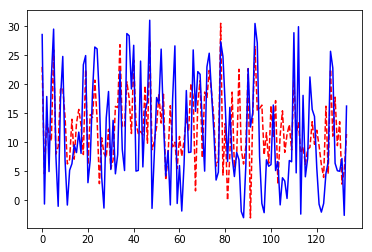

In [26]:
plt.plot(y_hat,'r--',y_test[LABEL].values,'b')